<center><center><img src="https://raw.githubusercontent.com/makaires77/fioce/master/assets/logo_fioce.png" 
style="height:150px" alt="Logo_Unifor"></center></center>

## <center>Explorar dados dos currículos Lattes para<br /> propor modelo de Grafo para análises futuras </center>

    Antonio Marcos Aires Barbosa – Fiocruz Ceará

**Introdução**

A análise de Grafos permite obter insights como produtos de análises em contextos da realidade com base em modelos capazes de lidar dados heterogêneos e relações complexas.


Neste trabalho propomos uma análise dos dados de pesquisa acadêmica tendo como fonte de dados os currículo Lattes de servidores da unidade Fiocruz Ceará.

**Objetivo geral:**

    Explorar dados dos currículos de servidores da Fiocruz Ceará.

**Objetivos Específicos**

    1. Extrair dados dos currículos;
    2. Propor modelo de grafo para análises futuras;

# <b>FASE 0: Preparar e Testar Ambiente</b>

In [1]:
def strfdelta(tdelta, fmt='{H:02}h {M:02}m {S:02}s', inputtype='timedelta'):
    from string import Formatter
    
    """Convert a datetime.timedelta object or a regular number to a custom-formatted string, 
    just like the stftime() method does for datetime.datetime objects.

    The fmt argument allows custom formatting to be specified.  Fields can 
    include seconds, minutes, hours, days, and weeks.  Each field is optional.

    Some examples:
        '{D:02}d {H:02}h {M:02}m {S:02}s' --> '05d 08h 04m 02s' (default)
        '{W}w {D}d {H}:{M:02}:{S:02}'     --> '4w 5d 8:04:02'
        '{D:2}d {H:2}:{M:02}:{S:02}'      --> ' 5d  8:04:02'
        '{H}h {S}s'                       --> '72h 800s'

    The inputtype argument allows tdelta to be a regular number instead of the  
    default, which is a datetime.timedelta object.  Valid inputtype strings: 
        's', 'seconds', 
        'm', 'minutes', 
        'h', 'hours', 
        'd', 'days', 
        'w', 'weeks'
    """

    # Convert tdelta to integer seconds.
    if inputtype == 'timedelta':
        remainder = int(tdelta.total_seconds())
    elif inputtype in ['s', 'seconds']:
        remainder = int(tdelta)
    elif inputtype in ['m', 'minutes']:
        remainder = int(tdelta)*60
    elif inputtype in ['h', 'hours']:
        remainder = int(tdelta)*3600
    elif inputtype in ['d', 'days']:
        remainder = int(tdelta)*86400
    elif inputtype in ['w', 'weeks']:
        remainder = int(tdelta)*604800

    f = Formatter()
    desired_fields = [field_tuple[1] for field_tuple in f.parse(fmt)]
    possible_fields = ('W', 'D', 'H', 'M', 'S')
    constants = {'W': 604800, 'D': 86400, 'H': 3600, 'M': 60, 'S': 1}
    values = {}
    
    for field in possible_fields:
        if field in desired_fields and field in constants:
            values[field], remainder = divmod(remainder, constants[field])
    
    return f.format(fmt, **values)

def tempo(start, end):
    from datetime import timedelta
        
    t=end-start

    tempo = timedelta(
        weeks   = t//(3600*24*7),
        days    = t//(3600*24),
        seconds = t,
        minutes = t//(60),
        hours   = t//(3600),
        microseconds=t//1000000,
        )
    fmt='{H:2}:{M:02}:{S:02}'
    return strfdelta(tempo)

# https://sh-tsang.medium.com/tutorial-cuda-cudnn-anaconda-jupyter-pytorch-installation-in-windows-10-96b2a2f0ac57

In [2]:
def try_amb():
    ## Visualizar versões dos principais componentes
    import os
    import pip
    import sys
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    # !pip3 install shutup
    # import shutup; shutup.please()
    
    pyVer      = sys.version
    pipVer     = pip.__version__
    
    print('\nVERSÕES DAS PRINCIPAIS BIBLIOTECAS INSTALADAS NO ENVIROMENT')
    print('Interpretador em uso:', sys.executable)
    print('    Ambiente ativado:',os.environ['CONDA_DEFAULT_ENV'])
    print('     Python: '+pyVer, '\n        Pip:', pipVer,'\n'
         )

    !nvcc -V

def try_gpu():
    print('\nVERSÕES DO PYTORCH E GPU DISPONÍVEIS')
    try:
        import torch
        print('    PyTorch:',torch.__version__)
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print('Dispositivo:',device)
        print('Disponível :',device,torch.cuda.is_available(),' | Inicializado:',torch.cuda.is_initialized(),'| Capacidade:',torch.cuda.get_device_capability(device=None))
        print('Nome GPU   :',torch.cuda.get_device_name(0),'         | Quantidade:',torch.cuda.device_count(),'\n')
    except Exception as e:
        print('Erro ao configurar a GPU:',e,'\n')

def try_folders(drives,pastas,pastasraiz):
    import os
    for drive in drives:
        for i in pastas:
            for j in pastasraiz:
                try:
                    caminho_testado = drive+i+j
                    if os.path.isfile(caminho_testado+'/chromedriver/chromedriver.exe'):
                        print(f"Listando arqivos em: {caminho_testado}")
                        print(os.listdir(caminho_testado))
                        caminho = caminho_testado+'/'
                except:
                    caminho=''
                    print('Não foi possível encontrar uma pasta de trabalho')
    return caminho

def try_browser(raiz):
    print('\nVERSÕES DO BROWSER E DO CHROMEDRIVER INSTALADAS')
    from selenium import webdriver
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service

    try:
        # Caminho para o seu chromedriver
        driver_path=raiz+'chromedriver/chromedriver.exe'
        print(driver_path)
        service = Service(driver_path)
        driver = webdriver.Chrome(service=service)
        str1 = driver.capabilities['browserVersion']
        str2 = driver.capabilities['chrome']['chromedriverVersion'].split(' ')[0]
        print(f'     Versão do browser: {str1}')
        print(f'Versão do chromedriver: {str2}')
        driver.quit()

        if str1[0:3] != str2[0:3]: 
            print("Versões incompatíveis, atualizar chromedriver!")
            print('  Baixar versão atualizada do Chromedriver em:')
            print('  https://googlechromelabs.github.io/chrome-for-testing/#stable')
            print('     Ex. Versão 116 PARA WINDOWS:')
            print('	    https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/116.0.5845.96/win64/chromedriver-win64.zip')
    except Exception as e:
        print(e)

def try_chromedriver(caminho):
    try:
        import os
        os.listdir(caminho)
    except Exception as e:
        raiz=caminho

    finally:
        print(raiz)
    return raiz

In [3]:
def definir_sistema(pastaraiz):
    import os
    import sys
    sistema_operacional =sys.platform

    try:
        if 'linux' in sistema_operacional:
            print('Sistema operacional Linux')
            try:
                drive   = '/home/'
                usuario = 'mak/'
                os.listdir(drive+usuario)
            except:
                drive   = '/home/'
                usuario = 'marcos/'
        elif 'win32' in sistema_operacional:
            print('Sistema operacional Windows')
            drive   = 'C'
            print(f'Drive em uso {drive.upper()}')
            # drive = 'E'
            # drive = input('Indique qual a letra da unidade onde deseja armazenar os arquivos (Ex.: C, E...)')
            usuario = 'Users/marco/'
            if os.path.isdir(drive+':/'+usuario) is False:
                usuario = 'Users/marcos.aires/'
        else:
            print('SO não reconhecido')

    except Exception as e:
        print('Erro ao preparar as pastas locais!')
        print(e)

    caminho = drive+':/'+usuario+pastaraiz+'/'
    print(f'Pasta armazenagem local {caminho}\n')

    return caminho, drive, usuario

def preparar_pastas(caminho):
    import os

    # caminho, drive, usuario = definir_sistema(pastaraiz)
    # caminho = drive+':/'+usuario+pastaraiz
    # caminho = drive+':/'+pastaraiz
    if os.path.isdir(caminho) is False:
        os.mkdir(caminho)
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os arquivo xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para arquivo xml criada com sucesso!')
        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os arquivo CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para arquivo CSV criada com sucesso!')
        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os arquivo JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')
        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para JSON criada com sucesso!')
    else:
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para xml criada com sucesso!')
        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para CSV criada com sucesso!')
        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')
        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para figuras criada com sucesso!')
        if os.path.isdir(caminho+'/output'):
            print ('Pasta para saídas já existe!')
        else:
            os.mkdir(caminho+'/output')
            print ('Pasta para saídas criada com sucesso!')            

    pathzip  = caminho+'xml_zip/'
    pathcsv  = caminho+'csv/'
    pathjson = caminho+'json/'
    pathfig  = caminho+'fig/'
    pathaux  = caminho
    pathout  = caminho+'output/'

    print('\nCaminho da pasta raiz', pathaux)
    print('Caminho arquivos  XML', pathzip)
    print('Caminho arquivos JSON', pathjson)
    print('Caminho arquivos  CSV', pathcsv)
    print('Caminho para  figuras', pathfig)
    print('Pasta arquivos saídas', pathout)
    
    return pathzip, pathcsv, pathjson, pathfig, pathaux, pathout

In [4]:
pastaraiz = 'fioce'
caminho, drive, usuario = definir_sistema(pastaraiz)
try_amb()
try_gpu()
try_browser(caminho)

Sistema operacional Windows
Drive em uso C
Pasta armazenagem local C:/Users/marco/fioce/


VERSÕES DAS PRINCIPAIS BIBLIOTECAS INSTALADAS NO ENVIROMENT
Interpretador em uso: c:\Users\marco\.conda\envs\beakerx\python.exe
    Ambiente ativado: beakerx
     Python: 3.11.2 | packaged by Anaconda, Inc. | (main, Mar 27 2023, 23:35:04) [MSC v.1916 64 bit (AMD64)] 
        Pip: 23.2.1 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Jul_11_03:10:21_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.2, V12.2.128
Build cuda_12.2.r12.2/compiler.33053471_0

VERSÕES DO PYTORCH E GPU DISPONÍVEIS
    PyTorch: 2.0.1+cu118
Dispositivo: cuda
Disponível : cuda True  | Inicializado: False | Capacidade: (7, 5)
Nome GPU   : NVIDIA GeForce RTX 2060          | Quantidade: 1 


VERSÕES DO BROWSER E DO CHROMEDRIVER INSTALADAS
C:/Users/marco/fioce/chromedriver/chromedriver.exe
     Versão do browser: 117.0.5938.92
Versão do chromedriver: 117.0.5938.88


# <b>FASE 1: Extrair DOM para objeto Soup</b>

## Funções: Importar, conectar e gerar driver

In [5]:
## Ambiente beakerx
# !pip install py2neo
# !pip install py2neo --trusted-host pypi.org --trusted-host files.pythonhosted.org
import json
import logging
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch, sqlite3, asyncio
import os, re, time, traceback, json
import warnings, csv, sys, pip, string

from PIL import Image
from io import BytesIO
from pprint import pprint
from string import Formatter
from datetime import datetime
from datetime import timedelta
from collections import deque
from collections import Counter
from collections import defaultdict
from flask import render_template_string
from neo4j import GraphDatabase
from py2neo import Graph, Node, Relationship
from IPython.display import clear_output, display, HTML

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException

from bs4 import BeautifulSoup, Tag, NavigableString

## Configurar exibição dos dataframes do pandas na tela
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')
pd.set_option('display.max_rows', 600)

delay = 10

In [6]:
def connect_driver(caminho):
    '''
    Função 1: Conecta ao servidor do CNPq para busca de currículo
    '''
    print(f'Conectando com o servidor do CNPq...')
    # print(f'Iniciada extração de {len(lista_nomes)} currículos')
    

    ## https://www.selenium.dev/documentation/pt-br/webdriver/browser_manipulation/
    # options   = Options()
    # options.add_argument("--headless")
    # driver   = webdriver.Chrome(options=options)
    driver_path=caminho+'chromedriver/chromedriver.exe'
    print(driver_path)
    service = Service(driver_path)
    driver = webdriver.Chrome(service=service)    
    url_buscaespecialista = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=true&textoBusca='
    driver.get(url_buscaespecialista) # acessa a url de busca do CNPQ   
    
    driver.set_window_position(-20, -10)
    driver.set_window_size(170, 1896)
    driver.mouse = webdriver.ActionChains(driver)
    # url        = browser.command_executor._url #"http://127.0.0.1:60622/hub"
    # session_id = browser.session_id            #'4e167f26-dc1d-4f51-a207-f761eaf73c31'

    # return browser, url, session_id
    return driver

## Funções: Manipular HTML para chegar ao currículo

In [7]:
def fill_name(driver, delay, NOME):
    '''
    Função 2: passa o nome para campo de busca
    '''
    try:
        nome = lambda: driver.find_element(By.CSS_SELECTOR, ("#textoBusca"))
        nome().send_keys(Keys.CONTROL + "a")
        nome().send_keys(NOME)
        # driver.find_element(By.CSS_SELECTOR, ("#textoBusca")).send_keys(Keys.ENTER)
        seletorcss='div.layout-cell-12:nth-child(8) > div:nth-child(1) > div:nth-child(1) > a:nth-child(1)'
        # seletorcss="#textoBusca"  
        
        time.sleep(0.5)
        WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss))).click()
        seletorcss="#botaoBuscaFiltros"  
        
        WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss)))
        
    except Exception as e:
        traceback_str = ''.join(traceback.format_tb(e.__traceback__))          
        print('Erro ao preencher nome no campo de busca, pausando por 1 segundo')
        print(e,traceback_str)
        # print(e)
        # time.sleep(1.5)

In [8]:
def retry(func,
          expected_ex_type=Exception,
          limit=0,
          wait_ms=100,
          wait_increase_ratio=2,
          logger=None,
          on_exhaust="throw"
          ):
    """
    Retry a function invocation until no exception occurs
    :param func: function to invoke
    :param expected_ex_type: retry only if exception is subclass of this type
    :param limit: maximum number of invocation attempts, 0 for unlimited attempts.
    :param wait_ms: initial wait time after each attempt in milliseconds.
    :param wait_increase_ratio: increase wait period by multiplying this value after each attempt.
    :param logger: if not None, retry attempts will be logged to this logging.logger
    :param on_exhaust: return value when retry attempts exhausted. Default is "throw" which will rethrow the exception
                 of the last attempt.
    :return: result of first successful invocation
    :raises: last invocation exception if attempts exhausted or exception is not an instance of ex_type
    """

    attempt = 1
    while True:
        try:
            return func()
        except Exception as ex:
            if not isinstance(ex, expected_ex_type):
                raise ex

            if logger:
                logger.error("Failed execution attempt #%d", attempt, exc_info=ex)

            # check if attempts exhausted
            if 0 < limit <= attempt:
                if logger:
                    logger.warning("Attempt limit (%d) reached", limit)
                if on_exhaust == "throw":
                    raise ex
                return on_exhaust

            # prepare for next attempt
            attempt += 1
            if logger:
                logger.info("Waiting %d ms before attempt #%d", wait_ms, attempt)
            time.sleep(wait_ms / 1000)
            wait_ms *= wait_increase_ratio

def paginar(browser):
    try:
        css_paginacao="div.paginacao:nth-child(2)"  
        WebDriverWait(browser, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_paginacao)))
        paginacao = browser.find_element(By.CSS_SELECTOR, css_paginacao)
        paginas=paginacao.text.split(' ')
        remover=['','anterior','...']
        numpaginas = [x for x in paginas if x not in remover]
        # print('NumPáginas interno:',numpaginas)
    except Exception as e:
        print('Erro ao utilizar função paginar():', e)
    return numpaginas

In [9]:
def achar_busca(driver, delay):
    '''
    Função 3: clica no botão Buscar Currículo
    '''
    delay=10
    try:
        limite=5
        xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
        retry(WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=20,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        link_nome  = driver.find_element(By.XPATH, xpath_nome)
        # ActionChains(browser).move_to_element(link_nome).perform()
        
        # Avaliar 'Stale file handle'
        if link_nome.text == None:
            xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
            
            print('Sem resposta do servidor, tentando novamente...')
            retry(WebDriverWait(driver, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_nome))),
               #expected_ex_type=ZeroDivisionError, 
               wait_ms=200,
               limit=limite, 
               #logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        return link_nome

    except TimeoutException as t:
        print(f'Erro de conexão durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
        time.sleep(2)

In [10]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

def open_curriculum(driver,elm_vinculo):
    link_nome     = achar_busca(driver, delay)
    window_before = driver.current_window_handle

    limite = 5
    if str(elm_vinculo) == 'nan':
        print('Vínculo não encontrado, passando ao próximo nome...')
        raise Exception
    print('Vínculo encontrado no currículo de nome:',elm_vinculo.text)

    ## Clicar no botão abrir currículo e mudar de aba
    try:
        ## Aguarda, encontra, clica em buscar nome
        link_nome    = achar_busca(driver, delay)
    except Exception as e:
        print('Erro')
        print(e)
        
    if link_nome.text == None:
        xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
        # 'Stale file handle'
        print('Ainda sem resposta do servidor, tentando novamente...')
        retry(WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable((By.XPATH, xpath_nome))),
        #    expected_ex_type=ZeroDivisionError, 
        wait_ms=200,
        limit=limite, 
        #    logger=logger, 
        on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))
    try:
        ActionChains(driver).click(link_nome).perform()
    except:
        print(f'Currículo não encontrado.')

    retry(WebDriverWait(driver, delay).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo"))),
        #    expected_ex_type=ZeroDivisionError, 
        wait_ms=200,
        limit=limite, 
        #    logger=logger, 
        on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

    # Clicar botão para abrir o currículo
    btn_abrir_curriculo = WebDriverWait(driver, delay).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
    time.sleep(0.2)

    ActionChains(driver).click(btn_abrir_curriculo).perform()

    ## Gerenciamento das janelas abertas no browser
    WebDriverWait(driver, delay).until(EC.number_of_windows_to_be(2))
    window_after = driver.window_handles
    new_window   = [x for x in window_after if x != window_before][0]
    driver.switch_to.window(new_window)
    # time.sleep(0.2)

    # Variável para rastrear se já passamos pelos elementos que vêm após o marcador
    passou_artigos_completos = False

    # Aguarde até que o elemento <div id="artigos-completos"> seja encontrado
    artigos_completos_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'artigos-completos'))
    )
    print('Extraindo dados das publicações...')
    passou_artigos_completos = True

    # Encontre todos os elementos sup com a classe ajaxJCR
    sup_tags = driver.find_elements(By.CLASS_NAME, 'ajaxJCR jcrTip')

    for sup_tag in sup_tags:
        try:
            # Verifique se o marcador foi encontrado
            if not passou_artigos_completos:
                # Verifique se o elemento atual contém o texto desejado
                if "Artigos completos publicados em periódicos" in sup_tag.text:
                    passou_artigos_completos = True
                continue  # Continue para o próximo elemento

            # Use o Selenium para ativar o tooltip
            ActionChains(driver).move_to_element(sup_tag).perform()

            # Aguarde até que o tooltip seja exibido (ajuste o tempo limite conforme necessário)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'jcrTip'))
            )

            # Obtenha o elemento do tooltip
            tooltip_element = driver.find_element(By.CLASS_NAME, 'jcrTip')

            # Verifique se o elemento do tooltip é visível
            if tooltip_element.is_displayed():
                # Obtenha o texto do tooltip
                tooltip_text = tooltip_element.text

                # Adicione o texto do tooltip como um atributo personalizado no elemento sup
                driver.execute_script("arguments[0].setAttribute('data-tooltip', arguments[1]);", sup_tag, tooltip_text)

                # Aguarde até que o elemento do tooltip se torne obsoleto (stale)
                WebDriverWait(driver, 10).until(
                    EC.staleness_of(tooltip_element)
                )
        except Exception as e:
            print(f"Erro ao ativar o tooltip: {e}")

    # Após adicionar os dados dos tooltips, obtenha o conteúdo HTML atualizado
    page_source = driver.page_source
    driver.quit()
    
    # Usa BeautifulSoup para analisar
    soup = BeautifulSoup(page_source, 'html.parser') 
    
    return soup

In [11]:
def find_terms(NOME, instituicao, unidade, termo, driver, delay, limite):
    from selenium.common import exceptions
    from pyjarowinkler.distance import get_jaro_distance
    ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)
    
    ## Receber a quantidade de opções ao ler elementos de resultados
    duvidas   = []
    force_break_loop = False
    try:
        css_resultados = ".resultado"
        WebDriverWait(driver, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
        resultados = driver.find_elements(By.CSS_SELECTOR, css_resultados)       
        ## Ler quantidade de resultados apresentados pela busca de nome
        try:
            css_qteresultados = ".tit_form > b:nth-child(1)"
            WebDriverWait(driver, delay).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, css_qteresultados)))                       
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            div_element = soup.find('div', {'class': 'tit_form'})
            match = re.search(r'<b>(\d+)</b>', str(div_element))
            if match:
                qte_resultados = int(match.group(1))
                print(f'{qte_resultados} resultados para {NOME}')
            else:
                raise Exception
        except Exception as e:
            print('Erro ao ler a quantidade de resultados:')
            print(e)
            return np.NaN, NOME, np.NaN, e, driver
        
        ## Escolher função a partir da quantidade de resultados da lista apresentada na busca
        ## Ao achar clica no elemento elm_vinculo com link do nome para abrir o currículo
        numpaginas = paginar(driver)
        if numpaginas == [] and qte_resultados==1:
            # capturar link para o primeiro nome resultado da busca
            ## TO-DO inserir a crítica para o 'Stale file handle'
            try:
                css_linknome = ".resultado > ol:nth-child(1) > li:nth-child(1) > b:nth-child(1) > a:nth-child(1)"
                WebDriverWait(driver, delay).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, css_linknome)))            
                elm_vinculo  = driver.find_element(By.CSS_SELECTOR, css_linknome)
                nome_vinculo = elm_vinculo.text
            except Exception as e:
                print('Erro ao encontrar o primeiro resultado da lista de nomes:',e)
                return np.NaN, NOME, np.NaN, e, driver
            # print('Clicar no nome único:', nome_vinculo)
            try:
                retry(ActionChains(driver).click(elm_vinculo).perform(),
                       wait_ms=20,
                       limit=limite,
                       on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))   
            except Exception as e:
                print('Erro ao clicar no único nome encontrado anteriormente',e)
                return np.NaN, NOME, np.NaN, e, driver
        
        ## Quantidade de resultados até 10 currículos, acessados sem paginação
        else:
            print(f'{qte_resultados} currículos de homônimos em potencial...')
            numpaginas = paginar(driver)
            numpaginas.append('próximo')
            iteracoes=0
            ## iterar em cada página de resultados
            pagin = qte_resultados//10+1
            for i in range(pagin+1):
                # print(i,'/',pagin)
                iteracoes+=1
                try:
                    numpaginas = paginar(driver)
                    print(f'Iteração: {iteracoes}. Páginas sendo lidas: {numpaginas}')
                    css_resultados = ".resultado"
                    WebDriverWait(driver, delay).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
                    resultados = driver.find_elements(By.CSS_SELECTOR, css_resultados)
                except Exception as e:
                    print('Erro ao paginar:',e)
                ## iterar em cada resultado
                for n,i in enumerate(resultados):
                    linhas = i.text.split('\n\n')
                    # print(linhas)
                    if 'Stale file handle' in str(linhas):
                        return np.NaN, NOME, np.NaN, 'Stale file handle', driver
                    for m,linha in enumerate(linhas):
                        # print(f'\nOrdem da linha: {m+1}, de total de linhas {len(linhas)}')
                        # print('Conteúdo da linha:',linha.lower())
                        print(linha)
                        try:
                            if instituicao.lower() in linha.lower() or unidade.lower() in linha.lower() or termo.lower() in linha.lower():
                                # print('Vínculo encontrado!')
                                count=m
                                # print(' NOME:', NOME, type(NOME))
                                # test = linhas[count].split('\n')[0]
                                # print('TESTE:',test, type(test))
                                while get_jaro_distance(linhas[count].split('\n')[0], str(NOME)) < 0.75:
                                    count-=1
                                print('Identificado vínculo com o interesse de análise no resultado:', m+1)
                                nome_vinculo = linhas[count].strip()
                                print(f'    Achado: {nome_vinculo}')
                                try:
                                    css_vinculo = f".resultado > ol:nth-child(1) > li:nth-child({m+1}) > b:nth-child(1) > a:nth-child(1)"
                                    # print('\nCSS_SELECTOR usado:', css_vinculo)
                                    css_alvo = '.resultado > ol:nth-child(1) > li:nth-child(7) > b:nth-child(1) > a:nth-child(1)'
                                    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_vinculo)))            
                                    elm_vinculo  = driver.find_element(By.CSS_SELECTOR, css_vinculo)
                                    nome_vinculo = elm_vinculo.text
                                    # print('Elemento retornado:',nome_vinculo)
                                    retry(ActionChains(driver).click(elm_vinculo).perform(),
                                        wait_ms=100,
                                        limit=limite,
                                        on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))            
                                except Exception as e:
                                    print('Erro ao achar o link do nome com múltiplos resultados')
                                    return np.NaN, NOME, np.NaN, e, driver
                                force_break_loop = True
                                break
                        except Exception as e2:
                            traceback_str = ''.join(traceback.format_tb(e2.__traceback__))
                            print('Erro ao procurar vínculo com currículos achados')    
                            print(e2,traceback_str)
                        ## Caso percorra todos elementos da lista e não encontre vínculo adiciona à dúvidas quanto ao nome
                        if m==(qte_resultados):
                            print(f'Não encontrada nenhuma referência à {instituicao} ou ao {unidade} ou ao termo {termo}')
                            duvidas.append(NOME)
                            # clear_output(wait=True)
                            # driver.quit()
                            continue
                    if force_break_loop:
                        break
                try:
                    prox = driver.find_element(By.PARTIAL_LINK_TEXT, 'próximo')
                    prox.click()
                except:
                    continue
        try:
            elm_vinculo.text
            # print(f'Nomes: {NOME} | {elm_vinculo.text}')
        except:
            return np.NaN, NOME, np.NaN, 'Vínculo não encontrado', driver
    except Exception as err:
        print('Erro ao sair da função procurar_vinculos()')
        print('Conteúdo do erro:',err)
        return np.NaN, NOME, np.NaN, err, driver
    
    return elm_vinculo, np.NaN, np.NaN, np.NaN, driver

In [12]:
def listar_idlattes(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='ID Lattes:']
    return df_idlattes

def listar_artigos(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='Artigos completos publicados em periódicos']
    return df_idlattes

def contar_artigos(df_secoes):
    def count_year_occurrences(content):
        """Count the number of occurrences of four-digit years followed by a period in the given string.""" 
        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        pattern = r'\b\d{4}\.'
        return len(re.findall(pattern, content))

    def extract_citations(content):
        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        citation_pattern = r'Citações:([\d\|]+),'
        all_citations = re.findall(citation_pattern, content)
        total_citations = 0
        for citation_group in all_citations:
            numbers = map(int, citation_group.split('|'))
            total_citations += sum(numbers)
        return len(all_citations), total_citations

    df_secoes_contadas = df_secoes.copy()
    df_secoes_contadas['QTE_ARTIGOS'] = df_secoes['CONTEUDOS'].apply(count_year_occurrences)
    df_secoes_contadas['ARTIGOS_CITADOS'], df_secoes['SOMA_CITACOES'] = zip(*df_secoes['CONTEUDOS'].apply(extract_citations))

    return df_secoes_contadas

def is_abreviation(substring):
    pattern = r'(?: [a-zA-Z]\.)|(?: [a-zA-Z] \.)'
    if re.search(pattern, substring):
        return True
    else:
        return False

def is_surname(substring):
    return not is_abreviation(substring) and substring.endswith(', ')

def compose_full_name(surname, parts, marker):
    full_name = ""
    for part in parts:
        full_name += part + marker
    full_name += ' '+surname
    return full_name.strip()

def split_authors(string, verbose=False):
    authors_names = []
    
    m1a = "; "
    m1b = ", "
    
    if m1a in string and (string.count(m1a) <= string.count(m1b) or m1b not in string):
        marker = m1a
        authors_names = string.split(marker)
        return [x.strip() for x in authors_names]
    else:
        marker = m1b
    
    if verbose:
        print(f'Selected marker: "{marker}"')

    parts_list = string.split(marker)
    name    = ""
    surname = ""
    
    for part in parts_list:
        if is_abreviation(part):
            classification = 'Abrev'
            name += part + marker
        else:
            classification = 'Name'
            if is_surname(part) or surname == "":
                classification = 'SOBRENOME'
                if surname:
                    full_name = compose_full_name(surname.strip(), name.split(marker), ', ')
                    if full_name not in authors_names:
                        authors_names.append(full_name)
                surname = part
                name = part + marker
            else:
                name = part + marker
        if verbose:
            # print(f'Quantidade de m1a: {string.count(m1a)} \nQuantidade de m1b: {string.count(m1b)}')
            print(f'Autor: {part:40} | Forma: {classification}')

        authors_names.append(part.strip(marker).strip())
     
    return [x.strip() for x in authors_names]

In [13]:
# Initialize Logging
logging.basicConfig(level=logging.INFO)

def extrair_indices(layout_celula):
    indice = layout_celula.select_one('div.layout-cell-pad-5.text-align-right')
    valor = layout_celula.select_one('div.layout-cell.layout-cell-9 div.layout-cell-pad-5')
    
    if indice and valor:
        valores_extraidos = valor.text.split('<br class="clear">') if '<br class="clear">' in valor.text else valor.text.split('\n\t\t\n\t')
        return indice.text, valores_extraidos
    return None, None

def extrair_secao(title_wrapper):
    tags_relevantes = ['h1', 'ul', 'b']
    tags_encontradas = []
    for tag in tags_relevantes:
        elemento_encontrado = title_wrapper.select_one(tag)
        if elemento_encontrado:
            tags_encontradas.append((tag, elemento_encontrado))
    tags_ordenadas = sorted(tags_encontradas, key=lambda x: x[1].sourceline if x[1] else float('inf'))
    return tags_ordenadas[0][1] if tags_ordenadas else None

def encontrar_subchave(title_wrapper):
    tags_relevantes  = ['ul', 'a', 'b']
    tags_encontradas = [(tag, title_wrapper.find(tag)) for tag in tags_relevantes]
    tags_ordenadas   = sorted(tags_encontradas, key=lambda x: x[1].sourceline if x[1] else float('inf'))

    return tags_ordenadas[0][1] if tags_ordenadas else None

def extrair_titulo(title_wrapper):
    inst_back_texts = {}
    inst_back_elements = title_wrapper.find_all('div', class_='inst_back')
    for index, inst_back in enumerate(inst_back_elements):
        b_tag = inst_back.find('b')
        if b_tag:
            inst_back_texts[index] = b_tag.text.strip()
    return inst_back_texts if inst_back_texts else None

def extrair_wraper(soup, json_data):
    title_wrappers = soup.select('div.layout-cell-pad-main div.title-wrapper')
    for title_wrapper in title_wrappers:
        section_name = extrair_secao(title_wrapper)
        if section_name:
            section_name = section_name.text.strip()
            
            titles = extrair_titulo(title_wrapper)
            json_data["Properties"][section_name] = {}
            
            if titles:
                for index, title in titles.items():
                    json_data["Properties"][section_name][title] = {}
            
            layout_cells = title_wrapper.select('div.layout-cell.layout-cell-12.data-cell')
            for layout_celula in layout_cells:
                indice, valores_extraidos = extrair_indices(layout_celula)
                if indice and valores_extraidos:
                    if titles and indice in titles.values():
                        if len(titles) > 1:
                            for title in titles.values():
                                if title.strip() in indice:
                                    json_data["Properties"][section_name][title][indice] = valores_extraidos
                        else:
                            title = list(titles.values())[0]
                            json_data["Properties"][section_name][title][indice] = valores_extraidos
                    else:
                        json_data["Properties"][section_name][indice] = valores_extraidos
    return json_data

def imprimir_informacoes(dados_json, nome_no, indent=0):
    indentation = '    ' * indent  # Calculating the current indentation level

    if dados_json and nome_no and dados_json.get(nome_no):
        if indent == 0:  # Logging node-level information only at the root
            logging.info(f"{indentation}Node: {nome_no}")
            logging.info(f"{indentation}Total keys extracted: {len(dados_json[nome_no].keys())}")
        
        for key in dados_json[nome_no].keys():
            logging.info(f"{indentation}{key.strip() if key else ''}")

            if isinstance(dados_json[nome_no][key], dict):  # Check for nested dictionaries
                # Recursive call to handle nested dictionaries
                imprimir_informacoes(dados_json[nome_no], key, indent + 1)
            else:
                logging.info(f"{indentation}    Values: {dados_json[nome_no][key]}")

## Função montar dicionário do DOM

In [14]:
def extrair_normal(soup, verbose=False):
    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')

    info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
    name = info_list[0]

    data_dict = {"labels": "Person","name": name,"InfPes": [], "Resumo": []}
    data_dict['InfPes'] = info_list
    summary_text  = elm_main_cell.find("p", class_="resumo").get_text().strip()
    data_dict['Resumo'].append(summary_text)

    tit1 = ['Identificação','Endereço','Formação acadêmica/titulação','Pós-doutorado','Formação Complementar','Atuação Profissional','Linhas de pesquisa',
            'Projetos de pesquisa','Projetos de extensão','Projetos de desenvolvimento','Revisor de periódico','Revisor de projeto de fomento',
            'Áreas de atuação','Idiomas','Inovação']
    tit2 = ['Produções','Bancas','Orientações']
    # Não extraindo ainda, semelhante ao tit2 mas não há subseções dados direto nas seções "inst_back"
    tit3 = ['Eventos']

    for div_title_wrapper in divs_title_wrapper:
        data_cells_12 = div_title_wrapper.findChildren('div', class_='data-cell')

        # print(len(data_cells_12), 'conteiners de dados')
        titulo = div_title_wrapper.find('h1').text.strip()
        if titulo not in data_dict:
            if titulo == '':
                pass
            else:
                data_dict[titulo] = {}
        if verbose:
            print(f'{titulo}')

        for data_cell in data_cells_12:
            # as divs data_cells_12 englobam div class=infopessoa e várias divs class=title-wrapper

            # Formações e demais seções que não tem subseções
            if titulo in tit1:
                ## Listagem das divisões e subdivisões
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                # print(len(divs_inst_back))
                
                for div_inst_back_cell in divs_inst_back:                                        
                    inst_back = div_inst_back_cell.findChild('b')
                    if inst_back:
                        instback_text = inst_back.get_text().strip()
                        data_dict[titulo][instback_text] = []
                        
                        if verbose:                            
                            print(f'  {instback_text}') # nomes de seção com tipos de produção

                    divs_subsection = div_inst_back_cell.find_next_siblings('div', class_='cita-artigos')
                    for subsection in divs_subsection:
                        subsection_text = subsection.get_text().strip()
                        if subsection_text:
                            data_dict[titulo][instback_text][subsection_text] = []
                            if verbose:
                                print(f'      {subsection_text}')   

                elementos_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
                elementos_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
                keys=[]
                vals=[]
                for i,j in zip(elementos_layout_cell_3, elementos_layout_cell_9):
                    if elementos_layout_cell_3 and elementos_layout_cell_9:
                        key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                        key_text = key.get_text().strip().replace('\n',' ').replace('\t','')
                        keys.append(key_text)
                        val = j.find('div', class_='layout-cell-pad-5')
                        val_text = val.get_text().strip().replace('\n',' ').replace('\t','')
                        vals.append(val_text)
                        if verbose:
                            print(f'      {key_text:>3}: {val_text}') # impressão dos dados chave e valor
                
                agg_dict = {key: val for key, val in zip(keys, vals)}
                if titulo not in data_dict:
                    data_dict[titulo] = {}
                data_dict[titulo].update(agg_dict)                

            # Produções, Orientações e Bancas (que contém subseções)
            elif titulo in tit2:
                ## Listagem das divisões e subdivisões
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                # print(len(divs_inst_back))
                
                for div_inst_back_cell in divs_inst_back:                                        
                    inst_back = div_inst_back_cell.findChild('b')
                    if inst_back:
                        instback_text = inst_back.get_text().strip()
                        if verbose:
                            print(f'  {instback_text}') # nomes de seção com tipos de produção

                        div_citacoes = div_inst_back_cell.find_next_sibling('div', class_='cita-artigos')
                        if div_citacoes:
                            cita_artigos_text = div_citacoes.findChild('b').get_text().strip()
                            # print(f'    {cita_artigos_text}') # nomes de subseção como ocorrências 
                            
                            if cita_artigos_text == 'Citações':
                                ## Extrair dados das citações dos artigos publicados em bases indexadas
                                sub_section_list = []
                                    
                                ## Extrair quantidade de citações e fator H através das divs de subseção que contém a classe lyout-cell-12
                                next_siblings = div_citacoes.find_next_siblings("div", class_="layout-cell-12") #acha os irmãos da Subseção

                                sub_section_list = []  # Inicialize a lista de dicionários fora do loop

                                for i in next_siblings:
                                    citation_counts = i.findChildren("div", class_="web_s")  # Encontra as divs que contém os Valores de Citações
                                    if citation_counts:
                                        for i in citation_counts:
                                            database = i.get_text()
                                            total_trab = i.find_next_sibling("div", class_="trab").get_text().split("Total de trabalhos:")[1]
                                            total_cite = i.find_next_sibling("div", class_="cita").get_text().split("Total de citações:")[1]
                                            fator_h = i.find_next_sibling("div", class_="fator").get_text() if i.find_next_sibling("div", class_="fator") else None
                                            num_fator_h = float(fator_h.replace('Fator H:', '')) if fator_h else None
                                            data_wos = i.find_next_sibling("div", class_="detalhes").get_text().split("Data:")[1].strip()

                                            # Converta os valores para tipos de dados adequados
                                            total_trab = int(total_trab)
                                            total_cite = int(total_cite)

                                            citation_numbers = {
                                                "Database": database,
                                                "Total de trabalhos": total_trab,
                                                "Total de citações": total_cite,
                                                "Índice_H": num_fator_h,
                                                "Data": data_wos
                                            }

                                            sub_section_list.append(citation_numbers)

                                            if verbose:
                                                print(f'        {database:>15}: {total_trab:>3} trabalhos, {total_cite:>3} citações, {fator_h}, {data_wos}')

                        # Extração dos Artigos publicados em periódicos
                        div_artigos = div_inst_back_cell.find_next_siblings('div', id='artigos-completos')
                        for div_artigo in div_artigos:
                            if div_artigo:
                                divs_cita_artigos = div_artigo.find_all('div', class_='cita-artigos')
                                for cita_artigos in divs_cita_artigos:
                                    if cita_artigos:
                                        cita_artigos_text = cita_artigos.findChild('b').get_text().strip()
                                        if verbose:
                                            print(f'    {cita_artigos_text}') # nomes de subseção como ocorrências          
                                        
                                        elementos_layout_cell_1 = div_artigo.find_all('div', class_='layout-cell-1')
                                        elementos_layout_cell_11 = div_artigo.find_all('div', class_='layout-cell-11')
                                    
                                        # extract(instback_text, elementos_layout_cell_1,elementos_layout_cell_11)
                                        vals_jcr=[]
                                        keys=[]
                                        vals=[]
                                        for i,j in zip(elementos_layout_cell_1, elementos_layout_cell_11):
                                            if elementos_layout_cell_1 and elementos_layout_cell_11:
                                                key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                                                key_text = key.get_text().strip().replace('\n',' ').replace('\t','')
                                                val = j.find('div', class_='layout-cell-pad-5')
                                                info_dict = {
                                                    'data-issn': 'NULL',
                                                    'impact-factor': 'NULL',  
                                                    'jcr-year': 'NULL',
                                                    'journal': 'NULL',
                                                    'raw_data': 'NULL',
                                                }
                                                # Remova as tags span da div
                                                for span in val.find_all('span'):
                                                    span.extract()
                                                
                                                val_text = val.get_text(strip=True).strip().replace('\n',' ').replace('\t','')

                                                keys.append(key_text)
                                                vals.append(val_text)
                                                if verbose:
                                                    print(f'      {key_text:>3}: {val_text}')

                                                if cita_artigos_text == 'Artigos completos publicados em periódicos':
                                                    sup_element = j.find('sup')
                                                    raw_jcr_data = sup_element.get_text()
                                                    # print('sup_element:',sup_element)
                                                    img_element = sup_element.find('img')
                                                    # print('img_element:',img_element)

                                                    if sup_element:
                                                        if img_element:
                                                            original_title = img_element.get('original-title')
                                                            raw_jcr_data = img_element.get_text()
                                                            if original_title:
                                                                info_list = original_title.split('<br />') if original_title.split('<br />') else original_title
                                                                
                                                                if info_list != 'NULL':
                                                                    info_dict = {
                                                                        'data-issn': img_element.get('data-issn'),
                                                                        'impact-factor': info_list[1].split(': ')[1],
                                                                        'jcr-year': info_list[1].split(': ')[0].replace('Fator de impacto ',''),
                                                                        'journal': info_list[0],
                                                                        'raw_data': raw_jcr_data,
                                                                    }
                                                            else:
                                                                info_dict = {
                                                                    'data-issn': img_element.get('data-issn'),
                                                                    'impact-factor': 'NULL',
                                                                    'jcr-year': 'NULL',
                                                                    'journal': img_element.get('original-title'),
                                                                    'raw_data': raw_jcr_data,
                                                                }
                                                    else:
                                                        info_dict = {
                                                            'data-issn': 'NULL',
                                                            'original-title': 'NULL',
                                                            'Fator de impacto': 'NULL',
                                                            'ano_apuração': 'NULL',
                                                            'raw_data': raw_jcr_data, 
                                                        }                                                                
                                                        
                                                    vals_jcr.append(info_dict)
                                                    if verbose:
                                                        print(f'         {info_dict}')

                                        agg_dict = {key: val for key, val in zip(keys, vals)}
                                        if titulo not in data_dict:
                                            data_dict[titulo] = {}
                                        data_dict[titulo].update(agg_dict)
                                        
                                        if 'JCR' not in data_dict:
                                            data_dict['JCR'] = []
                                        data_dict['JCR'].extend(vals_jcr)

                    extracted = ['Citações', 'Artigos completos publicados em periódicos']
                    divs = div_inst_back_cell.find_next_siblings('div', class_='cita-artigos')
                    # print('subsections', len(divs))
                    for div_publicacoes in divs:
                        tags_b = div_publicacoes.find('b')
                        if tags_b:
                            current_section = div_publicacoes.find_previous_sibling('div', class_='inst_back')
                            current_section_text = current_section.find('b').get_text()
                            # print(current_section_text)
                            if current_section_text not in data_dict[titulo]:
                                data_dict[titulo][current_section_text] = {}  # Inicializa dicionário vazio se não existir para seções
                            current_subection_text = tags_b.get_text().strip() if tags_b.get_text().strip() else None
                            if current_subection_text not in data_dict[titulo][current_section_text]:
                                data_dict[titulo][current_section_text][current_subection_text] = {}  # Inicializa dicionário vazio se não existir para subseções
                            
                            if current_subection_text not in extracted:
                                if verbose:
                                    print(f'    {current_subection_text}')
                                elementos_layout_cell_1 = div_publicacoes.find_next_siblings('div', class_='layout-cell-1')
                                elementos_layout_cell_11 = div_publicacoes.find_next_siblings('div', class_='layout-cell-11')
                                
                                keys=[]
                                vals=[]
                                for i, j in zip(elementos_layout_cell_1, elementos_layout_cell_11):                                            
                                    key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                                    key_text = key.get_text().strip() if key else ""
                                    val = j.find('div', class_='layout-cell-pad-5')
                                    val_text = val.get_text().strip().replace('\n',' ').replace('\t','') if val else ""
                                    keys.append(key_text)
                                    vals.append(val_text) 
                                    if verbose:
                                        print(f'      {key_text:>3}: {val_text}')  # dados chave e valor  

                                    #condição de parada
                                    try:
                                        # next_class = j.find_next_sibling().get('class', [])[0]
                                        # print(f'      {next_class}')
                                        next_next_class = j.find_next_sibling().find_next_sibling().get('class', [])[0]
                                        # print(f'      {next_next_class}')
                                        if next_next_class:
                                            if next_next_class == 'cita-artigos' or next_next_class == 'clear':                                                
                                                extracted.append(current_subection_text)
                                                break
                                    except:
                                        break
                        
                                    agg_dict = {key: val for key, val in zip(keys, vals)}
                                    data_dict[titulo][current_section_text][current_subection_text] = agg_dict
                                    data_dict['Produções']['Produção bibliográfica']['Citações'] = sub_section_list

            # Eventos (não contém subseções)
            elif titulo in tit3:
                secoes = ['Participação em eventos, congressos, exposições e feiras','Organização de eventos, congressos, exposições e feiras']
                ## Listagem das divisões e subdivisões
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                # print(len(divs_inst_back))
                          
    return data_dict

In [15]:
def extrair_normal(soup, verbose=False):
    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')

    info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
    name = info_list[0]

    data_dict = {"labels": "Person","name": name,"InfPes": [], "Resumo": []}
    data_dict['InfPes'] = info_list
    summary_text  = elm_main_cell.find("p", class_="resumo").get_text().strip()
    data_dict['Resumo'].append(summary_text)

    tit1 = ['Identificação','Endereço','Formação acadêmica/titulação','Pós-doutorado','Formação Complementar','Atuação Profissional','Linhas de pesquisa',
            'Projetos de pesquisa','Projetos de extensão','Projetos de desenvolvimento','Revisor de periódico','Revisor de projeto de fomento',
            'Áreas de atuação','Idiomas','Inovação']
    tit2 = ['Produções','Bancas','Orientações']
    tit3 = ['Eventos']

    for div_title_wrapper in divs_title_wrapper:
        data_cells_12 = div_title_wrapper.findChildren('div', class_='data-cell')

        titulo = div_title_wrapper.find('h1').text.strip()
        if titulo not in data_dict:
            if titulo == '':
                pass
            else:
                data_dict[titulo] = {}
        if verbose:
            print(f'{titulo}')

        for data_cell in data_cells_12:

            # Formações e demais seções que não têm subseções
            if titulo in tit1:
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                
                for div_inst_back_cell in divs_inst_back:                                        
                    inst_back = div_inst_back_cell.findChild('b')
                    if inst_back:
                        instback_text = inst_back.get_text().strip()
                        data_dict[titulo][instback_text] = []
                        
                        if verbose:                            
                            print(f'  {instback_text}')

                    divs_subsection = div_inst_back_cell.find_next_siblings('div', class_='cita-artigos')
                    for subsection in divs_subsection:
                        subsection_text = subsection.get_text().strip()
                        if subsection_text:
                            data_dict[titulo][instback_text].append(subsection_text)
                            if verbose:
                                print(f'      {subsection_text}')

                elementos_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
                elementos_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
                keys=[]
                vals=[]
                for i,j in zip(elementos_layout_cell_3, elementos_layout_cell_9):
                    if elementos_layout_cell_3 and elementos_layout_cell_9:
                        key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                        key_text = key.get_text().strip().replace('\n',' ').replace('\t','')
                        keys.append(key_text)
                        val = j.find('div', class_='layout-cell-pad-5')
                        val_text = val.get_text().strip().replace('\n',' ').replace('\t','')
                        vals.append(val_text)
                        if verbose:
                            print(f'      {key_text:>3}: {val_text}')
                
                agg_dict = {key: val for key, val in zip(keys, vals)}
                if titulo not in data_dict:
                    data_dict[titulo] = {}
                data_dict[titulo].update(agg_dict)                

            # Produções, Orientações e Bancas (que contém subseções)
            elif titulo in tit2:
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                for div_inst_back_cell in divs_inst_back:
                    inst_back = div_inst_back_cell.findChild('b')
                    if inst_back:
                        instback_text = inst_back.get_text().strip()
                        if instback_text not in data_dict[titulo]:
                            data_dict[titulo][instback_text] = {}
                        if verbose:
                            print(f'  {instback_text}')

                    divs_cita_artigos = div_inst_back_cell.find_next_siblings('div', class_='cita-artigos')
                    for div_cita in divs_cita_artigos:
                        cita_artigos_text = div_cita.findChild('b').get_text().strip() if div_cita.findChild('b') else None
                        if cita_artigos_text:
                            data_dict[titulo][instback_text][cita_artigos_text] = []
                            if verbose:
                                print(f'      {cita_artigos_text}')
                            
                            # Aqui você pode adicionar a extração de informações específicas para cada subseção.

                    elementos_layout_cell_1 = div_inst_back_cell.find_all('div', class_='layout-cell-1')
                    elementos_layout_cell_11 = div_inst_back_cell.find_all('div', class_='layout-cell-11')
                    keys = []
                    vals = []
                    for i, j in zip(elementos_layout_cell_1, elementos_layout_cell_11):
                        key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                        key_text = key.get_text().strip().replace('\n', ' ').replace('\t', '') if key else None
                        val = j.find('div', class_='layout-cell-pad-5')
                        val_text = val.get_text().strip().replace('\n', ' ').replace('\t', '') if val else None
                        if key_text and val_text:
                            keys.append(key_text)
                            vals.append(val_text)
                            if verbose:
                                print(f'      {key_text:>3}: {val_text}')

                    agg_dict = {key: val for key, val in zip(keys, vals)}
                    if instback_text and agg_dict:
                        data_dict[titulo][instback_text].update(agg_dict)

            # Seção "Eventos"
            elif titulo in tit3:
                # Coleta de dados para a seção "Eventos" conforme a lógica original
                divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')
                for div_inst_back_cell in divs_inst_back:                                        
                    inst_back = div_inst_back_cell.findChild('b')
                    if inst_back:
                        instback_text = inst_back.get_text().strip()
                        if verbose:
                            print(f'  {instback_text}')

    return data_dict

# <b>FASE 2: Exportar DOM para Dicionários</b>

## Formalization of the DOM extraction from HTML

The digital representation of the HTML DOM (Document Object Model) in question follow a consistent class-based structure, where the division of information into various classes within 'div' elements serves as an important taxonomy for organizing and categorizing the information.

The nested structure predominantly consists of HTML div elements differentiated by their CSS classes. The div elements appear in a tree-like organization, hierarchically grouped under recursive presence of the div elements within the class 'title-wrapper', followed by the div elements marked with 'layout-cell' and hierarquically organized until reaching the more detailed levels where the data of interest is, contained in the classes such 'data-cell', 'text-align-right' or 'layout-cell-pad-5' and tags like 'a', 'b'.

The extraction of data from this intricate nested architecture necessitates a recursive methodology that maintains the hierarchical fidelity of the original data. Thus, one approach to transforming this data into a structured JSON object would be to employ depth-first search (DFS) algorithms to traverse through each node in this tree-like structure. Each traversal would examine the class attributes and potentially the text content within each div. 

**Formalization:**

In the formal language of computational theory, let \( T \) be the DOM tree with each node \( n \) containing a list of attributes \( A(n) \) and a text content \( C(n) \). Let \( JSON(n) \) be the JSON representation of the node \( n \). The recursive function to extract data can be described as:


JSON(n) = 
\begin{cases} 
\{ "type": A(n), "content": C(n), "children": \{ JSON(c) \,|\, c \in \text{children of } n \} \} & \text{if } n \text{ has children} \\
\{ "type": A(n), "content": C(n) \} & \text{otherwise}
\end{cases}


**Python implementation:**
 
In terms of practical implementation, Python's Beautiful Soup library can be particularly effective for this task, allowing for a relatively straightforward traversal of each div element to construct the JSON object.

The end result would be a JSON object where each entry corresponds to a 'div' element in the original HTML structure, represented by a dictionary containing the attributes and content of the div, and potentially another dictionary (or list of dictionaries) representing any nested child div elements. This would effectively capture the data within each div while maintaining the hierarchical structure of the original HTML document.

In [16]:
drives=['C:/Users/','E:/','./home/']
pastas=['marcos.aires/', 'marco/']
pastasraiz=['kgfioce','fioce']
caminho=try_folders(drives,pastas,pastasraiz)

preparar_pastas(caminho)

Listando arqivos em: C:/Users/marco/fioce
['.git', '.gitignore', 'assets', 'chromedriver', 'csv', 'doc', 'fig', 'json', 'output', 'scripts', 'source', 'utils', 'xml_zip']
Pasta para os xml já existe!
Pasta para os CSV já existe!
Pasta para os JSON já existe!
Pasta para figuras já existe!
Pasta para saídas já existe!

Caminho da pasta raiz C:/Users/marco/fioce/
Caminho arquivos  XML C:/Users/marco/fioce/xml_zip/
Caminho arquivos JSON C:/Users/marco/fioce/json/
Caminho arquivos  CSV C:/Users/marco/fioce/csv/
Caminho para  figuras C:/Users/marco/fioce/fig/
Pasta arquivos saídas C:/Users/marco/fioce/output/


('C:/Users/marco/fioce/xml_zip/',
 'C:/Users/marco/fioce/csv/',
 'C:/Users/marco/fioce/json/',
 'C:/Users/marco/fioce/fig/',
 'C:/Users/marco/fioce/',
 'C:/Users/marco/fioce/output/')

In [17]:
# Hierarqia básica das classes nas divs recorrentes para dados básicos e Publicação de Artigos é:
# N00> elem_principal "layout-cell-pad-main" | "p" (v: resumo)                          [elm_main_cell = soup.find("div", class_="layout-cell-pad-main")]
#   N01> "infpessoa"                                                                    [dict_infopessoa = elm_main_cell.find("div", class_="infpessoa")]
#   N01> "title-wrapper" | "h1" (k: Títulos)                                            [for t in elm_main_cell.fid_all("div", class_="title-wrapper")]
#       N02> "layout-cell-12 data-cell"                                                 [for title in titles: t.find("h1") e i.get_text() para pegar nome de cada Título ] 
#           N03> "int_back" | "b" (k: Seções)                                           [USAR FIND_ALL PARA CAPTAR TODAS ENTRADAS RECORRENTES e b.get_text() para pegar Nome de Seção]
#               N04> "layout-cell-12" >>> "web_s" (v: ValoresCitações)  
#           N03> "artigos-completos"                                                    [i.find("div", class_="artigos-completos")]
#               N04> "cita-artigos" | "b" (k: Subseção)                                 [USAR FIND_ALL PARA CAPTAR TODAS ENTRADAS RECORRENTES e b.get_text() para pegar Nome de Subseção]
#               N04> "artigo-completo"                                                  [34 Artigos USAR FIND_ALL PARA CAPTAR TODAS ENTRADAS RECORRENTES DE DICIONÁRIO CONFORME ABAIXO]
##                   N05> "layout-cell layout-cell-1 text-align-right" 
##                       N06> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do artigo]
##                   N05> "layout-cell layout-cell-11" 
#                       N06> "layout-cell-pad-5" | "span" "informacao-artigo" ({k:JCR v:ValoresJCR}, {k:autor v:NomeAutor}, {k:ano v:AnoPub}, {k:doi v:LinkDOI})
#                                                | .get_text() 
#                                                | <sup><... data-issn="18685137" original-title="Journal of Ambient Intelligence and Humanized Computing (1868-5137)<br />Fator de impacto (JCR 2021): 3.662"></sup>
#                                                | <div class="citado" cvuri="/buscatextual/servletcitacoes?doi=10.1007/s12652-023-04555-3&amp;issn=18685137&amp;volume=&amp;issue=&amp;paginaInicial=1&amp;titulo=Hybrid model for early identification post-Covid-19 sequelae&amp;sequencial=1&amp;nomePeriodico=Journal of Ambient Intelligence and Humanized Computing" tooltip="Citações a partir de 1996"></div>
#
# CONTEÚDO PARA EXTRAÇÃO ITERATIVA E RECORRENTE COM FUNÇÃO: extract_pairs()
#           N03> "cita-artigos" | "b" (k: Subseção)                              [02 Livros publicados/organizados ou edições]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosLivro)           [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
#           N03> "cita-artigos" | "b" (k: Subseção)                              [24 Capítulos de Livros]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosCapítulo)        [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
#           N03> "cita-artigos" | "b" (k: Subseção)                              [74 Trabalhos completos publicados em anais de congressos]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosCapítulo)        [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
##           N03> <br class="clear">
#         Bancas
#          Participação em bancas de trabalhos de conclusão  
#           N03> "cita-artigos" | "b" (k: Subseção)                              [22 Mestrado]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosCapítulo)        [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
#           N03> "cita-artigos" | "b" (k: Subseção)                              [1 Teses de doutorado]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosCapítulo)        [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
#           N03> "cita-artigos" | "b" (k: Subseção)                              [17 Trabalhos de conclusão de curso de graduação]
##           N03> "layout-cell layout-cell-1 text-align-right"
##               N04> "layout-cell-pad-5 text-align-right" | "b" (k: N.Ordem)    [b.get_text() para pegar Número de ordem do Livro]
##           N03> "layout-cell layout-cell-11"
##               N04> "layout-cell-pad-5" | "b" (k:Autor)                        [b.get_text() para pegar Autor do Livro]
##                                        | .get_text() (v:DadosCapítulo)        [.get_text() para pegar Dados do Livro]
##           N03> <br class="clear">
#          Participação em bancas de comissões julgadoras
# EVENTOS 
#  (33 Participação em eventos, congressos, exposições e feiras)
#  (03 Organização de eventos, congressos, exposições e feiras)
# ORIENTAÇÕES (22 Dissertações, 05 Teses, 09 TCC)
#  Orientações e supervisões em andamento
#    (01 Dissertação de Mestrado, 05 Tese de doutorado)
# INOVAÇÃO (02 Projetos de Pesquisa)

## Extrair DOM para Dicionários

In [18]:
driver = connect_driver(caminho)
NOME = ['Raimir Holanda Filho']
fill_name(driver, delay, NOME)

limite=3
instituicao = 'Fundação Oswaldo Cruz'
unidade     = 'Fiocruz Ceará'
termo       = 'Ministerio da Saude'

elm_vinculo, np.NaN, np.NaN, np.NaN, driver = find_terms(NOME, instituicao, unidade, termo, driver, delay, limite)
soup = open_curriculum(driver,elm_vinculo)

caracteres = len(soup.text)
linhas = len(soup.text.split('\n'))
print(f'Total de caracteres extraídos: {caracteres:6d}')
print(f'Quantidade extraída de linhas: {linhas:6d}')

Conectando com o servidor do CNPq...
C:/Users/marco/fioce/chromedriver/chromedriver.exe
1 resultados para ['Raimir Holanda Filho']
Vínculo encontrado no currículo de nome: Raimir Holanda Filho
Extraindo dados das publicações...
Total de caracteres extraídos:  91502
Quantidade extraída de linhas:   3610


In [19]:
# def extract_tit1_soup(soup, verbose=False):
#     data_dict = {}

#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
#     # Títulos contendo subseções
#     tit1 = ['Identificação', 'Endereço', 'Formação acadêmica/titulação', 'Pós-doutorado', 'Formação Complementar',
#             'Linhas de pesquisa', 'Projetos de pesquisa', 'Projetos de extensão',
#             'Projetos de desenvolvimento', 'Revisor de periódico', 'Revisor de projeto de fomento', 'Áreas de atuação',
#             'Idiomas', 'Inovação']

#     tit2 = ['Atuação Profissional'] # dados com subseções
#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         titulo = div_title_wrapper.find('h1').text.strip()
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
#         # Verifique se o título está na lista 'tit1'
#         if titulo in tit1:
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             if verbose:
#                 print(titulo)
            
#             for data_cell in data_cells:
#                 divs_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
#                 divs_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
#                 keys = []
#                 vals = []

#                 for i, j in zip(divs_layout_cell_3, divs_layout_cell_9):
#                     if divs_layout_cell_3 and divs_layout_cell_9:
#                         key = i.find('div', class_='layout-cell-pad-5 text-align-right')
#                         key_text = key.get_text().strip().replace('\n', ' ').replace('\t', '')
#                         keys.append(key_text)
#                         val = j.find('div', class_='layout-cell-pad-5')
#                         val_text = val.get_text().strip().replace('\n', ' ').replace('\t', '')
#                         vals.append(val_text)
#                         if verbose:
#                             print(f'      {key_text:>3}: {val_text}')

#                 agg_dict = {key: val for key, val in zip(keys, vals)}
#                 data_dict[titulo] = agg_dict
        
#         if titulo in tit2:
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             if verbose:
#                 print(titulo)
            
#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")               
#                 if verbose:
#                     print(len(sections), 'seções')

#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = []
#                     if verbose:
#                         print(section_name)

#                     sibling = section.find_next_sibling()
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     while sibling:
#                         classes = sibling.get('class', [])

#                         if 'layout-cell-3' in classes:  # Data key
#                             key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                             sibling = sibling.find_next_sibling()

#                             if sibling and 'layout-cell-9' in sibling.get('class', []):  # Check if value is present
#                                 val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                 current_data[key] = val
#                                 if verbose:
#                                     print(len(current_data.values()), key, val)

#                         elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
#                             next_sibling = sibling.find_next_sibling()
#                             if next_sibling and 'clear' in next_sibling.get('class', []):
#                                 sibling = None
#                             else:
#                                 if current_data:
#                                     data_dict[titulo][section_name] = current_data  # Armazenamos os dados em uma lista

#                         if sibling:
#                             sibling = sibling.find_next_sibling()
#     return data_dict


# def extract_tit2_soup(soup, verbose=False):
#     data_dict = {}
                
#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')    
    
#     tit2 = ['Produções', 'Bancas', 'Orientações']

#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         titulo = div_title_wrapper.find('h1').text.strip()
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
#         # Verifique se o título está na lista 'tit2'
#         if titulo in tit2:
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             if verbose:
#                 print(titulo)

#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")
#                 if verbose:
#                     print(len(sections), 'seções')

#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = {}

#                     sibling = section.find_next_sibling()
#                     current_subsection = None
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     div_citacoes = section.find_next_sibling('div', class_='cita-artigos')
#                     if verbose:
#                         print(len(div_citacoes), 'próxima cita-artigos')
#                     if div_citacoes:
#                         cita_artigos_text = div_citacoes.findChild('b').get_text().strip()
#                         if verbose:
#                             print(f'    {cita_artigos_text}') # nomes de subseção como ocorrências 
                        
#                         if cita_artigos_text == 'Citações':
#                             current_subsection = cita_artigos_text
#                             data_dict[titulo][section_name]['Citações'] = {}
#                             ## Extrair dados das citações dos artigos publicados em bases indexadas
#                             sub_section_list = []
                                
#                             ## Extrair quantidade de citações e fator H das divs de subseção com classe lyout-cell-12
#                             next_siblings = div_citacoes.find_next_siblings("div", class_="layout-cell-12") #acha os irmãos da Subseção

#                             for i in next_siblings:
#                                 citation_counts = i.findChildren("div", class_="web_s")  # Encontra as divs que contém os Valores de Citações
#                                 if citation_counts:
#                                     for i in citation_counts:
#                                         database = i.get_text()
#                                         total_trab = i.find_next_sibling("div", class_="trab").get_text().split("Total de trabalhos:")[1]
#                                         total_cite = i.find_next_sibling("div", class_="cita").get_text().split("Total de citações:")[1]
#                                         fator_h = i.find_next_sibling("div", class_="fator").get_text() if i.find_next_sibling("div", class_="fator") else None
#                                         num_fator_h = float(fator_h.replace('Fator H:', '')) if fator_h else None
#                                         data_wos = i.find_next_sibling("div", class_="detalhes").get_text().split("Data:")[1].strip()

#                                         # Converta os valores para tipos de dados adequados
#                                         total_trab = int(total_trab)
#                                         total_cite = int(total_cite)

#                                         citation_numbers = {
#                                             "Database": database,
#                                             "Total de trabalhos": total_trab,
#                                             "Total de citações": total_cite,
#                                             "Índice_H": num_fator_h,
#                                             "Data": data_wos
#                                         }

#                                         # Verifique se a subseção atual já existe no dicionário
#                                         if 'Citações' not in data_dict[titulo][section_name]:
#                                             data_dict[titulo][section_name]['Citações'] = {}  # Inicialize como uma lista vazia

#                                         data_dict[titulo][section_name]['Citações'] = citation_numbers

#                                         if verbose:
#                                             print(f'        {database:>15}: {total_trab:>3} trabalhos, {total_cite:>3} citações, {fator_h}, {data_wos}')
#                         else:
#                             while sibling:
#                                 classes = sibling.get('class', [])

#                                 if 'cita-artigos' in classes:  # Subsection start
#                                     subsection_name = sibling.find('b').get_text().strip()
#                                     current_subsection = subsection_name
#                                     data_dict[titulo][section_name][current_subsection] = {}
#                                     current_data = {}  # Inicializamos o dicionário de dados da subseção atual

#                                 elif 'layout-cell-1' in classes:  # Data key
#                                     key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                                     sibling = sibling.find_next_sibling()

#                                     if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
#                                         val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                         current_data[key] = val

#                                 elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Subsection or section end
#                                     next_sibling = sibling.find_next_sibling()
#                                     if next_sibling and 'clear' in next_sibling.get('class', []):
#                                         sibling = None
#                                     else:
#                                         if current_subsection:
#                                             data_dict[titulo][section_name][current_subsection] = current_data  # Armazenamos os dados da subseção atual

#                                 if sibling:
#                                     sibling = sibling.find_next_sibling()

#     return data_dict


# def extract_tit3_soup(soup, verbose=False):
#     data_dict = {}

#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
#     # Títulos da seção 'Eventos'
#     tit3 = ['Eventos']

#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         titulo = div_title_wrapper.find('h1').text.strip()
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
#         # Verifique se o título está na lista 'tit3'
#         if titulo in tit3:
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             if verbose:
#                 print(titulo)
            
#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")
#                 if verbose:
#                     print(len(sections), 'seções')

#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = []
#                     if verbose:
#                         print(section_name)

#                     sibling = section.find_next_sibling()
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     while sibling:
#                         classes = sibling.get('class', [])

#                         if 'layout-cell-1' in classes:  # Data key
#                             key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                             sibling = sibling.find_next_sibling()

#                             if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
#                                 val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                 current_data[key] = val
#                                 if verbose:
#                                     print(len(current_data.values()), key, val)

#                         elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
#                             next_sibling = sibling.find_next_sibling()
#                             if next_sibling and 'clear' in next_sibling.get('class', []):
#                                 sibling = None
#                             else:
#                                 if current_data:
#                                     data_dict[titulo][section_name] = current_data  # Armazenamos os dados em uma lista

#                         if sibling:
#                             sibling = sibling.find_next_sibling()

#     return data_dict

In [20]:
import json
import urllib.parse
from neo4j import GraphDatabase

class Neo4jPersister:
    def __init__(self, uri, username, password):
        self._driver = GraphDatabase.driver(uri, auth=(username, password))

    def close(self):
        self._driver.close()

    @staticmethod
    def convert_to_primitives(input_data):
        if input_data is None:
            return None
        
        if isinstance(input_data, dict):
            for key, value in input_data.items():
                if isinstance(value, dict):  # Se um valor ainda é um dicionário, converte em string JSON
                    input_data[key] = json.dumps(Neo4jPersister.convert_to_primitives(value), ensure_ascii=False)
                else:
                    input_data[key] = Neo4jPersister.convert_to_primitives(value)
            return input_data
        
        elif isinstance(input_data, list):
            return [Neo4jPersister.convert_to_primitives(item) for item in input_data]
        
        elif isinstance(input_data, str):
            if 'http://' in input_data or 'https://' in input_data:
                parts = input_data.split(" ")
                new_parts = [urllib.parse.quote(part) if part.startswith(('http://', 'https://')) else part for part in parts]
                return " ".join(new_parts)
            return input_data
        
        elif isinstance(input_data, (int, float, bool)):
            return input_data
        
        else:
            return str(input_data)



    @staticmethod
    def debug_and_convert(input_data):
        try:
            return Neo4jPersister.convert_to_primitives(input_data)
        except:
            print("Conversion failed for:", input_data)
            raise

    def persist_data(self, data_dict, label):
        data_dict_primitives = self.convert_to_primitives(data_dict)
        with self._driver.session() as session:
            query = f"CREATE (node:{label}) SET node = $props"
            session.run(query, props=data_dict_primitives)

    def update_data(self, node_id, data_dict):
        data_dict_primitives = self.convert_to_primitives(data_dict)
        with self._driver.session() as session:
            query = f"MATCH (node) WHERE id(node) = {node_id} SET node += $props"
            session.run(query, props=data_dict_primitives)

In [21]:
def extract_tit1_soup(soup, data_dict=None, verbose=False):
    if data_dict is None:
        data_dict = {}

    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
    # Títulos contendo subseções
    tit1 = ['Identificação', 'Endereço', 'Formação acadêmica/titulação', 'Pós-doutorado', 'Formação Complementar',
            'Linhas de pesquisa', 'Projetos de pesquisa', 'Projetos de extensão',
            'Projetos de desenvolvimento', 'Revisor de periódico', 'Revisor de projeto de fomento', 'Áreas de atuação',
            'Idiomas', 'Inovação']

    tit2 = ['Atuação Profissional'] # dados com subseções
    for div_title_wrapper in divs_title_wrapper:
        # Encontre o título do bloco
        titulo = div_title_wrapper.find('h1').text.strip()
        data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
        # Verifique se o título está na lista 'tit1'
        if titulo in tit1:
            if verbose:
                print(titulo)
            
            data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
            for data_cell in data_cells:
                divs_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
                divs_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
                keys = []
                vals = []

                for i, j in zip(divs_layout_cell_3, divs_layout_cell_9):
                    if divs_layout_cell_3 and divs_layout_cell_9:
                        key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                        key_text = key.get_text().strip().replace('\n', ' ').replace('\t', '')
                        keys.append(key_text)
                        val = j.find('div', class_='layout-cell-pad-5')
                        val_text = val.get_text().strip().replace('\n', ' ').replace('\t', '')
                        vals.append(val_text)
                        if verbose:
                            print(f'      {key_text:>3}: {val_text}')

                agg_dict = {key: val for key, val in zip(keys, vals)}
                data_dict[titulo] = Neo4jPersister.convert_to_primitives(agg_dict)

        
        if titulo in tit2:
            if verbose:
                print(titulo)
            
            data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
            for data_cell in data_cells:
                sections = data_cell.find_all("div", class_="inst_back")               
                if verbose:
                    print(len(sections), 'seções')

                for section in sections:
                    section_name = section.find('b').get_text().strip()
                    data_dict[titulo][section_name] = []
                    if verbose:
                        print(section_name)

                    sibling = section.find_next_sibling()
                    current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

                    while sibling:
                        classes = sibling.get('class', [])

                        if 'layout-cell-3' in classes:  # Data key
                            key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                            sibling = sibling.find_next_sibling()

                            if sibling and 'layout-cell-9' in sibling.get('class', []):  # Check if value is present
                                val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                current_data[key] = val
                                if verbose:
                                    print(len(current_data.values()), key, val)

                        elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                            next_sibling = sibling.find_next_sibling()
                            if next_sibling and 'clear' in next_sibling.get('class', []):
                                sibling = None
                            else:
                                if current_data:
                                    data_dict[titulo][section_name].append(current_data)  # Armazenamos os dados em uma lista

                        if sibling:
                            sibling = sibling.find_next_sibling()
    return data_dict


def extract_tit2_soup(soup, data_dict=None, verbose=False):
    if data_dict is None:
        data_dict = {}

    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')    
    
    tit2 = ['Produções', 'Bancas', 'Orientações']

    for div_title_wrapper in divs_title_wrapper:
        # Encontre o título do bloco
        titulo = div_title_wrapper.find('h1').text.strip()
        data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
        # Verifique se o título está na lista 'tit2'
        if titulo in tit2:
            if verbose:
                print(f'Título: {titulo}')

            data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'

            for data_cell in data_cells:
                sections = data_cell.find_all("div", class_="inst_back")
                if verbose:
                    print(len(sections), 'seções')
                for section in sections:
                    section_name = section.find('b').get_text().strip()
                    data_dict[titulo][section_name] = {}
                    if verbose:
                        print(f'Seção: {section_name}')

                    sibling = section.find_next_sibling()
                    current_subsection = None
                    current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

                    if section_name == 'Produção bibliográfica':
                        subsections = section.find_next_siblings('div', class_='cita-artigos')
                        if verbose:
                            print(len(subsections), 'subseções')                       
                        for subsection in subsections:                            
                            if subsection:
                                subsection_name = subsection.find('b').get_text().strip()
                                if verbose:
                                    print(f'    Subseção: {subsection_name}') # nomes de subseção como ocorrências 
                                    print(f'    {len(subsection)} divs na subseção {subsection_name}')                                
                                if subsection_name == 'Citações':
                                    current_subsection = subsection_name
                                    data_dict[titulo][section_name]['Citações'] = {}
                                    sub_section_list = []
                                        
                                    ## Extrair quantidade de citações e fator H das divs de subseção com classe lyout-cell-12
                                    next_siblings = subsection.find_next_siblings("div", class_="layout-cell-12") #acha os irmãos da Subseção

                                    for sibling in next_siblings:
                                        citation_counts = sibling.findChildren("div", class_="web_s")  # Encontra as divs que contém os Valores de Citações
                                        if citation_counts:
                                            for i in citation_counts:
                                                database = i.get_text()
                                                total_trab = i.find_next_sibling("div", class_="trab").get_text().split("Total de trabalhos:")[1]
                                                total_cite = i.find_next_sibling("div", class_="cita").get_text().split("Total de citações:")[1]
                                                fator_h = i.find_next_sibling("div", class_="fator").get_text() if i.find_next_sibling("div", class_="fator") else None
                                                num_fator_h = float(fator_h.replace('Fator H:', '')) if fator_h else None
                                                data_wos = i.find_next_sibling("div", class_="detalhes").get_text().split("Data:")[1].strip()

                                                # Converta os valores para tipos de dados adequados
                                                total_trab = int(total_trab)
                                                total_cite = int(total_cite)

                                                citation_numbers = {
                                                    "Database": database,
                                                    "Total de trabalhos": total_trab,
                                                    "Total de citações": total_cite,
                                                    "Índice_H": num_fator_h,
                                                    "Data": data_wos
                                                }

                                                # Verifique se a subseção atual já existe no dicionário
                                                if 'Citações' not in data_dict[titulo][section_name]:
                                                    data_dict[titulo][section_name]['Citações'] = {}  # Inicialize como uma lista vazia

                                                data_dict[titulo][section_name]['Citações'] = citation_numbers

                                                if verbose:
                                                    print(f'        {database:>15}: {total_trab:>3} trabalhos, {total_cite:>3} citações, {fator_h}, {data_wos}')
                            
                        ## Encontrar a div irmã de div subseção com classe layout-cell-12 com artigos
                        vals_jcr = []
                        div_artigo_geral = data_cell.findChild("div", id="artigos-completos")
                        if verbose:
                            print(f'Encontrada {len(div_artigo_geral)} div geral de artigos')  
                        divs_artigos = div_artigo_geral.find_all('div', class_='artigo-completo')
                        if verbose:
                            print(len(divs_artigos), 'divs de artigos')
                        if divs_artigos:                              
                            for div_artigo in divs_artigos:                                   
                                    ## Extrair filhos da classes de artigos completos que estão à frente
                                sibling = div_artigo.findChild()
                                current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

                                while sibling:
                                    classes = sibling.get('class', [])

                                    if 'layout-cell-1' in classes:  # Data key
                                        key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                        sibling = sibling.find_next_sibling()

                                        if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                            val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                            info_dict = {
                                                'data-issn': 'NULL',
                                                'impact-factor': 'NULL',  
                                                'jcr-year': 'NULL',
                                                'journal': 'NULL',
                                                'raw_data': 'NULL',
                                            }
                                            # Remova as tags span da div
                                            for span in sibling.find_all('span'):
                                                span.extract()
                                            
                                            val_text = sibling.get_text(strip=True).strip().replace('\n',' ').replace('\t','')

                                            current_data[key] = val_text
                                            if verbose:
                                                print(len(current_data.values()), key, val)

                                            sup_element = sibling.find('sup')
                                            raw_jcr_data = sup_element.get_text()
                                            # print('sup_element:',sup_element)
                                            img_element = sup_element.find('img')
                                            # print('img_element:',img_element)

                                            if sup_element:
                                                if img_element:
                                                    original_title = img_element.get('original-title')
                                                    raw_jcr_data = img_element.get_text()
                                                    if original_title:
                                                        info_list = original_title.split('<br />') if original_title.split('<br />') else original_title
                                                        
                                                        if info_list != 'NULL':
                                                            info_dict = {
                                                                'data-issn': img_element.get('data-issn'),
                                                                'impact-factor': info_list[1].split(': ')[1],
                                                                'jcr-year': info_list[1].split(': ')[0].replace('Fator de impacto ',''),
                                                                'journal': info_list[0],
                                                                'raw_data': raw_jcr_data,
                                                            }
                                                    else:
                                                        info_dict = {
                                                            'data-issn': img_element.get('data-issn'),
                                                            'impact-factor': 'NULL',
                                                            'jcr-year': 'NULL',
                                                            'journal': img_element.get('original-title'),
                                                            'raw_data': raw_jcr_data,
                                                        }
                                            else:
                                                info_dict = {
                                                    'data-issn': 'NULL',
                                                    'original-title': 'NULL',
                                                    'Fator de impacto': 'NULL',
                                                    'ano_apuração': 'NULL',
                                                    'raw_data': raw_jcr_data, 
                                                }                                                                
                                                
                                            vals_jcr.append(info_dict)
                                            if verbose:
                                                print(f'         {info_dict}')

                                        if 'JCR' not in data_dict:
                                            data_dict['JCR'] = []
                                        
                                        if verbose:
                                            print(len(vals_jcr))
                                        data_dict['JCR'] = vals_jcr

                                    elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                                        next_sibling = sibling.find_next_sibling()
                                        if next_sibling and 'clear' in next_sibling.get('class', []):
                                            sibling = None
                                        else:
                                            if current_data:
                                                converted_data = Neo4jPersister.convert_to_primitives(current_data)
                                                data_dict[titulo][section_name]['Artigos completos publicados em periódicos'] = converted_data

                                    if sibling:
                                        sibling = sibling.find_next_sibling()

                    else:
                        while sibling:
                            classes = sibling.get('class', [])

                            if 'cita-artigos' in classes:  # Subsection start
                                subsection_name = sibling.find('b').get_text().strip()
                                current_subsection = subsection_name
                                if verbose:
                                    print(f'    Subseção: {subsection_name}')
                                data_dict[titulo][section_name][current_subsection] = {}
                                current_data = {}  # Inicializamos o dicionário de dados da subseção atual

                            elif 'layout-cell-1' in classes:  # Data key
                                key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                sibling = sibling.find_next_sibling()

                                if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                    val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                    current_data[key] = val

                            elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Subsection or section end
                                next_sibling = sibling.find_next_sibling()
                                if next_sibling and 'clear' in next_sibling.get('class', []):
                                    sibling = None
                                else:
                                    if current_subsection:
                                        data_dict[titulo][section_name][current_subsection] = Neo4jPersister.convert_to_primitives(current_data)  # Armazenamos os dados da subseção atual
                                        

                            if sibling:
                                sibling = sibling.find_next_sibling()

    return data_dict


def extract_tit3_soup(soup, data_dict=None, verbose=False):
    if data_dict is None:
        data_dict = {}

    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
    # Títulos da seção 'Eventos'
    tit3 = ['Eventos']

    for div_title_wrapper in divs_title_wrapper:
        # Encontre o título do bloco
        titulo = div_title_wrapper.find('h1').text.strip()
        data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        # Verifique se o título está na lista 'tit3'
        if titulo in tit3:
            if verbose:
                print(f'Título: {titulo}')
            
            data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
            for data_cell in data_cells:
                sections = data_cell.find_all("div", class_="inst_back")
                if verbose:
                    print(len(sections), 'seções')

                for section in sections:
                    section_name = section.find('b').get_text().strip()
                    data_dict[titulo][section_name] = []
                    if verbose:
                        print(section_name)

                    sibling = section.find_next_sibling()
                    current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

                    while sibling:
                        classes = sibling.get('class', [])

                        if 'layout-cell-1' in classes:  # Data key
                            key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                            sibling = sibling.find_next_sibling()

                            if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                current_data[key] = val
                                if verbose:
                                    print(len(current_data.values()), key, val)

                        elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                            next_sibling = sibling.find_next_sibling()
                            if next_sibling and 'clear' in next_sibling.get('class', []):
                                sibling = None
                            else:
                                if current_data:
                                    converted_data = Neo4jPersister.convert_to_primitives(current_data)
                                    data_dict[titulo][section_name] = converted_data

                        if sibling:
                            sibling = sibling.find_next_sibling()

    return data_dict


In [22]:
extract_tit1_soup(soup)

{'Identificação': {'Nome': 'Raimir Holanda Filho',
  'Nome em citações bibliográficas': 'HOLANDA FILHO, R.;FILHO, RAIMIR HOLANDA;FILHO, RAIMIR;HOLANDA, RAIMIR;HOLANDA FILHO, RAIMIR;FILHO, RAIMIR H.',
  'Lattes iD': 'http%3A//lattes.cnpq.br/2607811863279622'},
 'Endereço': {'Endereço Profissional': 'Universidade de Fortaleza, Mestrado em Informatica Aplicada, Mestrado Em Informatica Aplicada. Av. Washington Soares,1321Edson Queiroz60811341 - Fortaleza, CE - BrasilTelefone: (85) 34773268URL da Homepage: http%3A//www.unifor.br'},
 'Formação acadêmica/titulação': {'2001 - 2005': 'Doutorado em Ciência da Computação. Universitat Politècnica de Catalunya, UPC, Espanha.  Título: A New Methodology for Packet Trace Classification and Compression based on Semantic Traffic Characterization, Ano de obtenção: 2005. Orientador: Jorge Garcia Vidal. Bolsista do(a): Coordenação de Aperfeiçoamento de Pessoal de Nível Superior, CAPES, Brasil. Palavras-chave: Traffic Characterization; TCP flow clustering; 

In [23]:
extract_tit2_soup(soup)

{'Produções': {'Produção bibliográfica': {'Citações': {'Database': 'Outras',
    'Total de trabalhos': 210,
    'Total de citações': 736,
    'Índice_H': None,
    'Data': '08/05/2023'},
   'Artigos completos publicados em periódicos': {'34.': 'FURTADO, E. ; LINCOLN, F. ; FURTADO, V. ;HOLANDA FILHO, R.. Um Sistema de Aprendizagem Colaborativa de Didática Utilizando Cenários. Revista Brasileira de Informática na Educação, v. 8o., 2001.'}},
  'Produção técnica': {'Programas de computador sem registro': {'1.': 'HOLANDA FILHO, R.. SAGRES. 1998.'}}},
 'JCR': [{'data-issn': '18685137',
   'impact-factor': '3.662',
   'jcr-year': '(JCR 2021)',
   'journal': 'Journal of Ambient Intelligence and Humanized Computing (1868-5137)',
   'raw_data': ''},
  {'data-issn': '21693536',
   'impact-factor': '3.9',
   'jcr-year': '(JCR 2022)',
   'journal': 'Ieee Access (2169-3536)',
   'raw_data': ''},
  {'data-issn': 'NULL',
   'impact-factor': 'NULL',
   'jcr-year': 'NULL',
   'journal': 'NULL',
   'raw_

In [24]:
extract_tit3_soup(soup)

{'Eventos': {'Participação em eventos, congressos, exposições e feiras': {'1.': 'IEEE International Conference on Engineering Veracruz. Explainable Intelligence: Opportunities and Challenges. 2021. (Congresso).',
   '2.': 'Mundo Unifor.Panorama Atual das Criptomoedas: da ilegalidade à adoção como moeda oficial.2021. (Encontro).',
   '3.': 'Encontro Unificado de Computação em Parnaíba.Análise de Protocolos de Roteamento em RSSF: uma abordagem hierárquica utilizando agregaçao de dados.2009. (Encontro).',
   '4.': 'Escola Regional de Computação: Ceará, Maranhão e Piauí.Simulação em RSSF oara Protocolos de Roteamento usando uma Abordagem Geocast.2009. (Encontro).',
   '5.': 'Mundo Unifor 2009.Tecnologia de Redes de Sensores sem Fio.2009. (Encontro).',
   '6.': 'Congresso Ceará de Gestão Pública.Gestão Pública.2008. (Encontro).',
   '7.': 'Escola Regional de Computação: Ceará, Maranhão e Piauí.ERCEMAPI 2008.2008. (Encontro).',
   '8.': '6a Semana de Tecnologia da UNIFOR.Novas Tecnologias de

In [30]:
def aggregate_data_dicts(soup):
    """
    Aggregates data from various dictionary sources into a consolidated nested dictionary, 
    ensuring that all nested lists within the dictionaries are transformed into nested dictionaries.
    
    Parameters:
    - soup: BeautifulSoup object, representing the parsed HTML content.
    
    Returns:
    - dict: An aggregated dictionary containing the consolidated data.
    """
    
    def convert_list_to_dict(lst):
        """
        Converts a list into a dictionary with indices as keys.
        
        Parameters:
        - lst: list, input list to be transformed.
        
        Returns:
        - dict: Transformed dictionary.
        """
        return {str(i): item for i, item in enumerate(lst)}

    def merge_dict(d1, d2):
        """
        Recursively merges two dictionaries, transforming nested lists into dictionaries.
        
        Parameters:
        - d1: dict, the primary dictionary into which data is merged.
        - d2: dict or list, the secondary dictionary or list from which data is sourced.
        
        Returns:
        - None
        """
        # If d2 is a list, convert it to a dictionary first
        if isinstance(d2, list):
            d2 = convert_list_to_dict(d2)
        
        for key, value in d2.items():
            if isinstance(value, list):
                d2[key] = convert_list_to_dict(value)
            if key in d1 and isinstance(d1[key], dict) and isinstance(value, dict):
                merge_dict(d1[key], value)
            else:
                d1[key] = value


    # Extract necessary information from soup
    elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
    info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
    name = info_list[0]

    # Initialization of the aggregated_data dictionary
    aggregated_data = {"labels": "Person", "name": name, "InfPes": info_list, "Resumo": [elm_main_cell.find("p", class_="resumo").get_text().strip()]}

    # Data extraction and merging
    for data_extraction_func in [extract_tit1_soup, extract_tit2_soup, extract_tit3_soup]:
        extracted_data = data_extraction_func(soup, verbose=False)
        for title, data in extracted_data.items():
            if title not in aggregated_data:
                aggregated_data[title] = {}
            merge_dict(aggregated_data[title], data)

    return aggregated_data

# Montar dicionários aninhados para Neo4j

In [31]:
data_dict = aggregate_data_dicts(soup)
# pprint(data_dict)

In [32]:
data_dict

{'labels': 'Person',
 'name': 'Raimir Holanda Filho',
 'InfPes': ['Raimir Holanda Filho',
  'Bolsista de Produtividade em Pesquisa do CNPq - Nível 2',
  'Endereço para acessar este CV: http://lattes.cnpq.br/2607811863279622',
  'ID Lattes: 2607811863279622',
  'Última atualização do currículo em 05/09/2023'],
 'Resumo': ['Pós-Doutor em Computação pela Sorbonne Université-Pierre et Marie Curie (França - 2020). Doutor em Ciência da Computação pela Universitat Politecnica de Catalunya (Espanha - 2005). Atualmente é professor titular da Universidade de Fortaleza - UNIFOR na qual é membro permanente dos programas de pós-graduação em Informática Aplicada (mestrado e doutorado) e do mestrado profissional em administração. Possui mais de 100 trabalhos publicados em conferências e periódicos nacionais e internacionais. Tem experiência na área de Ciência da Computação, com ênfase em Ciência de Dados e Teleinformática, atuando principalmente nos seguintes temas: Redes Complexas, Grafos de Conheci

# <b>FASE 3: Persistir em Neo4j</b>

## a) Persistir todos dados como propriedades

In [33]:
# from neo4j_persister import Neo4jPersister  # Supondo que o nome do arquivo da classe seja neo4j_persister.py

# Create a Neo4jPersister instance and persist the data
neo4j_persister = Neo4jPersister("bolt://localhost:7687", "neo4j", "password")
neo4j_persister.persist_data(data_dict, "Person")

# Close the Neo4j connection
neo4j_persister.close()

## Criar subnós a partir de propriedades persistidas

In [73]:
class JCRanalysis:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def _consultar_propriedades_jcr(self, tx, name):
        query = (
            "MATCH (p:Person {name: $name})"
            "RETURN p.JCR AS jcr"
        )
        result = tx.run(query, name=name)
        return [record["jcr"] for record in result]
   
    ## Versão para usar com criação de nós secundários retorna JSON
    def consultar_propriedades_jcr(self, name):
        with self._driver.session() as session:
            query = (
                "MATCH (p:Person {name: $name})"
                "RETURN p.JCR AS jcr"
            )
            result = session.run(query, name=name)
            jcr_data = result.single()["jcr"]
            jcr_properties_list = json.loads(jcr_data)
            return jcr_properties_list

    @staticmethod
    def _convert_list_to_dict(lst):
        """
        Converts a list into a dictionary with indices as keys.
        
        Parameters:
        - lst: list, input list to be transformed.
        
        Returns:
        - dict: Transformed dictionary.
        """
        return {str(i): item for i, item in enumerate(lst)}
    
    def create_person_with_jcr(self, name, jcr_properties):
        with self._driver.session() as session:
            session.write_transaction(self._create_person_with_jcr, name, jcr_properties)

    @staticmethod
    def _create_person_with_jcr(tx, name, jcr_properties):
        # Cria o nó Person
        person_query = (
            "CREATE (p:Person {name: $name}) "
            "RETURN p"
        )
        person_result = tx.run(person_query, name=name)
        person_node = person_result.single()[0]

        # Cria os nós secundários para cada valor único de data-issn
        data_issn_values = set(prop.get("data-issn") for prop in jcr_properties)
        for data_issn in data_issn_values:
            if data_issn:
                secondary_node_query = (
                    "CREATE (s:SecondaryNode {data_issn: $data_issn}) "
                    "RETURN s"
                )
                tx.run(secondary_node_query, data_issn=data_issn)

                # Cria a relação entre o nó Person e o nó secundário
                relation_query = (
                    "MATCH (p:Person {name: $name}), (s:SecondaryNode {data_issn: $data_issn}) "
                    "CREATE (p)-[:HAS_JCR]->(s)"
                )
                tx.run(relation_query, name=name, data_issn=data_issn)

    def createJournalsNodes(self, name):
        # Get JCR properties
        jcr_properties = self.consultar_propriedades_jcr(name)

        # Convert the serialized JSON strings back into dictionaries
        deserialized_jcr_properties = [json.loads(prop) for prop in jcr_properties.values()]

        # Inform the user about the total number of JCR property entries
        total_entries = len(deserialized_jcr_properties)
        print(f"Read {total_entries} entries from JCR properties of Person '{name}'.")

        # Extract relevant journal properties and their count
        journal_counts = Counter(prop.get("data-issn") for prop in deserialized_jcr_properties)
        
        # Number of unique ISSNs
        unique_issns = len(journal_counts)
        print(f"Identified {unique_issns} unique ISSN values.")

        null_count = journal_counts.pop(None, 0)  # Remove None (null) ISSN and get its count
        null_count += journal_counts.pop("NULL", 0)  # Also account for "NULL" as a string

        # Counters for journals
        successful_journal_creations = 0

        with self._driver.session() as session:
            for data_issn, count in journal_counts.items():
                if data_issn and data_issn != "NULL":
                    representative_entry = next(prop for prop in deserialized_jcr_properties if prop.get("data-issn") == data_issn)
                    journal_name = representative_entry.get("journal")
                    fator_impacto = representative_entry.get("impact-factor")
                    jcr_year = representative_entry.get("jcr-year")

                    # Create or merge the Journal node
                    journal_node_query = (
                        "MERGE (j:Journals {ISSN: $data_issn}) "
                        "ON CREATE SET j.name = $journal_name, j.FatorImpacto = $impact_factor, j.JCRYear = $jcr_year "  # Corrected this line
                        "RETURN j"
                    )
                    session.run(journal_node_query, data_issn=data_issn, journal_name=journal_name, impact_factor=fator_impacto, jcr_year=jcr_year)  # And this line

                    # Create or update the "PUBLICOU_EM" relationship
                    relation_query = (
                        "MATCH (p:Person {name: $name}), (j:Journals {ISSN: $data_issn}) "  # corrected this line
                        "MERGE (p)-[r:PUBLICOU_EM]->(j) "
                        "ON CREATE SET r.QuantidadePublicações = $count "
                        "ON MATCH SET r.QuantidadePublicações = r.QuantidadePublicações + $count"
                    )
                    session.run(relation_query, name=name, data_issn=data_issn, count=count)
                    
                    successful_journal_creations += 1
                
                if null_count:
                    # For example, to print the count:
                    pass
        
        # Inform the user about journals
        print(f"Successfully created {successful_journal_creations} Journals.")
        print(f"Did not create {null_count} Journals due to NULL ISSN.")                  

In [74]:
# Initialize the JCRanalysis object with the required connection details
analysis_obj = JCRanalysis(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to create Journals nodes and establish relationships for 'Raimir Holanda Filho'
analysis_obj.createJournalsNodes(name='Raimir Holanda Filho')

# Close the connection to the database (optional, but a good practice)
analysis_obj.close()

Read 34 entries from JCR properties of Person 'Raimir Holanda Filho'.
Identified 21 unique ISSN values.
Successfully created 20 Journals.
Did not create 4 Journals due to NULL ISSN.


## Gráficos dos dados extraídos e persistidos

In [93]:
def convert_list_to_dict(lst):
    """
    Converts a list into a dictionary with indices as keys.
    
    Parameters:
    - lst: list, input list to be transformed.
    
    Returns:
    - dict: Transformed dictionary.
    """
    return {str(i): item for i, item in enumerate(lst)}

def dict_jcr_list(data_dict):
    # Extract JCR entries from the data dictionary
    jcr_entries = data_dict.get('JCR', {})

    # Initialize an empty list to store JCR properties
    jcr_properties_list = []

    # If jcr_entries is a dictionary
    if isinstance(jcr_entries, dict):
        for key, value in jcr_entries.items():
            jcr_properties_list.append(value)

    # If jcr_entries is a list
    elif isinstance(jcr_entries, list):
        jcr_properties_list.extend(jcr_entries)

    # If jcr_entries is a string
    elif isinstance(jcr_entries, str):
        jcr_properties_list.append(jcr_entries)

    # If jcr_entries is of any other unexpected type
    else:
        print(f"Unexpected data type {type(jcr_entries)} for JCR entries. Expected dictionary, list, or string.")

    return jcr_properties_list


data_list = dict_jcr_list(data_dict)
# pprint(jcr_properties)

# Convert the entire string representation to a dictionary
outer_dict = json.loads(data_list[0])

# Iterate over the outer dictionary and convert the inner JSON-like strings to valid dictionaries
for key, value in outer_dict.items():
    outer_dict[key] = json.loads(value)

# Now, outer_dict holds the data in nested dictionary format
pprint(outer_dict)

jcr_properties_list = outer_dict.values()

{'0': {'data-issn': '18685137',
       'impact-factor': '3.662',
       'jcr-year': '(JCR 2021)',
       'journal': 'Journal of Ambient Intelligence and Humanized Computing '
                  '(1868-5137)',
       'raw_data': ''},
 '1': {'data-issn': '21693536',
       'impact-factor': '3.9',
       'jcr-year': '(JCR 2022)',
       'journal': 'Ieee Access (2169-3536)',
       'raw_data': ''},
 '10': {'data-issn': '14248220',
        'impact-factor': '3.9',
        'jcr-year': '(JCR 2022)',
        'journal': 'Sensors (1424-8220)',
        'raw_data': ''},
 '11': {'data-issn': '21693536',
        'impact-factor': 'NULL',
        'jcr-year': 'NULL',
        'journal': None,
        'raw_data': ''},
 '12': {'data-issn': '22360700',
        'impact-factor': 'NULL',
        'jcr-year': 'NULL',
        'journal': None,
        'raw_data': ''},
 '13': {'data-issn': '10557148',
        'impact-factor': '1.5',
        'jcr-year': '(JCR 2022)',
        'journal': 'International Journal Of Netwo

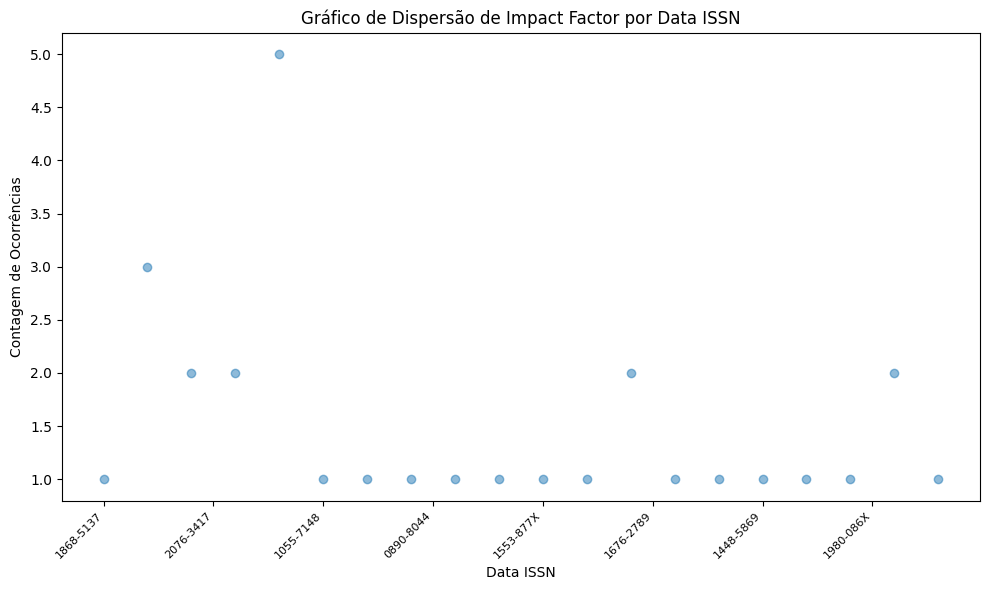

In [94]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        if unique_data_issn[x] == 'NULL':
            return 'NULL'
        # Formatar o valor para exibição com hífen
        return f"{unique_data_issn[x][:4]}-{unique_data_issn[x][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    # Filtrar os valores "NULL" e extrair os valores de data-issn
    data_issn_values = [entry["data-issn"] for entry in jcr_properties_list if entry["data-issn"] != "NULL"]

    # Contar as ocorrências únicas de data-issn
    data_issn_counts = Counter(data_issn_values)

    # Obter as ocorrências únicas de data-issn e suas contagens
    unique_data_issn, counts = zip(*data_issn_counts.items())

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(unique_data_issn)), counts, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por Data ISSN')
    plt.xlabel('Data ISSN')
    plt.ylabel('Contagem de Ocorrências')

    # Formatar os rótulos no eixo x usando a função personalizada
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(int(x), pos, unique_data_issn)))
    
    # Rotacionar rótulos do eixo x para melhor visibilidade
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.tight_layout()
    plt.show()

# Chame a função para plotar o gráfico
plot_scatter(jcr_properties_list)

In [95]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        if unique_data_issn[x] == 'NULL':
            return 'NULL'
        # Formatar o valor para exibição com hífen
        return f"{unique_data_issn[x][:4]}-{unique_data_issn[x][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    # Filtrar os valores "NULL" e extrair os valores de data-issn e impact-factor
    data_issn_values = []
    impact_factor_values = []
    for entry in jcr_properties_list:
        data_issn = entry["data-issn"]
        impact_factor = entry["impact-factor"]

        if data_issn != "NULL" and impact_factor != "NULL":
            data_issn_values.append(data_issn)
            impact_factor_values.append(float(impact_factor))

    # Contar as ocorrências únicas de data-issn
    data_issn_counts = Counter(data_issn_values)

    # Obter as ocorrências únicas de data-issn e suas contagens
    unique_data_issn, counts = zip(*data_issn_counts.items())

    # Contar a quantidade de valores "NULL"
    null_count = jcr_properties_list.count({"data-issn": "NULL", "impact-factor": "NULL"})

    # Inserir a contagem de "NULL" como uma entrada extra
    unique_data_issn = list(unique_data_issn)
    counts = list(counts)
    unique_data_issn.append('NULL')
    counts.append(null_count)

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(unique_data_issn)), counts, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por Data ISSN')
    plt.xlabel('Data ISSN')
    plt.ylabel('Contagem de Ocorrências')

    # Adicionar rótulos de dados com os valores de impact-factor (exceto para a entrada "NULL")
    for i, count in enumerate(counts[:-1]):
        plt.annotate(f'Impact: {impact_factor_values[i]:.3f}', (i, count), textcoords="offset points", xytext=(0, 10), ha='center')

    # Adicionar rótulo para a entrada "NULL" com a contagem correta
    plt.annotate(f'NULL: {null_count}', (len(unique_data_issn) - 1, null_count), textcoords="offset points", xytext=(0, 10), ha='center')

    # Formatar os rótulos no eixo x usando a função personalizada
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(int(x), pos, unique_data_issn)))
    
    # Rotacionar rótulos do eixo x para melhor visibilidade
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.tight_layout()
    plt.show()

# Chame a função para plotar o gráfico
plot_scatter(jcr_properties_list)


AttributeError: 'dict_values' object has no attribute 'count'

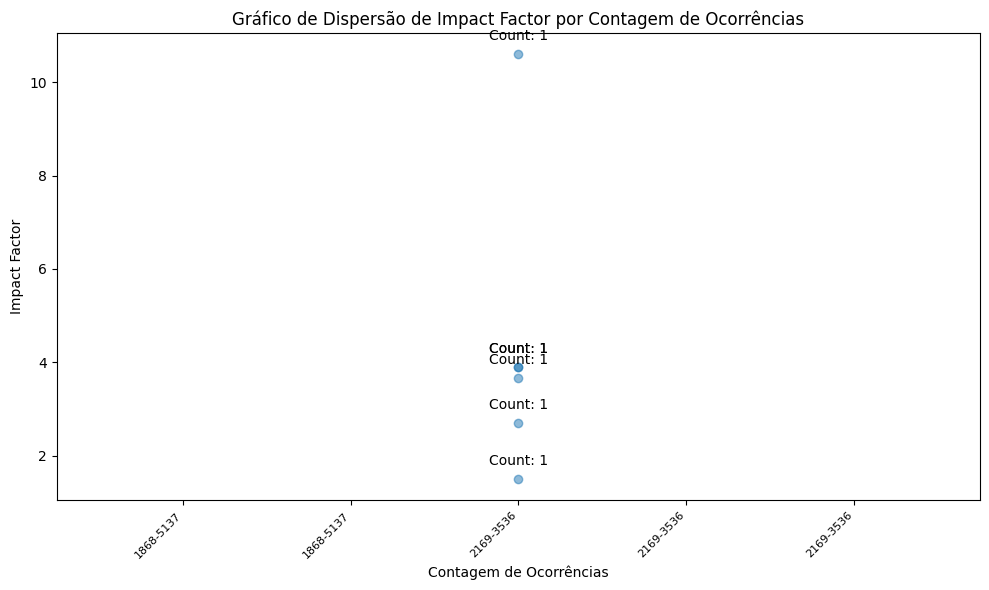

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        # Formatar o valor para exibição com hífen, incluindo "NULL"
        return f"{unique_data_issn[int(x)][:4]}-{unique_data_issn[int(x)][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    # Filtrar os valores "NULL" e extrair os valores de data-issn e impact-factor
    data_issn_values = []
    impact_factor_values = []
    for entry in jcr_properties_list:
        data_issn = entry["data-issn"]
        impact_factor = entry["impact-factor"]

        if data_issn != "NULL" and impact_factor != "NULL":
            data_issn_values.append(data_issn)
            impact_factor_values.append(float(impact_factor))

    # Contar as ocorrências únicas de data-issn
    data_issn_counts = Counter(data_issn_values)

    # Obter as ocorrências únicas de data-issn e suas contagens
    unique_data_issn, counts = zip(*data_issn_counts.items())

    # Adicionar "NULL" às ocorrências únicas, mesmo que não haja ocorrências
    unique_data_issn = list(unique_data_issn)
    counts = list(counts)
    unique_data_issn.append('NULL')
    counts.append(0)  # Adicionar contagem zero para "NULL"

    # Criar uma lista de valores de impacto correspondentes às contagens e valores "NULL"
    impact_values = []
    for data in unique_data_issn:
        if data == 'NULL':
            impact_values.append(None)  # Use None para valores "NULL"
        else:
            # Encontre o índice correspondente em data_issn_values
            idx = data_issn_values.index(data)
            impact_values.append(impact_factor_values[idx])

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(counts, impact_values, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por Contagem de Ocorrências')
    plt.xlabel('Contagem de Ocorrências')
    plt.ylabel('Impact Factor')

    # Adicionar rótulos de dados com as contagens
    for i, count in enumerate(counts):
        if unique_data_issn[i] == 'NULL':
            plt.annotate(f'Count: {count}', (count, 0), textcoords="offset points", xytext=(0, 10), ha='center')
        else:
            plt.annotate(f'Count: {count}', (count, impact_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    # Formatar os rótulos no eixo x usando a função personalizada
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(x, pos, unique_data_issn)))
    
    # Rotacionar rótulos do eixo x para melhor visibilidade
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.tight_layout()
    plt.show()

# Chame a função para plotar o gráfico
plot_scatter(jcr_properties_list)

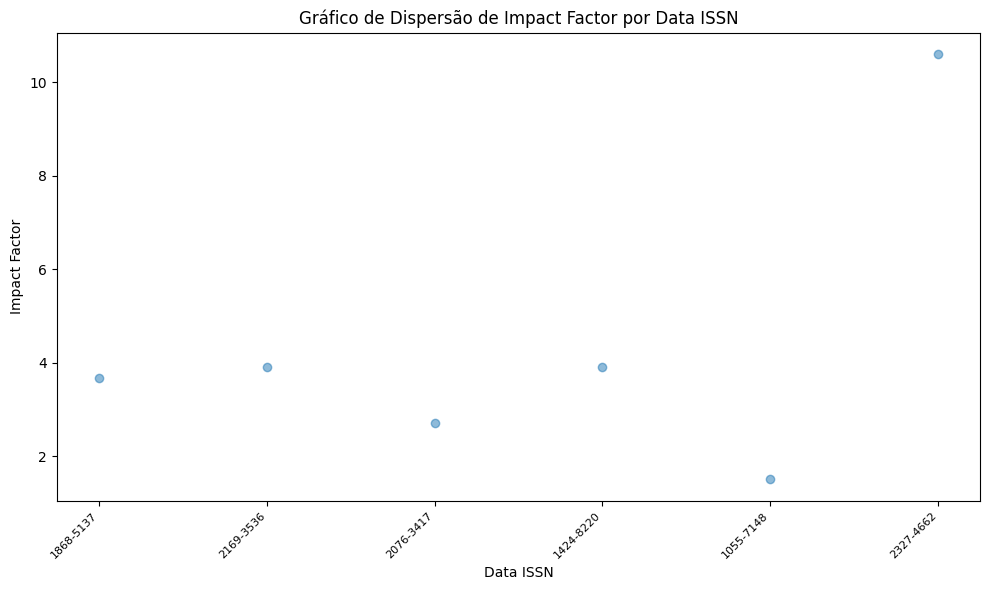

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        # Formatar o valor para exibição com hífen, incluindo "NULL"
        return f"{unique_data_issn[int(x)][:4]}-{unique_data_issn[int(x)][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    # Extrair os valores de data-issn e impact-factor
    data_issn_values = []
    impact_factor_values = []
    for entry in jcr_properties_list:
        data_issn = entry["data-issn"]
        impact_factor = entry["impact-factor"]

        if impact_factor != "NULL":
            data_issn_values.append(data_issn)
            impact_factor_values.append(float(impact_factor))

    # Contar as ocorrências únicas de data-issn, incluindo "NULL"
    data_issn_counts = Counter(data_issn_values)
    unique_data_issn = list(data_issn_counts.keys())
    unique_data_issn.append('NULL')  # Adicionar "NULL" à lista única de data-issn
    counts = [data_issn_counts[data] for data in unique_data_issn]

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))

    # Criar uma lista correspondente de valores x para cada valor em y
    x_values = [unique_data_issn.index(data_issn) for data_issn in data_issn_values]

    plt.scatter(x_values, impact_factor_values, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por Data ISSN')
    plt.xlabel('Data ISSN')
    plt.ylabel('Impact Factor')

    # Formatar os rótulos no eixo x usando a função personalizada
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(x, pos, unique_data_issn)))
    
    # Rotacionar rótulos do eixo x para melhor visibilidade
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.tight_layout()
    plt.show()

# Chame a função para plotar o gráfico
plot_scatter(jcr_properties_list)

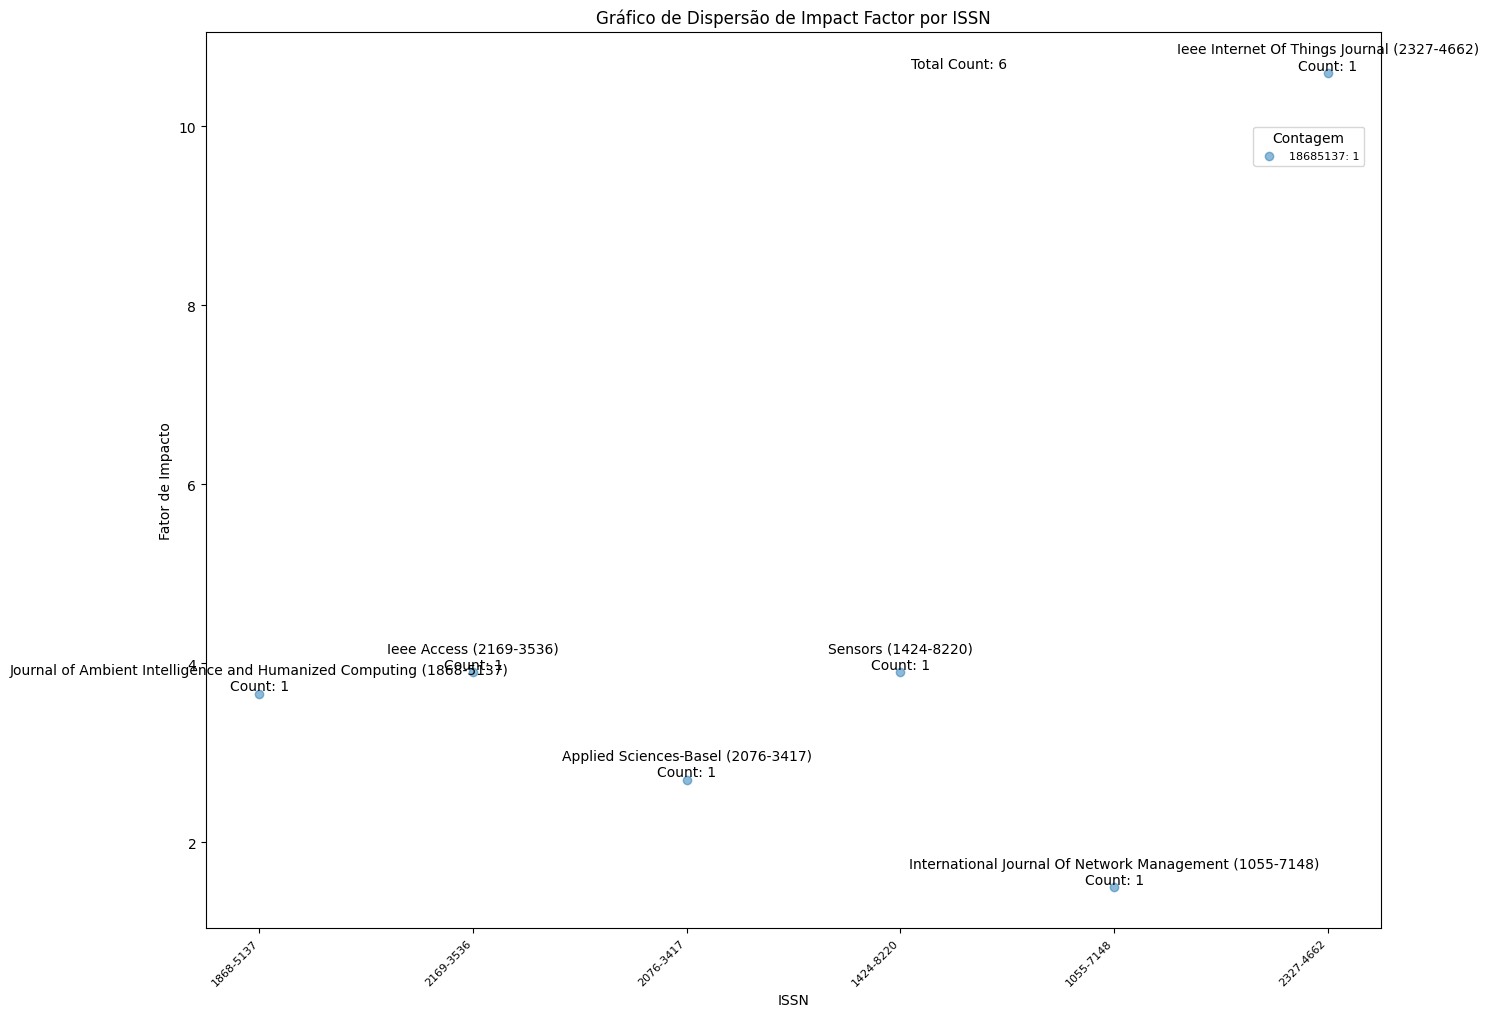

In [100]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        return f"{unique_data_issn[int(x)][:4]}-{unique_data_issn[int(x)][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    data_issn_values = []
    impact_factor_values = []
    journal_values = []
    for entry in jcr_properties_list:
        data_issn = entry["data-issn"]
        impact_factor = entry["impact-factor"]
        journal = entry["journal"]

        if impact_factor != "NULL":
            data_issn_values.append(data_issn)
            impact_factor_values.append(float(impact_factor))
            journal_values.append(journal)

    data_issn_counts = Counter(data_issn_values)
    unique_data_issn = list(data_issn_counts.keys())
    unique_data_issn.append('NULL')
    counts = [data_issn_counts[data] for data in unique_data_issn]

    fig, ax = plt.subplots(figsize=(15, 9))

    x_values = [unique_data_issn.index(data_issn) for data_issn in data_issn_values]

    plt.scatter(x_values, impact_factor_values, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por ISSN')
    plt.xlabel('ISSN')
    plt.ylabel('Fator de Impacto')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(x, pos, unique_data_issn)))

    for i, (journal, count) in enumerate(zip(journal_values, counts)):
        plt.annotate(f'{journal}\nCount: {count}', (x_values[i], impact_factor_values[i]), fontsize=10, ha='center', va='bottom')

    total_count = sum(counts)
    max_impact = max(impact_factor_values)
    
    # Adicionar texto no centro superior do gráfico
    plt.text(len(unique_data_issn) / 2, max_impact + 0.05, f'Total Count: {total_count}', ha='right', fontsize=10)

    plt.xticks(rotation=45, ha="right", fontsize=8)

    # Adicionar legenda com os valores de contagem fora da área do gráfico
    legend_labels = [f'{data_issn}: {count}' for data_issn, count in zip(unique_data_issn, counts)]
    legend = ax.legend(legend_labels, title='Contagem', fontsize=8, loc='upper right', bbox_to_anchor=(0.99, 0.9))

    plt.tight_layout()
    plt.subplots_adjust(top=1.1)  # Ajusta a posição superior do gráfico para acomodar a legenda

    plt.show()

plot_scatter(jcr_properties_list)

Counter({'14248220': 5, 'NULL': 4, '21693536': 3, '20763417': 2, '22360700': 2, '16762789': 2, '01018191': 2, '18685137': 1, '10557148': 1, '23274662': 1, '08908044': 1, '10745351': 1, '10848045': 1, '1553877X': 1, '24942715': 1, '15501329': 1, '15487709': 1, '14485869': 1, '15662535': 1, '1980086X': 1, '14145685': 1})
['18685137', '21693536', 'NULL', '20763417', '22360700', '14248220', '10557148', '23274662', '08908044', '10745351', '10848045', '1553877X', '24942715', '16762789', '15501329', '15487709', '14485869', '15662535', '1980086X', '01018191', '14145685', 'NULL']
[1, 3, 4, 2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 4]


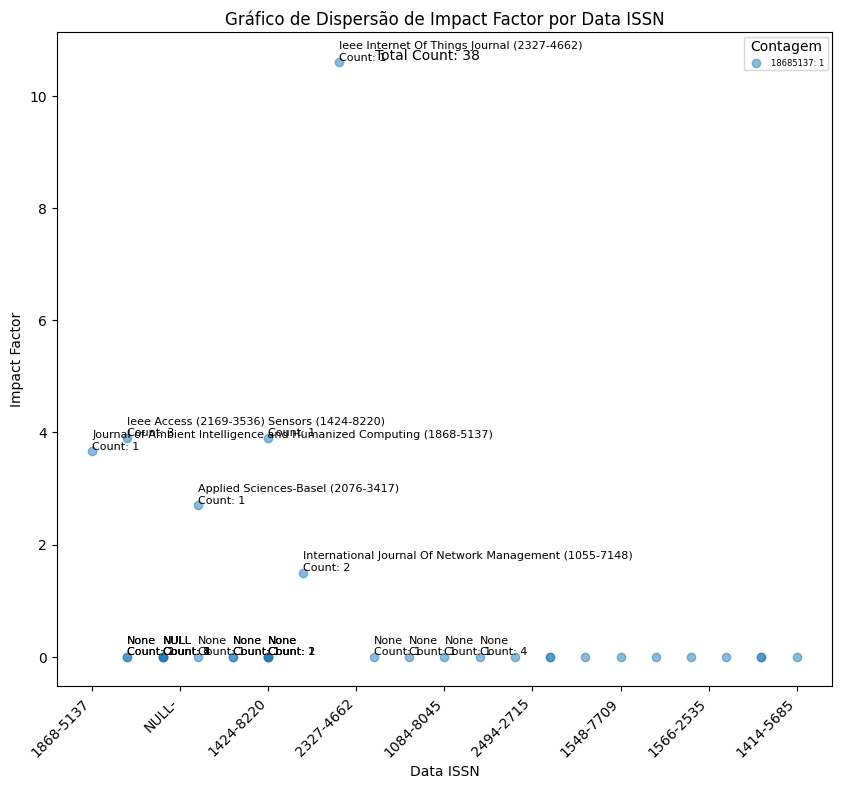

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

def format_issn_ticks(x, pos, unique_data_issn):
    if x < len(unique_data_issn):
        return f"{unique_data_issn[int(x)][:4]}-{unique_data_issn[int(x)][4:]}"
    return ''

def plot_scatter(jcr_properties_list):
    data_issn_values = []
    impact_factor_values = []
    journal_values = []
    for entry in jcr_properties_list:
        data_issn = entry["data-issn"]
        impact_factor = entry["impact-factor"]
        journal = entry["journal"]

        if impact_factor != "NULL":
            data_issn_values.append(data_issn)
            impact_factor_values.append(float(impact_factor))
            journal_values.append(journal)
        else:
            data_issn_values.append(data_issn)
            impact_factor_values.append(0)
            journal_values.append(journal)            

    data_issn_counts = Counter(data_issn_values)
    print(data_issn_counts)
    unique_data_issn = list(data_issn_counts.keys())
    unique_data_issn.append('NULL')
    print(unique_data_issn)
    counts = [data_issn_counts[data] for data in unique_data_issn]
    print(counts)

    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = [unique_data_issn.index(data_issn) for data_issn in data_issn_values]

    plt.scatter(x_values, impact_factor_values, alpha=0.5)
    plt.title('Gráfico de Dispersão de Impact Factor por Data ISSN')
    plt.xlabel('Data ISSN')
    plt.ylabel('Impact Factor')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_issn_ticks(x, pos, unique_data_issn)))

    for i, (journal, count) in enumerate(zip(journal_values, counts)):
        plt.annotate(f'{journal}\nCount: {count}', (x_values[i], impact_factor_values[i]), fontsize=8, ha='left', va='bottom')

    total_count = sum(counts)
    max_impact = max(impact_factor_values)
    
    # Adicionar texto no centro superior do gráfico com contagem total de artigos
    plt.text(len(unique_data_issn) / 2, max_impact + 0.05, f'Total Count: {total_count}', ha='right', fontsize=10)

    plt.xticks(rotation=45, ha="right", fontsize=10)

    # Adicionar legenda com os valores de contagem fora da área do gráfico
    legend_labels = [f'{ISSN}: {count}' for ISSN, count in zip(unique_data_issn, counts)]
    legend = ax.legend(legend_labels, title='Contagem', fontsize=6, loc='upper right')
    

    # plt.tight_layout()
    plt.subplots_adjust(top=1.2)  # Ajusta a posição superior do gráfico para acomodar a legenda

    plt.show()

plot_scatter(jcr_properties_list)

In [103]:
import plotly.express as px
import pandas as pd
from collections import Counter

def plot_scatter(jcr_properties_list):
    data = pd.DataFrame(jcr_properties_list)

    # Filtrar valores de impact factor diferentes de 'NULL'
    data = data[data['impact-factor'] != 'NULL']

    # Contagem de ocorrências por data ISSN
    data_counts = data['data-issn'].value_counts().reset_index()
    data_counts.columns = ['data-issn', 'count']

    # Converter 'impact-factor' para float
    data['impact-factor'] = data['impact-factor'].astype(float)

    # Criar o gráfico de dispersão com Plotly Express
    fig = px.scatter(data, x='data-issn', y='impact-factor', color='data-issn',
                     title='Gráfico de Dispersão de Fator de Impacto versus ISSN',
                     labels={'data-issn': 'ISSN', 'impact-factor': 'Impact Factor'},
                     hover_data=['journal'])

    # Adicionar contagem como tamanho dos pontos
    fig.update_traces(marker=dict(size=data_counts['count'] * 20))

    # Personalizar layout
    fig.update_xaxes(tickangle=45)
    fig.update_traces(marker=dict(opacity=1))

    # Exibir o gráfico
    fig.show()

# Chame a função com sua lista de dados jcr_properties_list
plot_scatter(jcr_properties_list)

In [104]:
data = pd.DataFrame(jcr_properties_list)

# Filtrar valores de impact factor diferentes de 'NULL'
data_filtered = data[data['impact-factor'] != 'NULL']

# Contagem de ocorrências por data ISSN
data_counts = data_filtered['data-issn'].value_counts().reset_index()
data_counts.columns = ['data-issn', 'count']

# Calcular a contagem de valores NULL
null_count = len(data) - len(data_filtered)

# Criar um novo DataFrame com a linha para valores NULL
null_row    = pd.DataFrame({'data-issn': ['NULL'], 'count': [null_count]})
data_counts = pd.concat([data_counts, null_row], ignore_index=True)


In [106]:
data_filtered

,data-issn,impact-factor,jcr-year,journal,raw_data
0,18685137,3.662,(JCR 2021),Journal of Ambient Intelligence and Humanized Computing (1868-5137),
1,21693536,3.9,(JCR 2022),Ieee Access (2169-3536),
6,20763417,2.7,(JCR 2022),Applied Sciences-Basel (2076-3417),
10,14248220,3.9,(JCR 2022),Sensors (1424-8220),
13,10557148,1.5,(JCR 2022),International Journal Of Network Management (1055-7148),
14,23274662,10.6,(JCR 2022),Ieee Internet Of Things Journal (2327-4662),


In [105]:
data_counts

,data-issn,count
0,18685137,1
1,21693536,1
2,20763417,1
3,14248220,1
4,10557148,1
5,23274662,1
6,NULL,28


In [ ]:
## https://developer.clarivate.com/
## https://developer.clarivate.com/apis?filter=on&Web+of+Science=on
# Subscription and access: Access to this API requires a paid license. The license is available as an add-on subscription to Journal Citation Reports™ or InCites Benchmarking & Analytics™. Don't hesitate to get in touch with us with any questions you may have. This API uses API Key access. All APIs in our Developer Portal require registering an application.
# Plans: This API has only one plan (Journals API Plan) and allows a maximum of 5 requests per second.

# !pip install git+https://github.com/clarivate/wosjournals-python-client.git
# !pip install git+https://github.com/Clarivate-SAR/woslite_py_client.git

In [ ]:
import woslite_client


In [ ]:
import clarivate.wos_journals.client
# from __future__ import print_function
import time
import woslite_client
from woslite_client.rest import ApiException
from pprint import pprint

In [ ]:
data

In [ ]:
data_filtered

In [ ]:
data_counts

In [ ]:
data

In [108]:
data_issn_values = []
impact_factor_values = []
journal_values = []
for entry in jcr_properties_list:
    data_issn = entry["data-issn"]
    impact_factor = entry["impact-factor"]
    journal = entry["journal"]

    if impact_factor != "NULL":
        data_issn_values.append(data_issn)
        impact_factor_values.append(float(impact_factor))
        journal_values.append(journal)
    else:
        data_issn_values.append(data_issn)
        impact_factor_values.append(0)
        journal_values.append('NULL')            

data_issn_counts = Counter(data_issn_values)
print(data_issn_counts)
unique_data_issn = list(data_issn_counts.keys())

print(unique_data_issn)
counts = [data_issn_counts[data] for data in unique_data_issn]
print(counts)
legend_labels = [f'{ISSN}: {count}' for ISSN, count in zip(unique_data_issn, counts)]

Counter({'14248220': 5, 'NULL': 4, '21693536': 3, '20763417': 2, '22360700': 2, '16762789': 2, '01018191': 2, '18685137': 1, '10557148': 1, '23274662': 1, '08908044': 1, '10745351': 1, '10848045': 1, '1553877X': 1, '24942715': 1, '15501329': 1, '15487709': 1, '14485869': 1, '15662535': 1, '1980086X': 1, '14145685': 1})
['18685137', '21693536', 'NULL', '20763417', '22360700', '14248220', '10557148', '23274662', '08908044', '10745351', '10848045', '1553877X', '24942715', '16762789', '15501329', '15487709', '14485869', '15662535', '1980086X', '01018191', '14145685']
[1, 3, 4, 2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1]


In [109]:
legend_labels

['18685137: 1',
 '21693536: 3',
 'NULL: 4',
 '20763417: 2',
 '22360700: 2',
 '14248220: 5',
 '10557148: 1',
 '23274662: 1',
 '08908044: 1',
 '10745351: 1',
 '10848045: 1',
 '1553877X: 1',
 '24942715: 1',
 '16762789: 2',
 '15501329: 1',
 '15487709: 1',
 '14485869: 1',
 '15662535: 1',
 '1980086X: 1',
 '01018191: 2',
 '14145685: 1']

## Outras formas de persistir

In [ ]:
## Para criar parâmetros dinâmicos e persistir níveis de detales usa-se APOC
def flatten_dict(d, parent_key='', sep='.'):
    items = {}
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.update(flatten_dict(v, new_key, sep=sep))
        else:
            items[new_key] = v
    return items

def persist_to_neo4j(extracted_data):
    driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "password"))
    try:
        with driver.session() as session:
            name = extracted_data.get('name', 'UNKNOWN')
            session.write_transaction(lambda tx: tx.run(
                "MERGE (n:Person {name: $name}) RETURN n",
                name=name,
            ))
            
            # Flatten the dictionary
            flat_data = flatten_dict(extracted_data)

            # Persist each flattened key-value pair
            for key, value in flat_data.items():
                if key is None or key == '':
                    continue
                
                query = f"MATCH (n:Person {{name: $name}}) SET n.`{key}` = $value RETURN n"
                session.write_transaction(lambda tx, query=query, value=value: tx.run(query, name=name, value=value))
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        driver.close()

In [ ]:
persist_to_neo4j(data_dict)

In [ ]:
# from neo4j import GraphDatabase

# def recursive_persist(tx, parent_node_id, properties):
#     for key, value in properties.items():
#         if key is None or key == '':
#             continue

#         if isinstance(value, dict):
#             # Create a new node for the nested dictionary and link it to the parent
#             result = tx.run(
#                 "MATCH (p) WHERE id(p) = $parent_id "
#                 "CREATE (p)-[:HAS]->(m:SubNode {name: $key}) "
#                 "RETURN id(m)",
#                 parent_id=parent_node_id,
#                 key=key
#             )
#             new_node_id = result.single()[0]

#             # Recursive call to set properties for the new node
#             recursive_persist(tx, new_node_id, value)
#         else:
#             # Directly set the primitive property on the parent node
#             tx.run(
#                 "MATCH (n) WHERE id(n) = $id "
#                 f"SET n.`{key}` = $value",
#                 id=parent_node_id,
#                 value=value
#             )

# def persist_to_neo4j(extracted_data):
#     driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "password"))
#     try:
#         with driver.session() as session:
#             def transactional_work(tx):
#                 name = extracted_data.get('name', 'UNKNOWN')
#                 properties = {k: v for k, v in extracted_data.items() if k != 'name'}
#                 result = tx.run(
#                     "MERGE (n:MyLabel {name: $name}) "
#                     "RETURN id(n)",
#                     name=name
#                 )
#                 root_node_id = result.single()[0]
#                 recursive_persist(tx, root_node_id, properties)

#             session.write_transaction(transactional_work)
#     except Exception as e:
#         print(f"An unexpected error occurred: {e}")
#     finally:
#         driver.close()

In [ ]:
# Test the function with your `extracted_data`
# persist_to_neo4j(extracted_data)
# # Sample invocation
# extracted_data = {
#     'name': 'João Doé',
#     'age': 30,
#     None: 'This will be ignored',
#     '': 'This will be ignored',
#     'nested_dict': {
#         'key1': 'value1',
#         'key2': None
#     },
#     'nested_list': [1, 2, 3]  # This will now be converted to a JSON string
# }
# persist_to_neo4j(extracted_data)

In [ ]:
## Teste funcional
# def main():
#     uri = "bolt://localhost:7687"
#     driver = GraphDatabase.driver(uri, auth=("neo4j", "password"))

#     production_dict = {
#         'name': 'John Doe',
#         'Properties': {
#             'Produções': [
#                 {'ano': '2023', 'revista': 'Journal A', 'jcr': '3.662', 'doi': 'some_doi'},
#                 {'ano': '2022', 'revista': 'Journal B', 'jcr': None, 'doi': 'another_doi'}
#             ]
#         }
#     }

#     with driver.session() as session:
#         session.write_transaction(add_producao, production_dict)

#     driver.close()

# if __name__ == "__main__":
#     main()

### b) Persistir produções como nós secundários

In [ ]:
from neo4j import GraphDatabase

## Persiste as produções como nós secundários ligados ao nó principal
def add_producao(tx, production_dict):
    # Extract person's name and properties sub-dictionary
    person_name = production_dict.get('name', 'UNKNOWN')
    properties_dict = production_dict.get('Properties', {})

    # First, merge the Person node based on the name
    tx.run("MERGE (a:Person {name: $person_name})", person_name=person_name)

    # Initialize an empty dictionary to hold the cleaned production data
    producoes = properties_dict.get('Produções', [])
    
    for producao in producoes:
        clean_producao = {}
        
        # Replace None with 'NULL' and ignore empty strings
        for key, value in producao.items():
            if value == '':
                continue
            if value is None:
                value = 'NULL'
            clean_producao[key] = value

        # Create or merge the Producao node based on unique keys ('ano' and 'revista' here)
        tx.run(
            "MERGE (p:Producao {ano: $ano, revista: $revista}) "
            "SET p += $props",
            ano=clean_producao.get('ano'),
            revista=clean_producao.get('revista'),
            props=clean_producao
        )

        # Connect the Person node to the Producao node
        tx.run(
            "MATCH (a:Person {name: $person_name}), (p:Producao {ano: $ano, revista: $revista}) "
            "MERGE (a)-[r:HAS_PRODUCOES]->(p)",
            person_name=person_name,
            ano=clean_producao.get('ano'),
            revista=clean_producao.get('revista')
        )

In [ ]:
articles_dict = {"Label": "Person", "name": {}, "Properties": {}}
articles_dict = extrair_normal(soup)
# articles_dict

In [ ]:
# Instantiate driver
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "password"))

# Create a session
session = driver.session()

# Call the function within a transaction
session.write_transaction(add_producao, articles_dict)

# Optionally, close the session and driver
session.close()
driver.close()

In [ ]:
## Persiste todod dados como propriedades de um nó
main_cell     = soup.find("div", class_="layout-cell-pad-main")
generic_dict = {"Label": "Person", "Properties": {}}
if main_cell:
    traverse(main_cell, generic_dict)

In [ ]:
generic_dict.keys()

In [ ]:
persist_to_neo4j(generic_dict)

# Reconhecimento de Entidades Nomeadas

In [ ]:
# !python -m spacy download en_core_web_lg

In [ ]:
!python -m spacy info

In [ ]:
def extract_named_entities(text):
    import spacy
    
    nlp_en = spacy.load("en_core_web_sm")
    nlp_pt = spacy.load("pt_core_news_lg")
    doc = nlp_pt(text)
    entities = {'ORG': [], 'GPE': [], 'NORP': [], 'PERSON': [], 'PRODUCT': [], 'WORK_OF_ART': []}
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
    return entities

In [ ]:
class GraphModel:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))
    
    def close(self):
        self._driver.close()

    def add_entity(self, entity_type, entity_value):
        with self._driver.session() as session:
            session.write_transaction(self._add_entity, entity_type, entity_value)
            
    @staticmethod
    def _add_entity(tx, entity_type, entity_value):
        query = f"MERGE (a:{entity_type} {{name: $name}})"
        tx.run(query, name=entity_value)
    
    def add_relation(self, src_type, src_name, rel_type, tgt_type, tgt_name):
        with self._driver.session() as session:
            session.write_transaction(self._add_relation, src_type, src_name, rel_type, tgt_type, tgt_name)
    
    @staticmethod
    def _add_relation(tx, src_type, src_name, rel_type, tgt_type, tgt_name):
        query = (
            f"MATCH (a:{src_type} {{name: $src_name}}), (b:{tgt_type} {{name: $tgt_name}}) "
            f"MERGE (a)-[:{rel_type}]->(b)"
        )
        tx.run(query, src_name=src_name, tgt_name=tgt_name)

In [ ]:
def flatten_dict(d):
    def expand(key, value):
        if isinstance(value, dict):
            return [(str(key) + '.' + str(k), v) for k, v in flatten_dict(value).items()]
        else:
            return [(str(key), value)]
        
    items = [item for k, v in d.items() for item in expand(k, v)]
    return dict(items)

def main(data_dict):
    graph_model = GraphModel("bolt://localhost:7687", "neo4j", "password")    
    flattened_data = flatten_dict(data_dict['Properties']['Identificação'])
    person_name = flattened_data.get('Nome', None)[0]
    print(f'Nome: {person_name}')
    if person_name:
        graph_model.add_entity("Person", person_name)
    
    institutional = flatten_dict(data_dict['Properties'])
    for key, value in institutional.items():
        if key in ['Endereço.Endereço Profissional']:
            text = ' '.join(value)
            print(text)
            entities = extract_named_entities(text)
            print(f'Entidades reconhecidas: {entities}')
            entities
            
            for org in entities.get('ORG', []):
                graph_model.add_entity("Organization", org)
                graph_model.add_relation("Person", person_name, "AFFILIATED_WITH", "Organization", org)
                
            for gpe in entities.get('GPE', []):
                graph_model.add_entity("Location", gpe)
                graph_model.add_relation("Person", person_name, "LOCATED_IN", "Location", gpe)

    projetos = flatten_dict(data_dict['Properties'])
    for key, value in projetos.items():
        if key in ['Projetos de pesquisa', 'Projetos de extensão', 'Projetos de desenvolvimento']:
            entities = extract_named_entities(value)
            
            for org in entities.get('ORG', []):
                graph_model.add_entity("Organization", org)
                graph_model.add_relation("Person", person_name, "HAS_PROJECT_IN", "Organization", org)
                
            for gpe in entities.get('GPE', []):
                graph_model.add_entity("Location", gpe)
                graph_model.add_relation("Person", person_name, "LOCATED_IN", "Location", gpe)

    graph_model.close()

In [ ]:
import spacy

# Processamento para eliminar strings duplicadas e vazias
def remove_duplicates(entities):
    for key in entities.keys():
        seen = set()
        unique_values = []
        
        for value in entities[key]:
            lower_value = value.lower()
            if lower_value not in seen and value.strip():
                seen.add(lower_value)
                unique_values.append(value)
        
        # Atualização do dicionário
        entities[key] = unique_values
    return entities

def extract_named_entities(text):
    nlp = spacy.load('en_core_web_lg')  # Assuming the use of the small Portuguese model
    doc = nlp(text)
    entities = {'ORG': [], 'GPE': [], 'PHONE': [], 'URL': []}
    for ent in doc.ents:
        if ent.label_ in entities.keys():
            entities[ent.label_].append(ent.text)
    
    unique_entities = remove_duplicates(entities)
    
    return unique_entities

text = 'Pós-Doutor em Computação pela Sorbonne Université-Pierre et Marie Curie (França - 2020). Doutor em Ciência da Computação pela Universitat Politecnica de Catalunya (Espanha - 2005). Atualmente é professor titular da Universidade de Fortaleza - UNIFOR na qual é membro permanente dos programas de pós-graduação em Informática Aplicada (mestrado e doutorado) e do mestrado profissional em administração. Possui mais de 100 trabalhos publicados em conferências e periódicos nacionais e internacionais. Tem experiência na área de Ciência da Computação, com ênfase em Ciência de Dados e Teleinformática, atuando principalmente nos seguintes temas: Redes Complexas, Grafos de Conhecimento, Aprendizagem de Máquina, Internet das Coisas, Segurança e Blockchain. (Texto informado pelo autor)\n'
entities = extract_named_entities(text)
entities

In [ ]:
data_dict = node_raimir
print(data_dict['Properties'].keys())

main(data_dict)

# <b>FASE 3: Extrair Lista de Currículos Lattes</b>

## Funções de extração de lista de currículos

In [ ]:
def retry(func,
          expected_ex_type=Exception,
          limit=0,
          wait_ms=100,
          wait_increase_ratio=2,
          logger=None,
          on_exhaust="throw"
          ):
    """
    Retry a function invocation until no exception occurs
    :param func: function to invoke
    :param expected_ex_type: retry only if exception is subclass of this type
    :param limit: maximum number of invocation attempts, 0 for unlimited attempts.
    :param wait_ms: initial wait time after each attempt in milliseconds.
    :param wait_increase_ratio: increase wait period by multiplying this value after each attempt.
    :param logger: if not None, retry attempts will be logged to this logging.logger
    :param on_exhaust: return value when retry attempts exhausted. Default is "throw" which will rethrow the exception
                 of the last attempt.
    :return: result of first successful invocation
    :raises: last invocation exception if attempts exhausted or exception is not an instance of ex_type
    """

    attempt = 1
    while True:
        try:
            return func()
        except Exception as ex:
            if not isinstance(ex, expected_ex_type):
                raise ex

            if logger:
                logger.error("Failed execution attempt #%d", attempt, exc_info=ex)

            # check if attempts exhausted
            if 0 < limit <= attempt:
                if logger:
                    logger.warning("Attempt limit (%d) reached", limit)
                if on_exhaust == "throw":
                    raise ex
                return on_exhaust

            # prepare for next attempt
            attempt += 1
            if logger:
                logger.info("Waiting %d ms before attempt #%d", wait_ms, attempt)
            time.sleep(wait_ms / 1000)
            wait_ms *= wait_increase_ratio

def paginar(browser):
    try:
        css_paginacao="div.paginacao:nth-child(2)"  #seletorcss="div.paginacao:nth-child(4) > a:nth-child(2)"
        WebDriverWait(browser, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_paginacao)))
        paginacao = browser.find_element(By.CSS_SELECTOR, css_paginacao)
        paginas=paginacao.text.split(' ')
        remover=['','anterior','...']
        numpaginas = [x for x in paginas if x not in remover]
        # print('NumPáginas interno:',numpaginas)
    except Exception as e:
        print('Erro ao utilizar função paginar():', e)
    return numpaginas

def achar_busca(browser, delay):
    '''
    Função para clicar no botão Buscar Currículo
    '''
    delay=10
    try:
        limite=5
        xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
        retry(WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=20,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        link_nome  = browser.find_element(By.XPATH, xpath_nome)
        # ActionChains(browser).move_to_element(link_nome).perform()
        
        # Avaliar 'Stale file handle'
        if link_nome.text == None:
            xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
            
            print('Sem resposta do servidor, tentando novamente...')
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=200,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        return link_nome

    except TimeoutException as t:
        print(f'Erro de conexão durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
        time.sleep(2)

def preencher_busca(browser, delay, NOME):
    '''
    Função para passar o nome para campo de busca
    '''
    try:
        nome = lambda: browser.find_element(By.CSS_SELECTOR, ("#textoBusca"))
        nome().send_keys(Keys.CONTROL + "a")
        nome().send_keys(NOME)
        # browser.find_element(By.CSS_SELECTOR, ("#textoBusca")).send_keys(Keys.ENTER)
        seletorcss='div.layout-cell-12:nth-child(8) > div:nth-child(1) > div:nth-child(1) > a:nth-child(1)'
        # seletorcss="#textoBusca"  
        
        time.sleep(0.5)
        WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss))).click()
        seletorcss="#botaoBuscaFiltros"  
        
        WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss)))
        
    except Exception as e:
        traceback_str = ''.join(traceback.format_tb(e.__traceback__))          
        print('Erro ao preencher nome no campo de busca, pausando por 1 segundo')
        print(e,traceback_str)
        # print(e)
        # time.sleep(1.5)

def definir_filtros(browser, delay, mestres=True, assunto=False):
    '''
    Clica nos check-boxes para definir os filtros de buscas
    Para buscar por Assuntos usar parâmetro True, caso omitido fará busca por Nome por default
    '''
    from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.common.by import By
    import traceback   
    
    ## Aguardar carregar e clicar em checkbox de Assunto
    try:
        if mestres == True:
            limite=2
            ## Aguardar opção dropdown ser carregada e clicar em sua checkbox
            css_buscar_demais = '#buscarDemais'
            checkbox_buscar_demais = browser.find_element(By.CSS_SELECTOR, css_buscar_demais)
            
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, css_buscar_demais))),
                   wait_ms=150,
                   limit=limite, 
                   on_exhaust=(f'Problema clicar em {checkbox_buscar_demais}, {limite} tentativas sem sucesso.'))
            
            time.sleep(1)
            checkbox_buscar_demais.click()
            print(f'Clique efetuado em {checkbox_buscar_demais}')

        # css_estrangeiros  = '#buscarEstrangeiros'

        if assunto == True:
            ## Implementar número de retentativas para casos de conexão muito instável
            limite=5
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "#buscaAssunto"))).click(),
                #    expected_ex_type=ZeroDivisionError, 
                   wait_ms=200,
                   limit=limite, 
                #    logger=logger, 
                   on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   
        
            ## Aguardar opção Atuação Profissional ser carregada e clicar em sua checkbox
            xpath_atuacaoprofissional = ".//*[contains(text(), 'Atuação profissional')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_atuacaoprofissional))).click()

            ## Aguardar opção Ciências da Saúde ser carregada e clicar em sua checkbox
            xpath_cienciassaude = ".//*[contains(text(), 'Ciências da Saúde')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_cienciassaude))).click()
            #browser.find_element_by_xpath(xpath_cienciassaude).click()        

            ## Aguardar opção Enfermagem ser carregada e clicar em sua checkbox
            xpath_enfermagem    = ".//*[contains(text(), 'Enfermagem')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_enfermagem))).click()
            #browser.find_element_by_xpath(xpath_enfermagem).click()
            aplicar_link  = browser.find_element(By.LINK_TEXT, 'Aplicar')
            aplicar_link.click()
   
    except Exception as e:
        print(f'Erro na função definir_filtros()')
        print(e)
        # traceback_str = ''.join(traceback.format_tb(e.__traceback__))
        # print(e, traceback_str) 

def procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite):
    from selenium.common import exceptions
    from pyjarowinkler.distance import get_jaro_distance
    ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)
    ## Receber a quantidade de opções ao ler elementos de resultados
    duvidas   = []
    force_break_loop = False
    try:
        css_resultados = ".resultado"
        WebDriverWait(browser, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
        resultados = browser.find_elements(By.CSS_SELECTOR, css_resultados)       
        ## Ler quantidade de resultados apresentados pela busca de nome
        try:
            css_qteresultados = ".tit_form > b:nth-child(1)"
            WebDriverWait(browser, delay).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, css_qteresultados)))                       
            soup = BeautifulSoup(browser.page_source, 'html.parser')
            div_element = soup.find('div', {'class': 'tit_form'})
            match = re.search(r'<b>(\d+)</b>', str(div_element))
            if match:
                qte_resultados = int(match.group(1))
                print(f'{qte_resultados} resultados para {NOME}')
            else:
                raise Exception
        except Exception as e:
            print('Erro ao ler a quantidade de resultados:')
            print(e)
            return np.NaN, NOME, np.NaN, e, browser
        
        ## Escolher função a partir da quantidade de resultados da lista apresentada na busca
        ## Ao achar clica no elemento elm_vinculo com link do nome para abrir o currículo
        numpaginas = paginar(browser)
        if numpaginas == [] and qte_resultados==1:
            # capturar link para o primeiro nome resultado da busca
            ## TO-DO inserir a crítica para o 'Stale file handle'
            try:
                css_linknome = ".resultado > ol:nth-child(1) > li:nth-child(1) > b:nth-child(1) > a:nth-child(1)"
                WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_linknome)))            
                elm_vinculo  = browser.find_element(By.CSS_SELECTOR, css_linknome)
                nome_vinculo = elm_vinculo.text
            except Exception as e:
                print('Erro ao encontrar o primeiro resultado da lista de nomes:',e)
                return np.NaN, NOME, np.NaN, e, browser
            # print('Clicar no nome único:', nome_vinculo)
            try:
                retry(ActionChains(browser).click(elm_vinculo).perform(),
                       wait_ms=20,
                       limit=limite,
                       on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))   
            except Exception as e:
                print('Erro ao clicar no único nome encontrado anteriormente',e)
                return np.NaN, NOME, np.NaN, e, browser
        
        ## Quantidade de resultados até 10 currículos, acessados sem paginação
        else:
            print(f'{qte_resultados} currículos de homônimos em potencial...')
            numpaginas = paginar(browser)
            numpaginas.append('próximo')
            iteracoes=0
            ## iterar em cada página de resultados
            pagin = qte_resultados//10+1
            for i in range(pagin+1):
                # print(i,'/',pagin)
                iteracoes+=1
                try:
                    numpaginas = paginar(browser)
                    print(f'Iteração: {iteracoes}. Páginas sendo lidas: {numpaginas}')
                    css_resultados = ".resultado"
                    WebDriverWait(browser, delay).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
                    resultados = browser.find_elements(By.CSS_SELECTOR, css_resultados)
                except Exception as e:
                    print('Erro ao paginar:',e)
                ## iterar em cada resultado
                for n,i in enumerate(resultados):
                    linhas = i.text.split('\n\n')
                    # print(linhas)
                    if 'Stale file handle' in str(linhas):
                        return np.NaN, NOME, np.NaN, 'Stale file handle', browser
                    for m,linha in enumerate(linhas):
                        # print(f'\nOrdem da linha: {m+1}, de total de linhas {len(linhas)}')
                        # print('Conteúdo da linha:',linha.lower())
                        print(linha)
                        try:
                            if instituicao.lower() in linha.lower() or unidade.lower() in linha.lower() or termo.lower() in linha.lower():
                                # print('Vínculo encontrado!')
                                count=m
                                # print(' NOME:', NOME, type(NOME))
                                # test = linhas[count].split('\n')[0]
                                # print('TESTE:',test, type(test))
                                while get_jaro_distance(linhas[count].split('\n')[0], str(NOME)) < 0.75:
                                    count-=1
                                print('Identificado vínculo com o interesse de análise no resultado:', m+1)
                                nome_vinculo = linhas[count].strip()
                                print(f'    Achado: {nome_vinculo}')
                                try:
                                    css_vinculo = f".resultado > ol:nth-child(1) > li:nth-child({m+1}) > b:nth-child(1) > a:nth-child(1)"
                                    # print('\nCSS_SELECTOR usado:', css_vinculo)
                                    css_alvo = '.resultado > ol:nth-child(1) > li:nth-child(7) > b:nth-child(1) > a:nth-child(1)'
                                    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_vinculo)))            
                                    elm_vinculo  = browser.find_element(By.CSS_SELECTOR, css_vinculo)
                                    nome_vinculo = elm_vinculo.text
                                    # print('Elemento retornado:',nome_vinculo)
                                    retry(ActionChains(browser).click(elm_vinculo).perform(),
                                        wait_ms=100,
                                        limit=limite,
                                        on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))            
                                except Exception as e:
                                    print('Erro ao achar o link do nome com múltiplos resultados')
                                    return np.NaN, NOME, np.NaN, e, browser
                                force_break_loop = True
                                break
                        except Exception as e2:
                            traceback_str = ''.join(traceback.format_tb(e2.__traceback__))
                            print('Erro ao procurar vínculo com currículos achados')    
                            print(e2,traceback_str)
                        ## Caso percorra todos elementos da lista e não encontre vínculo adiciona à dúvidas quanto ao nome
                        if m==(qte_resultados):
                            print(f'Não encontrada nenhuma referência à {instituicao} ou ao {unidade} ou ao termo {termo}')
                            duvidas.append(NOME)
                            # clear_output(wait=True)
                            # browser.quit()
                            continue
                    if force_break_loop:
                        break
                try:
                    prox = browser.find_element(By.PARTIAL_LINK_TEXT, 'próximo')
                    prox.click()
                except:
                    continue
        try:
            elm_vinculo.text
            # print(f'Nomes: {NOME} | {elm_vinculo.text}')
        except:
            return np.NaN, NOME, np.NaN, 'Vínculo não encontrado', browser
    except Exception as err:
        print('Erro ao sair da função procurar_vinculos()')
        print('Conteúdo do erro:',err)
        return np.NaN, NOME, np.NaN, err, browser
    return elm_vinculo, np.NaN, np.NaN, np.NaN, browser

def listar_idlattes(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='ID Lattes:']
    return df_idlattes

def listar_artigos(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='Artigos completos publicados em periódicos']
    return df_idlattes

def contar_artigos(df_secoes):
    def count_year_occurrences(content):
        """Count the number of occurrences of four-digit years followed by a period in the given string.""" 

        import re

        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        pattern = r'\b\d{4}\.'
        return len(re.findall(pattern, content))

    def extract_citations(content):
        import re

        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        citation_pattern = r'Citações:([\d\|]+),'
        all_citations = re.findall(citation_pattern, content)
        total_citations = 0
        for citation_group in all_citations:
            numbers = map(int, citation_group.split('|'))
            total_citations += sum(numbers)
        return len(all_citations), total_citations

    df_secoes_contadas = df_secoes.copy()
    df_secoes_contadas['QTE_ARTIGOS'] = df_secoes['CONTEUDOS'].apply(count_year_occurrences)
    df_secoes_contadas['ARTIGOS_CITADOS'], df_secoes['SOMA_CITACOES'] = zip(*df_secoes['CONTEUDOS'].apply(extract_citations))

    return df_secoes_contadas

# Extração com BeaultifulSoap
def parse_header(soup):
    title = soup.title.string if soup.title else "Unknown"
    meta_keywords = soup.find("meta", {"http-equiv": "keywords"})["content"] if soup.find("meta", {"http-equiv": "keywords"}) else "Unknown"
    return {"title": title, "meta_keywords": meta_keywords}

def parse_h1_elements(soup, parent_node, graph):


    h1_elements = soup.find_all('h1', {'tabindex': '0'})
    for elem in h1_elements:
        h1_text = elem.text.strip()
        h1_node = Node("H1Element", text=h1_text)
        graph.create(h1_node)
        relation = Relationship(parent_node, "HAS_SECTION", h1_node)
        graph.create(relation)

def persist_to_neo4j(header_data):
    graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))  # Substitua pelo seu endpoint e credenciais
    header_node = Node("Curriculum", title=header_data['title'], meta_keywords=header_data['meta_keywords'])
    graph.create(header_node)
    return header_node

# if __name__ == "__main__":
#     # Exemplo de entrada HTML
#     html_content = '''
#     <html lang="pt-BR">
#         <head>
#             <title>Currículo do Sistema de Currículos Lattes (Raimir Holanda Filho)</title>
#             <meta content="currículo,curriculo,curriculum,cv,vitae,lattes,produção,producao,científica,cientifica,Brasil" http-equiv="keywords">
#         </head>
#         <body>
#             <h1 tabindex="0">Educação</h1>
#             <h1 tabindex="0">Publicações</h1>
#             <!-- ... -->
#         </body>
#     </html>
#     '''
#     # Inicialização do BeautifulSoup
#     soup = BeautifulSoup(html_content, 'html.parser')

#     # Extração e Persistência do cabeçalho
#     header_data = parse_header(soup)
#     header_node = persist_to_neo4j(header_data)
    
#     # Extração e Persistência dos elementos H1
#     graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
#     parse_h1_elements(soup, header_node, graph)

In [ ]:
def extract_infopessoa(soup):
    # Localiza a seção com a classe 'infpessoa'
    section = soup.find('div', class_='infpessoa')

    # Inicializa um dicionário para armazenar os dados extraídos
    extracted_data = {}

    # Extrai e armazena o nome
    name = section.find('h2', class_='nome').text.strip() if section.find('h2', class_='nome') else None
    extracted_data['Nome'] = re.sub(r'\s+', ' ', name) if name else None

    # Extrai e armazena o título ou posição
    title = section.find('span', class_='texto').text.strip() if section.find('span', class_='texto') else None
    extracted_data['Bolsa'] = re.sub(r'\s+', ' ', title) if title else None

    # Extrai e armazena as informações adicionais
    info_list = section.find('ul', class_='informacoes-autor')
    if info_list:
        for li in info_list.find_all('li'):
            text = re.sub(r'\s+', ' ', li.text.strip())
            if 'Endereço para acessar este CV:' in text:
                extracted_data['Endereço para acessar este CV'] = text.replace('Endereço para acessar este CV:', '').strip()
            elif 'ID Lattes:' in text:
                extracted_data['ID Lattes'] = text.replace('ID Lattes:', '').strip()
            elif 'Última atualização do currículo em' in text:
                extracted_data['Última atualização do currículo em'] = text.replace('Última atualização do currículo em', '').strip()

    extracted_data['Resumo'] = soup.find('p', class_='resumo').text.strip()
    
    return extracted_data


def extract_academic(soup):
    """
    Extrai dados da página do Lattes, nas divs com classes 'layout-cell-pad-5 text-align-right' e 'layout-cell-pad-5' em um dicionário.
    
    Parâmetros:
    - Bs4 object (soup): Objeto dod Beaultiful Soap com o conteúdo bruto da página HTML.
    
    Retorno:
    - Um dicionário contendo os pares de chave-valor extraídos.
    """
    # Dicionário para armazenar os pares de chave-valor extraídos
    extracted_data = {}
    
    # Localiza todas as divs com a classe 'title-wrapper'
    divs_key = soup.find_all('div', {'class': 'title-wrapper'})
    
    
    for div_key in divs_key:
        # Extrai o conteúdo da tag para formar a chave do dicionário
        find_div = div_key.find_next_sibling('div').find('div', {'class': 'layout-cell-pad-5 text-align-right'})
        if find_div:
            key = find_div.text.strip('\n')
        
        # Encontra a div que segue imediatamente para o valor
        div_value = div_key.find_next_sibling('div').find('div', {'class': 'layout-cell layout-cell-9'})
        
        # Extrai o conteúdo da div para o valor
        value = div_value.text.strip() if div_value else None
        
        # Armazena no dicionário se ambas chave e valor existirem
        if key and value:
            extracted_data[key] = value
    
    return extracted_data


def mount_articles(extracted_content):
    """
    Organiza os dados extraídos pelo web scraping em um DataFrame do pandas, melhorando a detecção de '\n'.
    
    Parâmetros:
    - extracted_content (dict): Um dicionário contendo os conteúdos extraídos organizados por classe.
    
    Retorno:
    - Um DataFrame do pandas contendo os dados organizados.
    """
    # Localiza a lista de artigos completos
    artigos_completos = extracted_content.get('artigo-completo', [])
    print(f'Total de artigos detectados: {len(artigos_completos)}')
    
    # Concatena todos os artigos em uma única string
    artigos_concatenados = " ".join(artigos_completos)
    
    # Remove múltiplos espaços e substitui por um único espaço
    artigos_concatenados = re.sub(r'\s+', ' ', artigos_concatenados)
    
    # Divide os artigos com base em um padrão específico (exemplo: números seguidos de pontos)
    artigos_divididos = re.split(r'\s\d+\.\s', artigos_concatenados)
    
    # Remove entradas vazias
    artigos_divididos = [artigo.strip() for artigo in artigos_divididos if artigo.strip()]
    
    # Lista para armazenar os registros para o DataFrame
    records = []
    ordens = []
    
    for artigo in artigos_divididos:
        # Encontra o primeiro ano mencionado no artigo
        match_ano = re.search(r'20\d{2}', artigo)
        
        if match_ano:
            ano = match_ano.group(0)
            indice, resto = artigo.split(ano, 1)
            
            # Armazena o registro em formato de dicionário
            record = {
                'Índice': indice.split('. ')[0],
                'Ano': ano,
                'Título e Autores': resto.strip()
            }
            records.append(record)
    
    # Cria um DataFrame do pandas com os registros
    df = pd.DataFrame(records)
    
    return df


def extract_research_project(soup):
    project_list = []
    projects_section = soup.find('h1', string='Projetos de pesquisa')
    periods=[]
    titles=[]
    descriptions=[]
    if projects_section:
        project_divs = projects_section.find_all_next('div', {'class': 'layout-cell layout-cell-3 text-align-right'})
        
        for div in project_divs:
            project_dict = {}
            period_div = div.find('b')
            if period_div:
                periods.append(period_div.text.strip())
            
            title_div_container = div.find_next_sibling('div')
            if title_div_container:
                title_div = title_div_container.find('div', {'class': 'layout-cell-pad-5'})
                if title_div:
                    titles.append(title_div.text.strip())
            
            # Locate the div that contains the project description
            parent_div = div.find_parent('div')
            if parent_div:
                description_div_container = parent_div.find_next_sibling('div')
                if description_div_container:
                    description_div_container = description_div_container.find_next_sibling('div')
                    if description_div_container:
                        description_div = description_div_container.find('div', {'class': 'layout-cell-pad-5'})
                        if description_div:
                            full_text = description_div.text
                            description_start_index = full_text.find('Descrição:')
                            if description_start_index != -1:
                                descriptions.append(full_text[description_start_index + len('Descrição:'):].strip())

    df =pd.DataFrame({
        'PERIODO': pd.Series(periods),
        'TITULO': pd.Series(titles),
        'DESCRICAO': pd.Series(descriptions),
            })                
    
    descricoes = df[df['PERIODO']==""]['TITULO'].values
    df = df[df['PERIODO']!=""]
    df = df[:len(descricoes)]
    df['DESCRICAO']=descricoes
    df
    
    return df

In [ ]:
def extrair_lista(lista, mestres=True, assunto=False):
    sucesso=[]
    falhas=[]
    duvidas=[]
    tipo_erro=[]
    curriculos=[]
    rotulos=[]
    conteudos=[]

    delay=10
    limite=3
    instituicao = 'Fundação Oswaldo Cruz'
    unidade     = 'Fiocruz Ceará'
    termo       = 'Ministerio da Saude'

    t0 = time.time()
    browser = connect_driver(caminho)
    for NOME in lista:
        try:
            preencher_busca(browser, delay, NOME)
            elemento_achado, nome_falha, duvida, erro, browser = procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite)
            link_nome     = achar_busca(browser, delay)
            window_before = browser.current_window_handle
            
            if str(elemento_achado) == 'nan':
                print('Vínculo não encontrado, passando ao próximo nome...')
                falhas.append(nome_falha)
                duvidas.append(duvida)
                tipo_erro.append(erro)
                # print(nome_falha)
                # print(erro)
                # clear_output(wait=True)
                raise Exception
            print('Vínculo encontrado no currículo de nome:',elemento_achado.text)

            ## Clicar no botão abrir currículo e mudar de aba
            try:
                ## Aguarda, encontra, clica em buscar nome
                link_nome    = achar_busca(browser, delay)
                nome_buscado = []
                nome_achado  = []
                nome_buscado.append(NOME)
                
                if link_nome.text == None:
                    xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
                    # 'Stale file handle'
                    print('Ainda sem resposta do servidor, tentando novamente...')
                    retry(WebDriverWait(browser, delay).until(
                        EC.element_to_be_clickable((By.XPATH, xpath_nome))),
                    #    expected_ex_type=ZeroDivisionError, 
                    wait_ms=200,
                    limit=limite, 
                    #    logger=logger, 
                    on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))
                try:
                    ActionChains(browser).click(link_nome).perform()
                    nome_achado.append(link_nome.text)
                except:
                    print(f'Currículo não encontrado para: {NOME}.')
                    return
                
                retry(WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo"))),
                    #    expected_ex_type=ZeroDivisionError, 
                    wait_ms=200,
                    limit=limite, 
                    #    logger=logger, 
                    on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   
                
                # Clicar botão para abrir o currículo
                btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
                time.sleep(0.2)
                ActionChains(browser).click(btn_abrir_curriculo).perform()

                ## Gerenciamento das janelas abertas no browser
                WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))
                window_after = browser.window_handles
                new_window   = [x for x in window_after if x != window_before][0]
                browser.switch_to.window(new_window)

                # Pega o código fonte da página
                page_source = browser.page_source

                # Usa BeautifulSoup para analisar
                soup = BeautifulSoup(page_source, 'html.parser')

                # Extração e Persistência do cabeçalho
                dict_header = parse_header(soup)
                header_node = persist_to_neo4j(dict_header)
                
                # Extração e Persistência dos elementos H1
                graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
                parse_h1_elements(soup, header_node, graph)
                graph, cv_node, properties = parse_parsoninfo(soup)                

            except Exception as e:
                print('Erro',e)
                print('Tentando nova requisição ao servidor')
                time.sleep(1)
                btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
                ActionChains(browser).click(btn_abrir_curriculo).perform()
                WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))

                ## Gerenciamento das janelas abertas no browser
                window_after = browser.window_handles
                new_window   = [x for x in window_after if x != window_before][0]
                browser.switch_to.window(new_window)
                time.sleep(1)

            sucesso.append(NOME)

        except:
            print(f'Currículo não encontrado: {NOME}')
            browser.back()
            continue

    df_dados =pd.DataFrame({
        'CURRICULO': pd.Series(curriculos),
        'ROTULOS': pd.Series(rotulos),
        'CONTEUDOS': pd.Series(conteudos),
            })
    
    t6=time.time()
    print('='*95)
    # print(f' {len(sucesso)} currículos extraídos com sucesso')
    print(f' Tempo total para extrair {len(conteudos)} seções dos currículos: {tempo(t0,t6)}')
    # print('='*95)
    browser.quit()
    
    return df_dados, sucesso  

# <b>FASE 4: Funções montar dicionários</b>

In [ ]:
def extract_infopessoa(soup):
    # Localiza a seção com a classe 'infpessoa'
    section = soup.find('div', class_='infpessoa')

    # Inicializa um dicionário para armazenar os dados extraídos
    extracted_data = {}

    # Extrai e armazena o nome
    name = section.find('h2', class_='nome').text.strip() if section.find('h2', class_='nome') else None
    extracted_data['Nome'] = re.sub(r'\s+', ' ', name) if name else None

    # Extrai e armazena o título ou posição
    title = section.find('span', class_='texto').text.strip() if section.find('span', class_='texto') else None
    extracted_data['Bolsa'] = re.sub(r'\s+', ' ', title) if title else None

    # Extrai e armazena as informações adicionais
    info_list = section.find('ul', class_='informacoes-autor')
    if info_list:
        for li in info_list.find_all('li'):
            text = re.sub(r'\s+', ' ', li.text.strip())
            if 'Endereço para acessar este CV:' in text:
                extracted_data['Endereço para acessar este CV'] = text.replace('Endereço para acessar este CV:', '').strip()
            elif 'ID Lattes:' in text:
                extracted_data['ID Lattes'] = text.replace('ID Lattes:', '').strip()
            elif 'Última atualização do currículo em' in text:
                extracted_data['Última atualização do currículo em'] = text.replace('Última atualização do currículo em', '').strip()

    extracted_data['Resumo'] = soup.find('p', class_='resumo').text.strip()
    
    return extracted_data


def extract_academic(soup):
    """
    Extrai dados da página do Lattes, nas divs com classes 'layout-cell-pad-5 text-align-right' e 'layout-cell-pad-5' em um dicionário.
    
    Parâmetros:
    - Bs4 object (soup): Objeto dod Beaultiful Soap com o conteúdo bruto da página HTML.
    
    Retorno:
    - Um dicionário contendo os pares de chave-valor extraídos.
    """
    # Dicionário para armazenar os pares de chave-valor extraídos
    extracted_data = {}
    
    # Localiza todas as divs com a classe 'title-wrapper'
    divs_key = soup.find_all('div', {'class': 'title-wrapper'})
    
    
    for div_key in divs_key:
        # Extrai o conteúdo da tag para formar a chave do dicionário
        find_div = div_key.find_next_sibling('div').find('div', {'class': 'layout-cell-pad-5 text-align-right'})
        if find_div:
            key = find_div.text.strip('\n')
        
        # Encontra a div que segue imediatamente para o valor
        div_value = div_key.find_next_sibling('div').find('div', {'class': 'layout-cell layout-cell-9'})
        
        # Extrai o conteúdo da div para o valor
        value = div_value.text.strip() if div_value else None
        
        # Armazena no dicionário se ambas chave e valor existirem
        if key and value:
            extracted_data[key] = value
    
    return extracted_data


def mount_articles(extracted_content):
    """
    Organiza os dados extraídos pelo web scraping em um DataFrame do pandas, melhorando a detecção de '\n'.
    
    Parâmetros:
    - extracted_content (dict): Um dicionário contendo os conteúdos extraídos organizados por classe.
    
    Retorno:
    - Um DataFrame do pandas contendo os dados organizados.
    """
    # Localiza a lista de artigos completos
    artigos_completos = extracted_content.get('artigo-completo', [])
    print(f'Total de artigos detectados: {len(artigos_completos)}')
    
    # Concatena todos os artigos em uma única string
    artigos_concatenados = " ".join(artigos_completos)
    
    # Remove múltiplos espaços e substitui por um único espaço
    artigos_concatenados = re.sub(r'\s+', ' ', artigos_concatenados)
    
    # Divide os artigos com base em um padrão específico (exemplo: números seguidos de pontos)
    artigos_divididos = re.split(r'\s\d+\.\s', artigos_concatenados)
    
    # Remove entradas vazias
    artigos_divididos = [artigo.strip() for artigo in artigos_divididos if artigo.strip()]
    
    # Lista para armazenar os registros para o DataFrame
    records = []
    ordens = []
    
    for artigo in artigos_divididos:
        # Encontra o primeiro ano mencionado no artigo
        match_ano = re.search(r'20\d{2}', artigo)
        
        if match_ano:
            ano = match_ano.group(0)
            indice, resto = artigo.split(ano, 1)
            
            # Armazena o registro em formato de dicionário
            record = {
                'Índice': indice.split('. ')[0],
                'Ano': ano,
                'Título e Autores': resto.strip()
            }
            records.append(record)
    
    # Cria um DataFrame do pandas com os registros
    df = pd.DataFrame(records)
    
    return df


def extract_research_project(soup):
    project_list = []
    projects_section = soup.find('h1', string='Projetos de pesquisa')
    periods=[]
    titles=[]
    descriptions=[]
    if projects_section:
        project_divs = projects_section.find_all_next('div', {'class': 'layout-cell layout-cell-3 text-align-right'})
        
        for div in project_divs:
            project_dict = {}
            period_div = div.find('b')
            if period_div:
                periods.append(period_div.text.strip())
            
            title_div_container = div.find_next_sibling('div')
            if title_div_container:
                title_div = title_div_container.find('div', {'class': 'layout-cell-pad-5'})
                if title_div:
                    titles.append(title_div.text.strip())
            
            # Locate the div that contains the project description
            parent_div = div.find_parent('div')
            if parent_div:
                description_div_container = parent_div.find_next_sibling('div')
                if description_div_container:
                    description_div_container = description_div_container.find_next_sibling('div')
                    if description_div_container:
                        description_div = description_div_container.find('div', {'class': 'layout-cell-pad-5'})
                        if description_div:
                            full_text = description_div.text
                            description_start_index = full_text.find('Descrição:')
                            if description_start_index != -1:
                                descriptions.append(full_text[description_start_index + len('Descrição:'):].strip())

    df =pd.DataFrame({
        'PERIODO': pd.Series(periods),
        'TITULO': pd.Series(titles),
        'DESCRICAO': pd.Series(descriptions),
            })                
    
    descricoes = df[df['PERIODO']==""]['TITULO'].values
    df = df[df['PERIODO']!=""]
    df = df[:len(descricoes)]
    df['DESCRICAO']=descricoes
    df
    
    return df

In [ ]:
from bs4 import BeautifulSoup

def extract_data(soup):
    result_dict = {}
    
    title_elements = soup.find_all('h1')
    for title_elem in title_elements:
        title_text = title_elem.text.strip()
        data_dict = {}
        parent_div = title_elem.find_parent('div', {'class': 'title-wrapper'})
        if parent_div:
            data_cells = parent_div.find_all('div', {'class': 'layout-cell layout-cell-12 data-cell'})

            higher_order_key = None  # Inicializa variável para armazenar a chave de ordem superior
            data_list = []  # Inicialize lista para armazenar entradas de índices de dataframe
            
            parag_elements = parent_div.find_all('p')
            if parag_elements:
                for idx, elem in enumerate(parag_elements):
                    class_name = elem.get('class', [None])[0]  # Assumes only one class; otherwise, join them into a single string
                    higher_order_key = class_name
                    data_list = []  # Redefine a lista para a nova chave de ordem superior
                    data_dict[higher_order_key] = data_list  # Cria nova lista para esta chave de ordem superior
                    data_entry = {'rotulos': class_name, 'conteudos': elem.text}
                    data_list.append(data_entry)  # Append each entry to the list

            for cell in data_cells:
                inst_back_elem = cell.find('div', {'class': 'inst_back'})
                kdict_elements = cell.find_all('b')
                # print(len(kdict_elements))

                if inst_back_elem:
                    higher_order_key = inst_back_elem.text.strip()
                    data_list = []  # Redefine a lista para a nova chave de ordem superior
                    data_dict[higher_order_key] = data_list  # Cria nova lista para esta chave de ordem superior

                index_elems   = cell.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
                details_elems = cell.find_all('div', {'class': 'layout-cell layout-cell-9'})
                
                for key_elem, details_elem in zip(index_elems, details_elems):
                    key_text     = key_elem.text.strip() if key_elem else None
                    details_text = details_elem.text.strip() if details_elem else None
                    
                    data_entry = {'rotulos': key_text, 'conteudos': details_text}
                    data_list.append(data_entry)  # Append each entry to the list
                
            if higher_order_key is None:
                # Se nenhuma chave de ordem superior for encontrada, associa a lista de dados diretamente ao título
                result_dict[title_text] = data_list
            else:
                # Caso contrário, associa o data_dict contendo chaves de ordem superior ao título
                result_dict[title_text] = data_dict

    return result_dict


def generate_dataframe_and_neo4j_dict(data_dict):
    """
    Generate a DataFrame and a dictionary for Neo4j persistence, incorporating section and subsection names.

    Parameters:
        data_dict (dict): A nested dictionary containing section and subsection data.

    Returns:
        DataFrame: A DataFrame aggregating all sections and subsections, with additional columns specifying their names.
        dict: A dictionary intended for Neo4j persistence, formatted according to the Neo4j data model.
    """

    all_frames = []  # List to store DataFrames corresponding to each section and subsection
    neo4j_dict = {}  # Dictionary for Neo4j persistence

    for section, items in data_dict.items():
        if section:  # Exclude empty sections
            neo4j_dict[section] = {}
            if isinstance(items, list):  # If items is a list, convert to DataFrame
                df = pd.DataFrame(items)
                df['Section'] = section  # Append a column for the section name
                all_frames.append(df)
                neo4j_dict[section] = items  # For list items, add them as they are

            elif isinstance(items, dict):  # If items is a dictionary, explore subsections
                for subsection, subitems in items.items():
                    if subitems:  # Exclude empty subsections
                        df = pd.DataFrame(subitems)
                        df['Subsection'] = subsection  # Append a column for the subsection name
                        df['Section'] = section  # Append a column for the section name
                        all_frames.append(df)
                        neo4j_dict[section][subsection] = subitems  # Store subsection data

    # Concatenate all DataFrames vertically to form one unified DataFrame
    dataframe = pd.concat(all_frames, ignore_index=True)

    return dataframe, neo4j_dict

# Execução das extrações

## Extrair todas seções

In [ ]:
data_dict = extract_data(soup)
data_dict

## Extrair seções específicas

In [ ]:
dict_articles = extrair_artigos(soup)
dict_articles

In [ ]:
for i in data_dict.items():
    print(i[0])

In [ ]:
dataframe, neo4j_dict = generate_dataframe_and_neo4j_dict(data_dict)

In [ ]:
dataframe

In [ ]:
neo4j_dict

## Exibição dos dataframes por seção

In [ ]:
list(neo4j_dict.keys())

In [ ]:
neo4j_dict['Identificação']

In [ ]:
neo4j_dict['Endereço']

In [ ]:
neo4j_dict['Formação acadêmica/titulação']

In [ ]:
neo4j_dict['Formação Complementar']

In [ ]:
neo4j_dict['Linhas de pesquisa']

In [ ]:
neo4j_dict['Projetos de desenvolvimento']

In [ ]:
neo4j_dict['Áreas de atuação']

In [ ]:
neo4j_dict['Idiomas']

In [ ]:
['Atuação Profissional_Fundação Oswaldo Cruz, FIOCRUZ, Brasil.'
 'Produções_Produção bibliográfica',
 'Bancas_Participação em bancas de trabalhos de conclusão',
 'Eventos_Participação em eventos, congressos, exposições e feiras',
 'Orientações_Orientações e supervisões concluídas',
 'Inovação_Projeto de desenvolvimento tecnológico']

Essa estruturação funcionou bem para as seções que tem anos como chaves, mas falha para em seções com subníveis de detalhamento, como nas produções e no resumo, onde os dados de valores não foram populados no dicionário embora as chaves tenham sido extraídas com sucesso.

Pode ser por falta de algum elemento, classe ou marcador não apontada ou não hierarquizada corretamente na função de extração.

Deve-se escolher outros marcadores para complementar a extração, ou usar o atual somente para seção 'Formação acadêmica/titulação'.

Falhas não capturou corretamente:
- subchaves de Atuação Profissional
- subchaves de Orientações
- subchaves de Produções pra Livros e Capítulos de livros

Falhas não capturoud e forma alguma:
- Projetos de Pesquisa
- Inovação


In [ ]:
# Não funcionou tão bem para a Atuação profissional pois não capturou chaves corretas
atuaprof_df = neo4j_dict['Atuação Profissional_Fundação Oswaldo Cruz, FIOCRUZ, Brasil.']
atuaprof_df

In [ ]:
linhas_df = neo4j_dict['Linhas de pesquisa']
linhas_df

In [ ]:
projdesv_df = neo4j_dict['Projetos de desenvolvimento']
projdesv_df

In [ ]:
projpesq_df = neo4j_dict['Áreas de atuação']
projpesq_df

In [ ]:
neo4j_dict['Produção bibliográfica']

## Extrair marcadores CSS específicos

In [ ]:
from collections import defaultdict
from bs4 import BeautifulSoup

def extract_classes_content(soup_element, target_classes):
    result_dict = defaultdict(list)
    
    for t_class in target_classes:
        for element in soup_element.find_all(class_=t_class):
            text_content = element.text.strip()
            result_dict[t_class].append(text_content)
            
    return dict(result_dict)

target_classes = [
        # 'infpessoa', 
        'nome', 
        'resumo', 
        # 'artigo-completo', 
        # 'cita-artigos', 
        # 'citacoes', 
        # 'detalhes', 
        # 'fator', 
        # 'foto', 
        # 'informacao-artigo', 
        # 'informacoes-autor', 
        # 'rodape-cv', 
        # 'science_cont', 
        # 'texto',
        #  
        # 'cita', 
        # 'trab'
        ]

result_dict = extract_classes_content(soup.body, target_classes)
from pprint import pprint
pprint(result_dict)

# Funções para interagir com Neo4j 

In [ ]:
# Define database credentials and URI
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

def persist_to_neo4j(header_data):
    try:
        graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
    except:
        print('Erro ao conectar ao Neo4j')
    header_node = Node("Curriculum", title=header_data['title'].split('(')[1].strip(')'), meta_keywords=header_data['meta_keywords'])
    graph.create(header_node)
    print(type(header_node))

    return header_node

In [ ]:
from py2neo import Graph, Node, NodeMatcher, Relationship
from typing import Dict, List

def create_or_update_publications(graph: Graph, publications_dict: Dict[str, Dict[str, List[Dict[str, str]]]]) -> None:
    """
    Create or update a researcher node and its associated publications in the Neo4j database.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        publications_dict (Dict[str, Dict[str, List[Dict[str, str]]]]): Dictionary containing publication information.

    Returns:
        None
    """

    # Initialize counters
    publications_created = 0
    properties_updated = 0

    # Create a NodeMatcher object
    matcher = NodeMatcher(graph)

    # Search for existing researcher node by name
    existing_node = matcher.match("Researcher", name=publications_dict['Node Name']).first()

    if not existing_node:
        raise ValueError("Researcher node must exist before adding publications.")

    # Process publications
    for publication in publications_dict['Properties']['Produções']:
        # Check if a similar publication already exists
        existing_pub_node = matcher.match("Publication", doi=publication['doi']).first()

        if not existing_pub_node:
            pub_node = Node("Publication", **publication)
            graph.create(pub_node)
            publications_created += 1
        else:
            for key, value in publication.items():
                if key not in existing_pub_node or existing_pub_node[key] != value:
                    existing_pub_node[key] = value
                    properties_updated += 1
            pub_node = existing_pub_node
            graph.push(pub_node)

        # Create or update relationship between researcher and publication
        rel = Relationship(existing_node, "PUBLISHED", pub_node)
        graph.merge(rel)

    # Print statistics
    print(f"Publications created: {publications_created}")
    print(f"Properties updated: {properties_updated}")

In [ ]:
from py2neo import Graph, Node
from typing import Dict

def create_researcher_node(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create a researcher node in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.

    Returns:
        None
    """
    # Validate the existence of required keys in the dictionary
    if 'nome' in researcher_dict and 'resumo' in researcher_dict:
        # Extracting data from the dictionary
        name = researcher_dict['nome'][0] if isinstance(researcher_dict['nome'], list) else researcher_dict['nome']
        summary = researcher_dict['resumo'][0] if isinstance(researcher_dict['resumo'], list) else researcher_dict['resumo']
        
        # Create a new node of type 'Researcher'
        researcher_node = Node("Researcher", name=name, resumo=summary)
        
        # Add the node to the Neo4j database
        graph.create(researcher_node)
    else:
        raise KeyError("The researcher dictionary must contain keys 'nome' and 'resumo'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
# graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Given researcher dictionary
# researcher_dict = {'nome': ['John Doe'], 'resumo': ['This is a summary.']}

# Create a Researcher node in Neo4j based on the dictionary
# create_researcher_node(graph, researcher_dict)

In [ ]:
def infopessoa(result_dict):
    nome,_,_,endereco_lattes,_,idlattes,_,_,atualizacao = result_dict['infpessoa'][0].split('\n')

    dict_info = {
        'NOME' : nome,
        # 'link_lattes' : endereco_lattes.split(': ')[1],
        'IDLATTES' : idlattes.split(': ')[1],
        'ATUALIZAÇÃO' : atualizacao.split('Última atualização do currículo em ')[1],
    }

    df = pd.DataFrame(dict_info, index=[0]).T
    df.columns = ['DADOS_CURRICULO']
    return df, dict_info

In [ ]:
from bs4 import BeautifulSoup
from typing import Dict, Any

def generate_lattes_dict(soup: BeautifulSoup) -> Dict[str, Any]:
    """
    Generate a dictionary from a BeautifulSoup object to be persisted in Neo4j.

    Parameters:
        soup (BeautifulSoup): The BeautifulSoup object containing the parsed HTML/XML data.

    Returns:
        Dict[str, Any]: A dictionary containing the relevant information for Neo4j persistence.
    """
    # Initialize an empty dictionary to hold the extracted data
    lattes_data = {}
    
    # Extracting researcher's name as an example
    name_section = soup.find('div', {'id': 'name-section'})
    if name_section:
        lattes_data['researcher_name'] = name_section.text.strip()
    
    # Extracting list of publications as an example
    publications = []
    for pub in soup.find_all('div', {'class': 'publication'}):
        publication_data = {}
        title = pub.find('span', {'class': 'title'})
        authors = pub.find('span', {'class': 'authors'})
        
        if title:
            publication_data['title'] = title.text.strip()
        
        if authors:
            publication_data['authors'] = authors.text.strip().split(',')
        
        publications.append(publication_data)
    
    lattes_data['publications'] = publications
    
    # Additional extractions can be performed as per the requirements
    
    return lattes_data

# Example usage (Assuming 'some_html_content' contains the HTML content)
# soup = BeautifulSoup(some_html_content, 'html.parser')
# lattes_dict = generate_lattes_dict(soup)

In [ ]:
result_dict.keys()

In [ ]:
df_infopessoa, dict_pessoa = infopessoa(result_dict)
df_infopessoa

In [ ]:
dict_pessoa

In [ ]:
from py2neo import Graph, Node
from typing import Dict

def create_researcher_node_from_dict(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create a researcher node in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.

    Returns:
        None
    """
    # Validate the existence of required keys in the dictionary
    required_keys = ['NOME', 'IDLATTES', 'ATUALIZAÇÃO']
    if all(key in researcher_dict for key in required_keys):
        # Extracting data from the dictionary
        name = researcher_dict['NOME']
        id_lattes = researcher_dict['IDLATTES']
        last_updated = researcher_dict['ATUALIZAÇÃO']
        
        # Create a new node of type 'Researcher'
        researcher_node = Node("Researcher", name=name, id_lattes=id_lattes, last_updated=last_updated)
        
        # Add the node to the Neo4j database
        graph.create(researcher_node)
    else:
        raise KeyError("The researcher dictionary must contain keys 'NOME', 'IDLATTES', and 'ATUALIZAÇÃO'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Create a Researcher node in Neo4j based on the dictionary
create_researcher_node_from_dict(graph, dict_pessoa)

In [ ]:
from py2neo import Graph, Node, NodeMatcher
from typing import Dict

def create_or_update_researcher_node(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create or update a researcher node in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.

    Returns:
        None
    """
    # Initialize counters
    nodes_created = 0
    nodes_updated = 0
    properties_updated = 0

    # Validate the existence of required keys in the dictionary
    required_keys = ['NOME', 'IDLATTES', 'ATUALIZAÇÃO']
    if all(key in researcher_dict for key in required_keys):
        # Extracting data from the dictionary
        name = researcher_dict['NOME']
        id_lattes = researcher_dict['IDLATTES']
        last_updated = researcher_dict['ATUALIZAÇÃO']

        # Create a NodeMatcher object
        matcher = NodeMatcher(graph)

        # Look for existing nodes with the same name
        existing_node = matcher.match("Researcher", name=name).first()

        if existing_node:
            # Update properties of existing node
            for key, value in researcher_dict.items():
                if key.lower() not in existing_node or existing_node[key.lower()] != value:
                    existing_node[key.lower()] = value
                    properties_updated += 1

            # Push the changes to the database
            graph.push(existing_node)
            nodes_updated += 1

        else:
            # Create a new node of type 'Researcher'
            researcher_node = Node("Researcher", name=name, id_lattes=id_lattes, last_updated=last_updated)
            # Add the node to the Neo4j database
            graph.create(researcher_node)
            nodes_created += 1

        # Print statistics
        print(f"Nodes created: {nodes_created}")
        print(f"Nodes updated: {nodes_updated}")
        print(f"Properties updated: {properties_updated}")

    else:
        raise KeyError("The researcher dictionary must contain keys 'NOME', 'IDLATTES', and 'ATUALIZAÇÃO'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Given researcher dictionary
# researcher_dict = {'NOME': 'John Doe', 'IDLATTES': '0000000000000000', 'ATUALIZAÇÃO': '31/12/2023'}

# Create or update a Researcher node in Neo4j based on the dictionary
create_or_update_researcher_node(graph, dict_pessoa)

In [ ]:
dict_vinculo = extract_academic(soup)

In [ ]:
from py2neo import Graph, Node, NodeMatcher, Relationship
from typing import Dict

def create_or_update_professional_links(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create or update a researcher node and its professional links in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's professional information.

    Returns:
        None
    """

    # Initialize counters
    relationships_created = 0
    properties_updated = 0

    # Create a NodeMatcher object
    matcher = NodeMatcher(graph)

    # Look for existing nodes with the same name
    existing_node = matcher.match("Researcher", name=researcher_dict.get('Nome')).first()

    if not existing_node:
        raise ValueError("Researcher node must exist before adding professional links.")

    # Process professional affiliations and activities
    for key, value in researcher_dict.items():
        if key not in ['Nome', 'Endereço Profissional']:
            # Create or find the organization/affiliation node
            org_node = matcher.match("Organization", name=key).first()
            if not org_node:
                org_node = Node("Organization", name=key)
                graph.create(org_node)

            # Create or update the relationship
            rel_type = "AFFILIATED_WITH" if 'Atual' in value else "HAS_BEEN_AFFILIATED_WITH"
            rel = Relationship(existing_node, rel_type, org_node, details=value)

            # Check if a similar relationship already exists
            existing_rel = None
            for r in graph.match((existing_node, org_node), r_type=rel_type):
                if r['details'] == value:
                    existing_rel = r
                    break

            # Create new or update existing relationship
            if not existing_rel:
                graph.create(rel)
                relationships_created += 1
            else:
                for property_name, property_value in rel.items():
                    if property_name not in existing_rel or existing_rel[property_name] != property_value:
                        existing_rel[property_name] = property_value
                        properties_updated += 1
                graph.push(existing_rel)

    # Print statistics
    print(f"Relationships created: {relationships_created}")
    print(f"Properties updated: {properties_updated}")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Create or update professional links in Neo4j based on the dictionary
create_or_update_professional_links(graph, dict_vinculo)

In [ ]:
import os

os.listdir('./../data/')

In [ ]:
xlsx_path = './../data/classificações_publicadas_todas_as_areas_avaliacao1672761192111.xlsx'
xlsx_path

In [ ]:
from py2neo import Graph, Node, NodeMatcher
import pandas as pd
from typing import Union

def persist_journals_from_xlsx(graph: Graph, xlsx_path: str) -> None:
    """
    Persist journal information into a Neo4j database from an Excel (.xlsx) file.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        xlsx_path (str): The path to the Excel (.xlsx) file containing the journal information.

    Returns:
        None
    """
    
    # Initialize counters for tracking
    nodes_created = 0
    properties_updated = 0
    
    # Create NodeMatcher object
    matcher = NodeMatcher(graph)
    
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(xlsx_path)
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        # Extract journal properties
        properties = {'ISSN': row['ISSN'],
                      'Título': row['Título'],
                      'Área de Avaliação': row['Área de Avaliação'],
                      'Estrato': row['Estrato']}
        
        # Check if a node with the same ISSN already exists
        existing_node = matcher.match("Journal", ISSN=row['ISSN']).first()
        
        if existing_node:
            for key, value in properties.items():
                if key not in existing_node or existing_node[key] != value:
                    existing_node[key] = value
                    properties_updated += 1
            graph.push(existing_node)
        else:
            new_node = Node("Journal", **properties)
            graph.create(new_node)
            nodes_created += 1
    
    # Print statistical data
    print(f"Nodes created: {nodes_created}")
    print(f"Properties updated: {properties_updated}")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Given the path to the Excel file
# xlsx_path = "path/to/excel/file.xlsx"

# Persist the journal information from the Excel file
persist_journals_from_xlsx(graph, xlsx_path)

In [ ]:
df_id = pd.DataFrame([extract_academic(soup)]).T
df_id

In [ ]:
extracted_projects = extract_research_project(soup)
extracted_projects

In [ ]:
# Extração e Persistência do cabeçalho
header_data = parse_header(soup)
header_data

In [ ]:
# dict_node = 
# header_node = persist_to_neo4j(header_data)

In [ ]:
dict_article = result_dict['artigo-completo']

In [ ]:
dados=[]
for i in result_dict['artigo-completo']:
    dados.append(i.split('\n\n'))

def quebra(linha):
    return [x.split('\n') for x in linha]

for i in dados:
    print(quebra(i))

In [ ]:
target_classes = [
        'artigo-completo', 'cita', 'cita-artigos', 'citacoes', 'detalhes', 'fator', 
        'foto', 'informacao-artigo', 'informacoes-autor', 'infpessoa', 'nome', 
        'resumo', 'rodape-cv', 'science_cont', 'texto', 'trab'
        ]

def extract_selected_classes(soup, target_classes):
    """
    Extrai conteúdos de classes específicas de um objeto soup extraído de documento HTML.
    
    Parâmetros:
    - Objeto soup e lista de classes a serem extraídas.

    Retorno:
    - Um dicionário que mapeia o nome da classe à lista de conteúdos extraídos.
    """   
    
    # Dicionário para armazenar os conteúdos
    content_dict = defaultdict(list)
    
    # Iteração através das classes alvo para extração de conteúdo
    for target_class in target_classes:
        elements = soup.find_all(class_=target_class)
        for element in elements:
            print(element.text)
            dado = element.text.split('\n')

            for i in dado:
                if i != '':
                    content_dict[target_class].append(dado)
            
    return dict(content_dict)

In [ ]:
target_classes = [
        'informacao-artigo'
        ]
extract_selected_classes(soup, target_classes)

# Outras formas de extrair

In [ ]:
# def extract_full_data(soup, verbose=False):
#     data_dict = {}
    
#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')

#     info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
#     name = info_list[0]

#     data_dict = {"labels": "Person","name": name,"InfPes": [], "Resumo": []}
#     data_dict['InfPes'] = info_list
#     summary_text  = elm_main_cell.find("p", class_="resumo").get_text().strip()
#     data_dict['Resumo'].append(summary_text)

#     tit1 = ['Identificação','Endereço','Formação acadêmica/titulação','Pós-doutorado','Formação Complementar','Atuação Profissional','Linhas de pesquisa',
#             'Projetos de pesquisa','Projetos de extensão','Projetos de desenvolvimento','Revisor de periódico','Revisor de projeto de fomento',
#             'Áreas de atuação','Idiomas','Inovação']
#     tit2 = ['Produções','Bancas','Orientações']
#     # Não extraindo ainda, semelhante ao tit2 mas não há subseções dados direto nas seções "inst_back"
#     tit3 = ['Eventos']

#     for div_title_wrapper in divs_title_wrapper:
#         data_cells_12 = div_title_wrapper.findChildren('div', class_='data-cell')

#         titulo = div_title_wrapper.find('h1').text.strip()
#         if titulo not in data_dict:
#             if titulo == '':
#                 pass
#             else:
#                 data_dict[titulo] = {}
#         if verbose:
#             print(f'{titulo}')

#         for data_cell in data_cells_12:
#             if titulo in tit1 or titulo in tit3:
#                 divs_inst_back = div_title_wrapper.findChildren('div', class_='inst_back')

#                 for div_inst_back_cell in divs_inst_back:
#                     inst_back = div_inst_back_cell.findChild('b')
#                     if inst_back:
#                         instback_text = inst_back.get_text().strip()
#                         data_dict.setdefault(titulo, {}).setdefault(instback_text, {})

#                         divs_subsection = div_inst_back_cell.find_next_siblings('div', class_='cita-artigos')
#                         for subsection in divs_subsection:
#                             subsection_text = subsection.get_text().strip()
#                             if subsection_text:
#                                 data_dict[titulo][instback_text][subsection_text] = extract_partial_data(subsection, verbose=verbose)

#                 elementos_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
#                 elementos_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
#                 keys = []
#                 vals = []
#                 for i, j in zip(elementos_layout_cell_3, elementos_layout_cell_9):
#                     if elementos_layout_cell_3 and elementos_layout_cell_9:
#                         key = i.find('div', class_='layout-cell-pad-5 text-align-right')
#                         key_text = key.get_text().strip().replace('\n', '').replace('\t','')
#                         keys.append(key_text)
#                         val = j.find('div', class_='layout-cell-pad-5')
#                         val_text = val.get_text().strip().replace('\n', '').replace('\t', '')
#                         vals.append(val_text)
#                         if verbose:
#                             print(f'      {key_text:>3}: {val_text}')
                
#                 agg_dict = {key: val for key, val in zip(keys, vals)}
#                 if titulo not in data_dict:
#                     data_dict[titulo] = {}
#                 data_dict[titulo].update(agg_dict)

#             elif titulo in tit2:
#                 divs_inst_back = data_cell.find_all('div', class_='inst_back')

#                 for div_inst_back_cell in divs_inst_back:
#                     inst_back = div_inst_back_cell.findChild('b')
#                     if inst_back:
#                         instback_text = inst_back.get_text().strip()
#                         if verbose:
#                             print(f'  {instback_text}')

#                         div_citacoes = div_inst_back_cell.find_next_sibling('div', class_='cita-artigos')
#                         if div_citacoes:
#                             cita_artigos_text = div_citacoes.findChild('b').get_text().strip()
#                             if cita_artigos_text == 'Citações':
#                                 partial_data = extract_tit2(div_citacoes, verbose=verbose)
#                                 data_dict.setdefault(titulo, {}).setdefault(instback_text, {})[cita_artigos_text] = partial_data

#                         div_artigos = div_inst_back_cell.find_next_siblings('div', id='artigos-completos')
#                         for div_artigo in div_artigos:
#                             if div_artigo:
#                                 divs_cita_artigos = div_artigo.find_all('div', class_='cita-artigos')
#                                 for cita_artigos in divs_cita_artigos:
#                                     if cita_artigos:
#                                         cita_artigos_text = cita_artigos.findChild('b').get_text().strip()
#                                         if verbose:
#                                             print(f'    {cita_artigos_text}')

#                                         elementos_layout_cell_1 = div_artigo.find_all('div', class_='layout-cell-1')
#                                         elementos_layout_cell_11 = div_artigo.find_all('div', class_='layout-cell-11')
                                        
#                                         keys = []
#                                         vals = []
#                                         for i, j in zip(elementos_layout_cell_1, elementos_layout_cell_11):
#                                             key = i.find('div', class_='layout-cell-pad-5 text-align-right')
#                                             key_text = key.get_text().strip().replace('\n', '').replace('\t', '')
#                                             val = j.find('div', class_='layout-cell-pad-5')
#                                             val_text = val.get_text().strip().replace('\n', '').replace('\t', '')
#                                             keys.append(key_text)
#                                             vals.append(val_text)
#                                             if verbose:
#                                                 print(f'      {key_text:>3}: {val_text}')
                                            
#                                             # Condição de parada
#                                             try:
#                                                 next_next_class = j.find_next_sibling().find_next_sibling().get('class', [])[0]
#                                                 if next_next_class:
#                                                     if next_next_class == 'cita-artigos' or next_next_class == 'clear':
#                                                         break
#                                             except:
#                                                 break

#                                         partial_data = extract_tit1(cita_artigos, verbose=verbose)
#                                         data_dict[titulo][instback_text][cita_artigos_text] = partial_data

#     return data_dict

In [ ]:
# def generate_tooltip_data(driver, element):
#     # Use a biblioteca ActionChains para simular uma ação de mouse hover
#     hover = ActionChains(driver).move_to_element(element)
#     hover.perform()

#     # Aguarde até que o tooltip seja exibido (ajuste o tempo limite conforme necessário)
#     tooltip = WebDriverWait(driver, 10).until(
#         EC.presence_of_element_located((By.CLASS_NAME, 'jcrTip'))
#     )

#     # Extraia o texto do tooltip
#     tooltip_text = tooltip.text

#     # Faça o parsing do texto do tooltip conforme necessário
#     # Por exemplo, você pode dividir as informações usando '\n' ou ':'
#     info_list = tooltip_text.split('\n')
#     info_dict = {
#         'data-issn': element.get_attribute('data-issn'),
#         'original-title': info_list[0],
#         'Fator de impacto (JCR 2022)': info_list[1].split(': ')[1]
#     }

#     return info_dict

In [ ]:
# def extract_jcr_data(soup, result_list = []):
#     from pprint import pprint

#     sup_elements = soup.find_all('sup')
#     print(len(sup_elements))

#     for sup_element in sup_elements:
#         img_element = sup_element.find('img')
#         if img_element:
#             data_issn = img_element.get('data-issn')
#             original_title = img_element.get('original-title', '')
            
#             # Inicialize as informações como em branco
#             data_issn_value = ''
#             fator_de_impacto_value = ''
#             apuracao_jcr_value = ''
            
#             # Verifique se as informações desejadas estão presentes e extraia-as
#             if 'Fator de impacto (JCR 2021):' in original_title:
#                 fator_de_impacto_start = original_title.find('Fator de impacto (JCR 2021): ') + len('Fator de impacto (JCR 2021): ')
#                 fator_de_impacto_value = original_title[fator_de_impacto_start:]
                
#                 # Verifique se existe uma quebra de linha para separar a apuração do JCR
#                 if '<br />' in fator_de_impacto_value:
#                     fator_de_impacto_parts = fator_de_impacto_value.split('<br />')
#                     fator_de_impacto_value = fator_de_impacto_parts[0]
#                     apuracao_jcr_value = fator_de_impacto_parts[1]
            
#             # Crie um dicionário com as informações extraídas
#             info_dict = {
#                 'data-issn': data_issn,
#                 'original-title': original_title,
#                 'Fator de impacto': fator_de_impacto_value,
#                 'Apuração JCR': apuracao_jcr_value
#             }

#             # Adicione o dicionário à lista de resultados
#             result_list.append(info_dict)

#     # Exiba a lista de dicionários
#     return result_list


# def extract_jcr_tag(sup_element, result_list = []):

#     img_element = sup_element.find('img')
#     if img_element:
#         data_issn = img_element.get('data-issn')
#         original_title = img_element.get('original-title', '')
        
#         # Inicialize as informações como em branco
#         data_issn_value = ''
#         fator_de_impacto_value = ''
#         apuracao_jcr_value = ''
        
#         # Verifique se as informações desejadas estão presentes e extraia-as
#         if 'Fator de impacto (JCR 2021):' in original_title:
#             fator_de_impacto_start = original_title.find('Fator de impacto (JCR 2021): ') + len('Fator de impacto (JCR 2021): ')
#             fator_de_impacto_value = original_title[fator_de_impacto_start:]
            
#             # Verifique se existe uma quebra de linha para separar a apuração do JCR
#             if '<br />' in fator_de_impacto_value:
#                 fator_de_impacto_parts = fator_de_impacto_value.split('<br />')
#                 fator_de_impacto_value = fator_de_impacto_parts[0]
#                 apuracao_jcr_value = fator_de_impacto_parts[1]
        
#         # Crie um dicionário com as informações extraídas
#         info_dict = {
#             'data-issn': data_issn,
#             'original-title': original_title,
#             'Fator de impacto': fator_de_impacto_value,
#             'Apuração JCR': apuracao_jcr_value
#         }

#         # Adicione o dicionário à lista de resultados
#         # result_list.append(info_dict)

#     return info_dict

In [ ]:
# def extract(instback_text, elementos_layout_cell_1,elementos_layout_cell_11):
#     for i,j in zip(elementos_layout_cell_1, elementos_layout_cell_11):
#         if elementos_layout_cell_1 and elementos_layout_cell_11:
#             key = i.find('div', class_='layout-cell-pad-5 text-align-right')
#             key_text = key.get_text().strip().replace('\n',' ').replace('\t','')
    
#             val = j.find('div', class_='layout-cell-pad-5')
#             val_text = val.get_text(strip=True).strip().replace('\n',' ').replace('\t','')
#             print(f'      {key_text:>3}: {val_text}')

#             if instback_text == 'Produção bibliográfica':
#                 sup_element = j.find('sup')

#                 if sup_element:
#                     img_element = sup_element.find('img')
#                     if img_element:
#                         data_issn = img_element.get('data-issn')
#                         original_title = img_element.get('original-title', '')
                        
#                         # Inicialize as informações como em branco
#                         data_issn_value = ''
#                         fator_de_impacto_value = ''
#                         apuracao_jcr_value = ''
                        
#                         # Verifique se as informações desejadas estão presentes e extraia-as
#                         if 'Fator de impacto (JCR 2021):' in original_title:
#                             fator_de_impacto_start = original_title.find('Fator de impacto (JCR 2021): ') + len('Fator de impacto (JCR 2021): ')
#                             fator_de_impacto_value = original_title[fator_de_impacto_start:]
                            
#                             # Verifique se existe uma quebra de linha para separar a apuração do JCR
#                             if '<br />' in fator_de_impacto_value:
#                                 fator_de_impacto_parts = fator_de_impacto_value.split('<br />')
#                                 fator_de_impacto_value = fator_de_impacto_parts[0]
#                                 apuracao_jcr_value = fator_de_impacto_parts[1]
                        
#                         # Crie um dicionário com as informações extraídas
#                         detail_dict = {
#                             'data-issn': data_issn,
#                             'original-title': original_title,
#                             'Fator de impacto': fator_de_impacto_value,
#                             'Apuração JCR': apuracao_jcr_value
#                         }
#                         print(f'          {detail_dict}')
#     return 

In [ ]:
# def extract_pairs(section, looking_class_key, looking_class_val, classes_to_ignore, aggregated_data_dict, verbose=False):
#     """Extraction of key-value pairs from HTML subsections for aggregation into a dictionary object.
    
#     Parameters:
#         section (bs4.element.Tag): Root HTML tag from which traversal begins.
#         looking_class_key (str): Class name to identify HTML elements containing keys.
#         looking_class_val (str): Class name to identify HTML elements containing values.
#         classes_to_ignore (str): Class name to identify HTML elements that mark the end of a subsection.
#         aggregated_data_dict (dict): Aggregated data in dictionary format.
    
#     Returns:
#         aggregated_data_dict (dict): Dictionary populated with key-value pairs from the HTML subsection.
#     """
#     initial_class = section.find_next()
#     class_found_0 = initial_class.get('class', [])
#     class_found_1 = initial_class.find_next_sibling().get('class', [])
#     class_found_2 = initial_class.find_next_sibling().find_next_sibling().get('class', [])
#     class_found_3 = initial_class.find_next_sibling().find_next_sibling().find_next_sibling()
    
#     iteracao=0

#     next_node = initial_class
#     while True:
#         next_node = next_node.find_next_sibling() if next_node.find_next_sibling() else None
#         iteracao+=1
#         # if verbose:
#             # print('    \nBuscando:',looking_class_key)
#             # print('    Achados 0:',class_found_0)
#             # print('    Achados 1:',class_found_1)
#             # print('    Achados 2:',class_found_2)   
#             # print('    Achados 3:',class_found_3)    
#             # print(f'    Iteração: {iteracao:02}')

#         if next_node is None:
#             break 
#         if verbose:
#             align_right = next_node.find('div', class_="text-align-right") if next_node else None
#             if align_right:
#                 b_text = align_right.findChild('b') if align_right.findChild('b') else None
#                 print('\nClasses da próxima div:', b_text.get_text())
                
#         next_node_child = next_node.findChild() if next_node.findChild() else None
#         if verbose:
#             if next_node_child:
#                 div_val  = next_node_child
#                 cellpad5 = next_node_child.get('class', []) if next_node else None

#                 if cellpad5:
#                     # print('Classes div Filho da próxima div:',cellpad5)

#                     # Remova as tags span da div
#                     for span in div_val.find_all('span'):
#                         span.extract()

#                     # Obtenha o texto restante na div
#                     texto = div_val.get_text(strip=True) 

#                     print('Valores div:',texto.strip().replace('\n', ''))   
#                     print(extract_jcr_tag(div_val.findChild('sup')))
#                     print('-'*125)
    
#         if next_node_child is None:
#             break
    
#         if next_node_child.has_attr('class') and classes_to_ignore in next_node['class']:
#             classes1=next_node_child.get('class', [])
#             print(f'Continuar: {classes1}')
#             continue
        
#         if next_node_child.has_attr('class') and looking_class_key in next_node['class']:
#             if verbose:
#                 print('Entrou na condição de extração')
#             key_node = next_node.findChildren('div').find('b')
#             if verbose:
#                 print('\nKey:',key_node)        
#             if key_node:
#                 key_text = key_node.get_text().strip()
#                 val_node = key_node.find_next_sibling('div', class_=looking_class_val)
#                 if val_node:
#                     val_text = val_node.get_text().strip()
#                     if verbose:
#                         print('\Val:',val_text)   
#                     aggregated_data_dict[key_text] = val_text
    
#     print(val_text)
#     return aggregated_data_dict

In [ ]:
from bs4 import BeautifulSoup, Tag

def extract_data_from_cell(cell):
    """
    Extracts relevant text data from a layout cell.
    """
    texts = cell.stripped_strings
    list_texts = [x.replace('\n\t\t\t\t\t\t\t',' ') for x in texts]
    list_texts = [x.replace('\t\t\t\t\t\t',' ') for x in list_texts]
    list_texts = [x.replace('\t\t\t\t\t',' ') for x in list_texts]
    list_texts = [x.replace('\n',' ') for x in list_texts]
    
    return list_texts

def parse_resume(soup):
    result_dict = {}
    json_data = {"Label": 'Person', "Properties": {}}
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None 
    json_data['name'] = node_name

    parag_elements = soup.find_all('p')
    for elem in parag_elements:
        # Retrieve the class attribute, returning None if not found
        class_name = elem.get('class', [None])[0]
        text_content = elem.text
        
        # Update the dictionary
        if class_name:  # Only update if class_name is not None
            result_dict[class_name] = text_content

        json_data["Properties"] = result_dict

    return json_data

def parse_cita_artigos(soup):
    json_data = {"Label": 'Person', "Properties": {}}
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    json_data['name'] = node_name

    # Step 3: Information extraction: Bibliographic Production Section
    producao_bibliografica_div = soup.find('div', {'id': 'artigos-completos'})
    div_cita = producao_bibliografica_div.find_patent()
    producoes = []
    for artigo_div in div_cita.find_all('div', {'class': 'cita-artigos'}):
        artigo_dict = {}

        # Extrair os números de ordem dos artigos
        ordens = artigo_div.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
        dados   = artigo_div.find_all('div', {'class': 'layout-cell-pad-5'})
        
        producoes.append(artigo_dict)
        json_data["Properties"]['OutrasProduções'] = producoes

    return json_data

def parse_jcr_articles(soup):
    json_data = {"Label": 'Person', "Properties": {}}
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    json_data['name'] = node_name

    # Step 3: Information extraction: Bibliographic Production Section
    producao_bibliografica_div = soup.find('div', {'id': 'artigos-completos'})
    producoes = []
    for artigo_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
        artigo_dict = {}

        # Extrair os números de ordem dos artigos
        ordens = artigo_div.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
        for index, ordem in enumerate(ordens):
            b_tag = ordem.find('b')
            # if b_tag:
            #     print(b_tag.text.strip())
            
        try:
            ano = artigo_div.find('span', {'data-tipo-ordenacao': 'ano'}).text
        except:
            ano = None
        try:
            prim_autor = artigo_div.find('span', {'data-tipo-ordenacao': 'autor'}).text
        except:
            prim_autor = None
        try:
            jcr = artigo_div.find('span', {'data-tipo-ordenacao': 'jcr'}).text
        except:
            jcr = None
        try:
            doi = artigo_div.find('a', {'class': 'icone-doi'})['href']
        except:
            doi = None
        # try:
        #     titulo = artigo_div.find('div', {'class': 'citado'}).text
        # except:
        #     titulo = None
        
        dados   = artigo_div.find_all('div', {'class': 'layout-cell-pad-5'})
        list    = str(dados).split(" . ")
        # str_autores = prim_autor + list[0].split(prim_autor)[-1].replace('</a>','').replace('</b>','').replace('<b>','')
        # autores = split_authors(str_autores)
        revista = list[1].split('nomePeriodico=')[1].split('tooltip=')[0].strip('\" ')
        titulo  = list[1].split('titulo=')[1].split('&amp')[0].strip('\" ')
        artigo_dict['ano']     = ano
        # artigo_dict['autores'] = autores
        artigo_dict['revista'] = revista
        artigo_dict['titulo']  = titulo
        artigo_dict['jcr']     = jcr
        artigo_dict['doi']     = doi
        
        producoes.append(artigo_dict)
        json_data["Properties"]['Produções'] = producoes
   
    return json_data

In [ ]:
def get_sep_divs(soup):
    titles_list=[]
    h1 = soup.find_all('h1')
    ignore=['','Currículo Lattes - Busca Textual - Visualização do Currículo']
    for i in h1:
        if i:
            h1_text = i.get_text().strip()
            if h1_text not in ignore:
                titles_list.append(h1_text)

    return titles_list

def clean_texts(tag):
    tag_text = tag.get_text().strip()
    return tag_text

def get_section_next(div):
    inst_back = div.find('div', _class='inst_back')
    inst_back_text = inst_back.get_text().strip()
    return inst_back_text

def get_section_prev(div):
    inst_back = div.find_previous_sibling('div', _class='inst_back')
    inst_back_text = inst_back.get_text().strip()
    return inst_back_text

def get_subsection_next(div):
    cita_artigos = div.find('div', _class='cita-artigos')
    cita_artigos_text = cita_artigos.get_text().strip()
    return cita_artigos_text

def get_subsection_prev(div):
    cita_artigos = div.find_previous_sibling('div', _class='cita-artigos')
    cita_artigos_text = cita_artigos.get_text().strip()
    return cita_artigos_text

In [ ]:
def extract_articledata(data_div):
    import numpy as np
    if data_div:
        info_dict = {}
        
        # Extracting data from span tags
        year = data_div.find('span', {'data-tipo-ordenacao': 'ano'})
        if year:
            info_dict['Year'] = year.text

        jcr = data_div.find('span', {'data-tipo-ordenacao': 'jcr'})
        if jcr:
            info_dict['JCR'] = jcr.text
        else:
            info_dict['JCR'] = np.NaN

        numero_citacao = data_div.find('span', {'class': 'numero-citacao'})
        numero_citacao = numero_citacao.text if numero_citacao else np.NaN
        if numero_citacao:
            info_dict['Cites'] = numero_citacao

        author = data_div.find('span', {'data-tipo-ordenacao': 'autor'})
        if author:
            info_dict['Author'] = author.text

        bold_author = data_div.find('b')
        if bold_author:
            info_dict['Bold Author'] = bold_author.text

        # Extracting additional data like DOIs and other authors
        doi_link = data_div.find('a', {'class': 'icone-producao icone-doi'})
        if doi_link:
            info_dict['DOI Link'] = doi_link.get('href')

        # importance = data_div.find('span', {'data-tipo-ordenacao': 'importancia'})
        # if importance:
        #     info_dict['Importance'] = importance.text

        # Displaying the extracted data
        return info_dict
    
# def extract_pairs(subsection_div, looking_class_key, looking_class_val):
#     data_dict = {}
#     divs_cell1 = subsection_div.find_next_sibling("div", class_=looking_class_key)
#     print(f'        Quantidade de livros: {len(divs_cell1)}')
#     key_orders_div  = divs_cell1.find('b')
#     key_orders_txt  = key_orders_div.get_text().strip()
#     values_div      = divs_cell1.find_next_sibling("div", class_=looking_class_val)
#     values_txt      = values_div.findChild().get_text().strip()
#     data_dict[key_orders_txt] = values_txt
#     next_div       = values_div.find_next_sibling().find_next_sibling()
#     next_div_class = next_div.get('class')[1]
#     if next_div_class == looking_class_key:
#         extract_pairs(next_div, looking_class_key, looking_class_val)
#     else:
#         return data_dict

# def extract_pairs(subsection_div, looking_class_key, looking_class_val, data_dict=None):
#     if data_dict is None:
#         data_dict = {}
    
#     divs_cell1 = subsection_div.find_next_sibling("div", class_=looking_class_key)
#     if divs_cell1 is None:
#         return data_dict, None
    
#     key_orders_div  = divs_cell1.find('b')
#     if key_orders_div:
#         key_orders_txt  = key_orders_div.get_text().strip()
#         values_div      = divs_cell1.find_next_sibling("div", class_=looking_class_val)
        
#         if values_div:
#             values_txt = values_div.findChild().get_text().strip() if values_div.findChild() else ""
#             data_dict[key_orders_txt] = values_txt
    
#     next_div = divs_cell1.find_next_sibling()
#     if next_div:
#         next_div_class = ' '.join(next_div.get('class', []))
        
#         if looking_class_key in next_div_class.split():
#             return extract_pairs(next_div, looking_class_key, looking_class_val, data_dict)
    
#     return data_dict, next_div_class        


# def extract_pairs(current_div, looking_class_key, looking_class_val, aggregated_data_dict):
#     if current_div is None:
#         return aggregated_data_dict
    
#     next_div = current_div.find_next_sibling("div", class_=looking_class_key)    
#     if next_div is None or looking_class_key not in next_div.get('class', []):
#         return aggregated_data_dict

#     key_orders_div = next_div.find('b')
#     if key_orders_div:
#         key_orders_txt = key_orders_div.get_text().strip()
#         values_div = next_div.find_next_sibling("div", class_=looking_class_val)
#         if values_div:
#             values_txt = values_div.findChild().get_text().strip()
#             aggregated_data_dict[key_orders_txt] = values_txt

#     next_sibling_div = next_div.find_next_sibling()
#     while next_sibling_div and 'clear' in next_sibling_div.get('class', []):
#         next_sibling_div = next_sibling_div.find_next_sibling()

#     return extract_pairs(next_sibling_div, looking_class_key, looking_class_val, aggregated_data_dict)


def extract_pairs(main_div, recurrent_classes, looking_class_key, looking_class_val, classes_to_ignore, aggregated_data_dict):
    """
    Function to iteratively extract key-value pairs from sibling div elements in the DOM.
    
    Parameters:
        recurrent_classes (str): The class which indicates a new recurrent section in the DOM.
        looking_class_key (str): The class whose first child's 'b' tag content serves as dictionary key.
        looking_class_val (str): The class whose text content serves as dictionary value.
        classes_to_ignore (str): The class which should interrupt the sibling iteration.
        aggregated_data_dict (dict): A pre-existing dictionary to append the extracted data.
        
    Returns:
        dict: The aggregated dictionary containing the extracted data.
    """
    sections = main_div.find_all('div', class_=recurrent_classes)
    
    for section in sections:
        next_node = section
        while True:
            next_node = next_node.find_next_sibling()
            if next_node is None:
                break
            if next_node.has_attr('class') and classes_to_ignore in next_node['class']:
                break
            if next_node.has_attr('class') and looking_class_key in next_node['class']:
                key_node = next_node.find('div').find('b')
                if key_node:
                    key_text = key_node.get_text().strip()
                    val_node = next_node.find_next_sibling('div', class_=looking_class_val)
                    if val_node:
                        val_text = val_node.get_text().strip()
                        aggregated_data_dict[key_text] = val_text
    return aggregated_data_dict

In [ ]:
from bs4.element import Tag

def traverse_up(soup, parent_dict, current_section=None, root_properties=None):
    """
    Traverses through the soup object recursively and populates the dictionary.
    root_properties: the 'Properties' dictionary at the root level, where all attributes should be stored.
    current_section: the current section being processed, allows to set subsections.
    """
    section = None
    subsection = None
    section_dict = {}
    subsection_dict = {}
    
    # Existing code for name extraction
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    if node_name is not None:
        parent_dict['name'] = node_name

    # Existing code for paragraph extraction
    parag_elements = soup.find_all('p')
    for elem in parag_elements:
        class_name = elem.get('class', [None])[0]
        text_content = elem.get_text()
        if class_name:
            parent_dict[class_name] = text_content

    # Initialization of root_properties
    if root_properties is None:
        root_properties = parent_dict.setdefault('Properties', {})
    
    for child in soup.children:
        if isinstance(child, Tag):
            ## Segmento para extrair os dados de JCR dos artigos completos em periódicos
            # if child.get('id') == 'artigos-completos':
            #     section_elem = child.find_previous_sibling("div", class_="inst_back")          
            #     if section_elem:
            #         section = section_elem.get_text().strip()
            #         section_dict = root_properties.setdefault(section, {})

            #     subsection_elem = child.find('b')
            #     if subsection_elem:
            #         subsection = subsection_elem.get_text().strip()
            #         if section:  
            #             subsection_dict = section_dict.setdefault(subsection, {})

            #     jcr_articles_dict = parse_jcr_articles(soup)
            #     if jcr_articles_dict:
            #         if subsection:  
            #             subsection_dict.update(jcr_articles_dict['Properties'])

            ## Segmento para extrair até Produções (não tem subseções)
            if "layout-cell-3" in child.get('class', []) and "text-align-right" in child.get('class', []):
                cell_key = extract_data_from_cell(child)
                if cell_key:
                    cell_key = ' '.join(cell_key)

                    sibling_cell = child.find_next_sibling("div", class_="layout-cell-9")
                    if sibling_cell:
                        cell_values = extract_data_from_cell(sibling_cell)

                        if current_section:
                            root_properties[current_section][cell_key] = cell_values
                        else:
                            root_properties[cell_key] = cell_values

            ## Segmento para extrair de Produções até o final
            elif "layout-cell-1" in child.get('class', []) and "text-align-right" in child.get('class', []):
                section_elem = child.findParent().findParent().find_previous_sibling("div", class_="inst_back")
                if section_elem:
                    section = section_elem.get_text().strip()
                    section_dict = root_properties.setdefault(section, {})
                elif section_elem == None:
                    list_sub = ['Dissertação de mestrado','Tese de doutorado']
                    subsection_elem = child.find_previous_sibling("div", class_="cita-artigos")
                    if subsection_elem:
                        if subsection_elem.get_text().strip() in list_sub:
                            section_elem = child.find_previous_sibling("div", class_="inst_back")
                    if section_elem:
                        section = section_elem.get_text().strip()
                        section_dict = root_properties.setdefault(section, {})                
                else:
                    print('Erro ao seção')     

                subsection_elem = child.find_previous_sibling("div", class_="cita-artigos")
                if subsection_elem:
                    subsection = subsection_elem.get_text().strip()
                elif subsection_elem == None:
                    subsection_elem = child.findParent().find_previous_sibling("div", class_="cita-artigos")
                    if subsection_elem:
                        subsection = subsection_elem.get_text().strip()                
                else:
                    print('Erro ao definir subseção')
                
                cell_key = extract_data_from_cell(child)
                if cell_key:
                    cell_key = ' '.join(cell_key)    

                if section:
                    current_section_dict = section_dict.get(current_section, {})
                else:
                    current_section_dict = root_properties.get(current_section, {})
                    
                # Converte par dictionário se for lista
                if isinstance(current_section_dict, list):
                    current_section_dict = {i: item for i, item in enumerate(current_section_dict)}
                    if section:
                        section_dict[current_section] = current_section_dict
                    else:
                        root_properties[current_section] = current_section_dict
                        
                subsection_dict = current_section_dict.setdefault(subsection, {})
                
                # Retira valores da próxima div irmã que contém classe layout-cell-11
                sibling_cell = child.find_next_sibling("div", class_="layout-cell-11")
                if sibling_cell:
                    cell_values = extract_data_from_cell(sibling_cell)
                    subsection_dict[cell_key] = cell_values

            # Code for headers
            title = child.find("h1")
            if title:
                current_section = title.get_text().strip()
                new_dict = {}
                if section:
                    section_dict[current_section] = new_dict
                else:
                    root_properties[current_section] = new_dict
                
                traverse_up(child, new_dict, current_section, root_properties)
            else:
                traverse_up(child, parent_dict, current_section, root_properties)   

In [ ]:
from bs4.element import Tag

def traverse_bottom(soup, parent_dict, current_section=None, root_properties=None):
    """
    Traverses through the soup object recursively and populates the dictionary.
    root_properties: the 'Properties' dictionary at the root level, where all attributes should be stored.
    current_section: the current section being processed, allows to set subsections.
    """
    section = None
    subsection = None
    section_dict = {}
    subsection_dict = {}
    
    # Existing code for name extraction
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    if node_name is not None:
        parent_dict['name'] = node_name

    # Existing code for paragraph extraction
    parag_elements = soup.find_all('p')
    for elem in parag_elements:
        class_name = elem.get('class', [None])[0]
        text_content = elem.get_text()
        if class_name:
            parent_dict[class_name] = text_content

    # Initialization of root_properties
    if root_properties is None:
        root_properties = parent_dict.setdefault('Properties', {})
    
    for child in soup.children:
        if isinstance(child, Tag):
            ## Segmento para extrair os dados de JCR dos artigos completos em periódicos
            # if child.get('id') == 'artigos-completos':
            #     section_elem = child.find_previous_sibling("div", class_="inst_back")          
            #     if section_elem:
            #         section = section_elem.get_text().strip()
            #         section_dict = root_properties.setdefault(section, {})

            #     subsection_elem = child.find('b')
            #     if subsection_elem:
            #         subsection = subsection_elem.get_text().strip()
            #         if section:  
            #             subsection_dict = section_dict.setdefault(subsection, {})

            #     jcr_articles_dict = parse_jcr_articles(soup)
            #     if jcr_articles_dict:
            #         if subsection:  
            #             subsection_dict.update(jcr_articles_dict['Properties'])

            ## Segmento para extrair até Produções (não tem subseções)
            if "layout-cell-3" in child.get('class', []) and "text-align-right" in child.get('class', []):
                cell_key = extract_data_from_cell(child)
                if cell_key:
                    cell_key = ' '.join(cell_key)

                    sibling_cell = child.find_next_sibling("div", class_="layout-cell-9")
                    if sibling_cell:
                        cell_values = extract_data_from_cell(sibling_cell)

                        if current_section:
                            root_properties[current_section][cell_key] = cell_values
                        else:
                            root_properties[cell_key] = cell_values

            ## Segmento para extrair de Produções até o final
            elif "layout-cell-1" in child.get('class', []) and "text-align-right" in child.get('class', []):
                section_elem = child.findParent().findParent().find_previous_sibling("div", class_="inst_back")
                if section_elem:
                    section = section_elem.get_text().strip()
                    section_dict = root_properties.setdefault(section, {})
                elif section_elem == None:
                    list_sub = ['Dissertação de mestrado','Tese de doutorado']
                    subsection_elem = child.find_previous_sibling("div", class_="cita-artigos")
                    if subsection_elem:
                        if subsection_elem.get_text().strip() in list_sub:
                            section_elem = child.find_previous_sibling("div", class_="inst_back")
                    if section_elem:
                        section = section_elem.get_text().strip()
                        section_dict = root_properties.setdefault(section, {})                
                else:
                    print('Erro ao seção')     

                subsection_elem = child.find_previous_sibling("div", class_="cita-artigos")
                if subsection_elem:
                    subsection = subsection_elem.get_text().strip()
                elif subsection_elem == None:
                    subsection_elem = child.findParent().find_previous_sibling("div", class_="cita-artigos")
                    if subsection_elem:
                        subsection = subsection_elem.get_text().strip()                
                else:
                    print('Erro ao definir subseção')
                
                cell_key = extract_data_from_cell(child)
                if cell_key:
                    cell_key = ' '.join(cell_key)    

                if section:
                    current_section_dict = section_dict.get(current_section, {})
                else:
                    current_section_dict = root_properties.get(current_section, {})
                    
                # Converte par dictionário se for lista
                if isinstance(current_section_dict, list):
                    current_section_dict = {i: item for i, item in enumerate(current_section_dict)}
                    if section:
                        section_dict[current_section] = current_section_dict
                    else:
                        root_properties[current_section] = current_section_dict
                        
                subsection_dict = current_section_dict.setdefault(subsection, {})
                
                # Retira valores da próxima div irmã que contém classe layout-cell-11
                sibling_cell = child.find_next_sibling("div", class_="layout-cell-11")
                if sibling_cell:
                    cell_values = extract_data_from_cell(sibling_cell)
                    subsection_dict[cell_key] = cell_values

            # Code for headers
            title = child.find("h1")
            if title:
                current_section = title.get_text().strip()
                new_dict = {}
                if section:
                    section_dict[current_section] = new_dict
                else:
                    root_properties[current_section] = new_dict
                
                traverse_bottom(child, new_dict, current_section, root_properties)
            else:
                traverse_bottom(child, parent_dict, current_section, root_properties)               

In [ ]:
# def is_empty_list(value):
#     return isinstance(value, list) and not value

# def convert_to_hashable(value):
#     if is_empty_list(value):
#         return None
#     elif isinstance(value, list):
#         return tuple(value)
#     return value

# def print_dictionary(dictionary, indent=0):
#     """
#     Recursively prints nested dictionaries.

#     Parameters:
#         dictionary (dict): The dictionary to print.
#         indent (int): The current indentation level for nested dictionaries.
#     """
#     for key, value in dictionary.items():
#         if isinstance(value, dict):
#             print('  ' * indent + str(key) + ': ')
#             print_dictionary(value, indent + 1)
#         else:
#             print('  ' * indent + str(key) + ': ' + str(value))

# def append_to_key(dictionary, key, value):
#     """Appends a value to a list associated with a given key in a dictionary.
#     If the key does not exist, a new list is created and the value is appended to it.
#     """
#     if key in dictionary:
#         if isinstance(dictionary[key], list):
#             dictionary[key].append(value)
#         else:
#             dictionary[key] = [dictionary[key], value]
#     else:
#         dictionary[key] = [value]

# def find_sibling_cell(cell):
#     # Your logic here to find sibling cells
#     return None

# def find_main_cell(soup):
#     main_cell = soup.find("div", class_="layout-cell-pad-main")
#     return main_cell

# def traverse(child, parent_dict, current_section=None, root_properties=None):
#     if root_properties is None:
#         root_properties = {}
    
#     new_dict = {"Label": None, "Properties": {}}
#     cell_key = convert_to_hashable(extract_data_from_cell(child))
    
#     if cell_key is not None:
#         cell_values = extract_data_from_cell(find_sibling_cell(child))
#         parent_dict[cell_key] = convert_to_hashable(cell_values)
        
#     for sub_child in child.find_all_next():
#         traverse(sub_child, new_dict, current_section, root_properties)
        
#     root_properties[current_section] = merge_properties_ordered(root_properties.get(current_section, {}), new_dict)
#     return root_properties

# def parse_soup(soup):
#     main_cell = find_main_cell(soup)
#     merged_dict = {"Label": "Person", "Properties": {}}
#     if main_cell:
#         parsed_data = traverse(main_cell, merged_dict)
#         return merge_properties_ordered(merged_dict, parsed_data)
#     return {}

In [ ]:
def merge_properties_ordered(dic1, dic2):
    from collections import OrderedDict
    
    """Merges the 'Properties' subdictionaries from dic1 and dic2 into a new ordered dictionary."""
    merged_dict = OrderedDict()
    merged_dict['Label'] = 'Person'
    merged_dict['name'] = dic1.get('name', '')
    merged_dict['Properties'] = OrderedDict()

    # Explicitly extract the 'Properties' subdictionaries from dic1 and dic2
    prop1 = dic1.get('Properties', {})
    prop2 = dic2.get('Properties', {})
    
    # Iterate over the keys of dic1 first to preserve their order
    for key in prop1.keys():
        merged_dict['Properties'][key] = prop1[key]

    # Next, iterate over the keys of dic2, updating values and potentially inserting new keys
    for key in prop2.keys():
        val1 = merged_dict['Properties'].get(key)
        val2 = prop2[key]
        
        # Merge logic: concatenate if both are lists, otherwise use the value from dic2
        if isinstance(val1, list) and isinstance(val2, list):
            merged_dict['Properties'][key] = val1 + val2
        else:
            merged_dict['Properties'][key] = val2

    return merged_dict

def parse_soup(soup):
    resume_dict   = parse_resume(soup)
    articles_dict = {"Label": "Person", "name":{}, "Properties": {}}
    articles_dict = parse_jcr_articles(soup)
    merged_dict   = merge_properties_ordered(resume_dict, articles_dict)

    main_cell     = soup.find("div", class_="layout-cell-pad-main")
    generic_dict = {"Label": "Person", "Properties": {}}
    if main_cell:
        traverse_bottom(main_cell, generic_dict)

    merged_dict = merge_properties_ordered(merged_dict, generic_dict)
    return merged_dict

In [ ]:
data_dict = parse_soup(soup)
print(data_dict.keys())
print(data_dict['Properties'].keys())
print(data_dict['Properties']['Orientações'].keys())

In [ ]:
data_dict['Properties']

In [ ]:
# def parse_subsection(section_title, parent_dict, data):
#     sub_key = f"Produções-{section_title}"
#     parent_dict[sub_key] = data

# def traverse(soup, parent_dict, current_section=None, root_properties=None):
#     """
#     Traverses through the soup object recursively and populates the dictionary.
#     root_properties: the 'Properties' dictionary at the root level, where all attributes should be stored.
#     current_section: the current section being processed, allows to set subsections.
#     """
#     subsections = ['Artigos completos publicados em periódicos',
#                    'Livros publicados/organizados ou edições',
#                    'Trabalhos completos publicados em anais de congressos',
#                    'Trabalhos de conclusão de curso de graduação',
#                    'Participação em eventos, congressos, exposições e feiras',
#                    'Trabalho de conclusão de curso de graduação'
#                    ]

#     if root_properties is None:
#         root_properties = parent_dict.setdefault('Properties', {})

#     for child in soup.children:
#         if isinstance(child, Tag):
#             # Additional case for JCR articles extraction
#             if child.get('id') == 'artigos-completos':
#                 jcr_articles_dict = parse_jcr_articles(soup)
#                 if jcr_articles_dict:
#                     root_properties.update(jcr_articles_dict['Properties'])

#             # Standard extraction for cells
#             elif "layout-cell-3" in child.get('class', []) and "text-align-right" in child.get('class', []):
#                 cell_key = extract_data_from_cell(child)
#                 if cell_key:
#                     cell_key = ' '.join(cell_key)

#                     sibling_cell = child.find_next_sibling("div", class_="layout-cell-9")
#                     if sibling_cell:
#                         cell_values = extract_data_from_cell(sibling_cell)
#                         if current_section:
#                             root_properties[current_section][cell_key] = cell_values
#                         else:
#                             root_properties[cell_key] = cell_values

#             # Non-Standard extraction
#             elif "layout-cell-1" in child.get('class', []) and "text-align-right" in child.get('class', []):
#                 cell_key = extract_data_from_cell(child)
#                 if cell_key:
#                     cell_key = ' '.join(cell_key)

#                     sibling_cell = child.find_next_sibling("div", class_="layout-cell-11")
#                     if sibling_cell:
#                         cell_values = extract_data_from_cell(sibling_cell)
#                         clean_values = [x.replace('\n\t\t\t\t\t\t\t',' ') for x in cell_values]

#                         if current_section:
#                             if isinstance(root_properties[current_section], list):
#                                 converted_dict = {i: item for i, item in enumerate(root_properties[current_section])}
#                                 root_properties[current_section] = converted_dict
#                             root_properties[current_section][cell_key] = cell_values
#                         else:
#                             root_properties[cell_key] = clean_values

#             # Handling headers to define sections
#             title = child.find("h1")
#             if title:
#                 current_section = title.get_text().strip()
#                 new_dict = {}
#                 root_properties[current_section] = new_dict
#                 traverse(child, new_dict, current_section, root_properties)

#             # Detecting the subsection
#             subsection = child.find_previous("div", class_="cita-artigos").get_text().strip() if child.find_previous("div", class_="cita-artigos") else None
#             if subsection in subsections:
#                 print(subsection)

#                 if isinstance(root_properties.get(current_section), list):
#                     root_properties[current_section] = {i: item for i, item in enumerate(root_properties[current_section])}
                    
#                 new_key = f"Produções-{subsection}"

#                 if current_section and isinstance(root_properties.get(current_section), dict):
#                     # Check if subsection exists before attempting to pop it
#                     if subsection in root_properties[current_section]:
#                         root_properties[new_key] = root_properties[current_section].pop(subsection)
#                 elif not current_section:
#                     print("current_section is not defined.")
#                 else:
#                     print(f"Unexpected type for root_properties[{current_section}]: {type(root_properties[current_section])}")
            
#             else:
#                 traverse(child, parent_dict, current_section, root_properties)

In [ ]:
def count_classes(soup): 
    # Extração de todas as classes no documento, armazenadas em uma lista
    all_classes = [value for element in soup.find_all(class_=True) for value in element["class"]]
    
    # Contagem de ocorrências de cada classe
    class_count = Counter(all_classes)
    
    # Conversão do objeto Counter para um dicionário padrão para facilitar a manipulação subsequente
    class_dict = dict(class_count)
    
    return class_dict

def list_divs(soup):
    div_elements = soup.find_all('div')
    unique_classes = set()

    for div in div_elements[1:]:
        div_id = div.get('id', 'N/A')
        class_list = div.get('class')
        print(f'{div_id} {class_list}')
        
        if class_list:
            for i in class_list:
                cont = div.find('div',{'class': i})
                try:
                    text = cont.text.strip().replace('/n/n/n','/n').replace('/n/n','/n')
                    print(f'  {text}')
                except:
                    pass

            print('-'*50)
            unique_classes.update(class_list)
    
    return unique_classes

In [ ]:
def list_divs_with_hierarchy(tag, indent_level=0, verbose=False):
    indent = " " * indent_level * 4  # Four spaces for each level of indentation
    div_elements = tag.find_all('div', recursive=False)  # Find direct children only
    unique_classes = set()

    if verbose:
        print(f"{indent}Inspecting level {indent_level}, found {len(div_elements)} divs.")

    for div in div_elements:
        class_list = div.get('class')
        if class_list:
            unique_classes.update(class_list)
            print(f"{indent} {', '.join(class_list)}")
        else:
            print(f"{indent} None")

        # Recursive call to explore the children of this div
        list_divs_with_hierarchy(div, indent_level + 1)

    if indent_level == 0:  # Print unique classes only once, at the end of the initial call
        print("\nUnique classes:")
        for i in unique_classes:
            print(f'    {i}')

## Contagem de classes únicas

In [ ]:
## Initialize BeautifulSoup with a sample HTML content
# print(soup.prettify())

In [ ]:
# count_classes(soup)

In [ ]:
# list_divs(soup)

## Achar atributos de classes e divs definidas

In [ ]:
# from pprint import pprint

# keys_dicts = soup.find_all('div', {'class':'layout-cell-pad-5'})
# for i in keys_dicts:
#     pprint(i.attrs)
#     text = i.get_text().replace('\n\n\n\n','').replace('\t\t\n\t','').replace('\t\t\t','').strip()
#     pprint(text)

In [ ]:
# Achar classe específica (dicionário class) em elemento (div)
# from pprint import pprint

# # query0 = soup.select_one('div', {'class':'layout-cell-1'}).attrs
# keys_dicts = soup.select('div', {'class':'text-align-right'})
# for i in keys_dicts:
#     pprint(i.attrs)
#     pprint(i.get_text().replace('\n\n\n\n',''))

In [ ]:
# Achar classe específica (dicionário class) em elemento (div)
# from pprint import pprint

# # query0 = soup.select_one('div', {'class':'layout-cell-1'}).attrs
# keys_dicts = soup.find_all('div', {'class':'text-align-right'})
# for i in keys_dicts:
#     pprint(i.attrs)

## Visualizar a hierarquia com identação

In [ ]:
# Start from the <body> tag
# body_tag = soup.body

# # Then try calling list_divs_with_hierarchy on the <body> tag
# list_divs_with_hierarchy(body_tag, 0, 1)

In [ ]:
# inicial_element = soup.select_one('div', {'class':'title-wrapper'})
# inicial_element = soup.find('div', {'class':'layout-cell-pad-main'})

In [ ]:
# list_divs_with_hierarchy(inicial_element)

## Listar atributos de elemento e classe especificados

In [ ]:
# soup

In [ ]:
# query1 = soup.select_one('img', {'class':'foto'}).attrs
# pprint(query1)

## Funções: Extrair dados e seções específicas

- extrair_dados(soup, verbose=False)
- extrair_artigos(soup, verbose=False)
- extrair_orientacoes(soup, verbose=False)

In [ ]:
def get_resume(soup):
    # <h2 class="nome" tabindex="0">Antonio Marcos Aires Barbosa</h2>
    name_element = soup.find('h2', {'class': 'nome'})
    node_title = name_element.text if name_element else "Unknown"
    found_list = []
    nodes = {}
    properties = {}
    recurrent_div = soup.find_all('div', {'title-wrapper'})

    for div in recurrent_div:
        parag_element = div.find('p')

        if parag_element:
            key   = parag_element.get('class')[0]
            value = parag_element.text.strip('\n')
            properties[f'{key}'] = value
            found_list.append(properties)
            
    nodes[node_title] = properties
                       
    return nodes

In [ ]:
get_resume(soup)

In [ ]:
node_name_element = soup.select_one('div.infpessoa h2.nome')
node_name = node_name_element.text if node_name_element else None
node_name

## Extrair estrutura de árvore recursivamente

In [ ]:
from bs4 import BeautifulSoup, Tag
import json

def extract_tree_structure(soup, level=0):
    """ 
    Extrai recursivamente a estrutura de árvore de um objeto soup.
    
    Parâmetros:
        soup (bs4.BeautifulSoup | bs4.Tag): O objeto soup ou tag para explorar.
        level (int): Nível atual da árvore para fins de aninhamento.
        
    Retorna:
        dict: Dicionário que representa a estrutura da árvore.
    """
    
    if soup is None:
        return None
    
    tree_structure = {}
    
    if isinstance(soup, Tag):
        tree_structure['name'] = soup.name
        tree_structure['classes'] = soup.get('class', [])
    
    children_structure = []
    for child in soup.children:
        if isinstance(child, Tag):
            child_structure = extract_tree_structure(child, level + 1)
            children_structure.append(child_structure)
    
    if children_structure:
        tree_structure['children'] = children_structure
    
    return tree_structure

In [ ]:
# inicial_element = soup.find('div',{'class': 'content-wrapper'})
# tree_structure = extract_tree_structure(inicial_element)
# print(json.dumps(tree_structure, indent=4))

In [ ]:
# from bs4 import BeautifulSoup

# def extract_texts(soup):
#     json_data = {"Label": 'Person', "Properties": {}}
    
#     # Extract name from 'h2' tag as the first entry of the main dictionary
#     name_tag = soup.find('h2', {'class': 'nome'})
#     if name_tag:
#         json_data['Properties']['name'] = name_tag.get_text().strip()
    
#     main_layout_cells = soup.find_all('div', {'class': 'title-wrapper'})
    
#     for main_cell in main_layout_cells:
#         current_section = None
#         current_subsection = None
#         current_subtit = None

#         # Handle 'h1' tags for sections
#         h1_tags = main_cell.find_all('h1')
#         for h1_tag in h1_tags:
#             current_section = h1_tag.get_text().strip()
#             json_data['Properties'].setdefault(current_section, {})
        
#         # Handle 'inst_back' tags for subsections
#         inst_back_tags = main_cell.find_all('div', {'class': 'inst_back'})
#         for inst_back_tag in inst_back_tags:
#             current_subsection = inst_back_tag.get_text().strip()
#             if current_section:
#                 json_data['Properties'][current_section].setdefault(current_subsection, {})

#         # # Handle 'subtit-1' tags for sub-subsections
#         # subtit_tags = main_cell.find_all('div', {'class': 'subtit-1'})
#         # for subtit_tag in subtit_tags:
#         #     current_subtit = subtit_tag.get_text().strip()
#         #     if current_section and current_subsection:
#         #         json_data['Properties'][current_section][current_subsection].setdefault(current_subtit, {})
        
#         # Handle key-value pairs
#         keys = main_cell.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
#         vals = main_cell.find_all('div', {'class': 'layout-cell layout-cell-9'})
        
#         for key_elem, val_elem in zip(keys, vals):
#             key_text = key_elem.get_text().strip()
#             val_text = val_elem.get_text().strip()

#             if current_subtit and current_subsection and current_section:
#                 json_data['Properties'][current_section][current_subsection][current_subtit][key_text] = val_text
#             elif current_subsection and current_section:
#                 json_data['Properties'][current_section][current_subsection][key_text] = val_text
#             elif current_section:
#                 json_data['Properties'][current_section][key_text] = val_text

#     return json_data

In [ ]:
# extract_texts(soup)

In [ ]:
from bs4 import BeautifulSoup
from py2neo import Node

def list_secoes(soup, tag):
    elements = soup.find_all(tag, {'tabindex': '0'})
    for elem in elements:
        text = elem.get_text().strip()
        node = Node("H1Element", text=text)
        print(f'{text}')

def list_subsection(soup, classe):
    class_elements = soup.find_all('div', {classe})
    for elem in class_elements:
        class_text = elem.get_text().strip()
        class_node = Node("Class_Element", text=class_text)
        print(f'{class_text}')

def list_b(soup):
    # Find all 'b' elements without filtering by tabindex
    b_elements = soup.find_all('b')
    for elem in b_elements:
        # Retrieve the text content within the 'b' element and strip any leading/trailing white space
        b_text = elem.get_text().strip()

        # Locate the parent 'div' of the current 'b' element
        parent_div = elem.find_parent('div')
        
        # Initialize variables to store class and id attributes
        parent_div_class = None
        parent_div_id = None

        # Retrieve the class and id attributes if they exist
        if parent_div is not None:
            parent_div_class = parent_div.get('class', [None])[0]  # Retrieve the first class name if multiple are present
            # parent_div_id = parent_div.get('id', None)  # Retrieve the id attribute

        # The Node object creation step has been retained for further use
        b_node = Node("BElement", text=b_text)
        
        # Print the extracted text, along with the parent div's class and id
        print(f'Text: {b_text:40} | Div: {parent_div_class}')

def list_ascendants(soup, tag):
    # Find all 'b' elements
    b_elements = soup.find_all(tag)
    for elem in b_elements:
        # Retrieve the text content within the 'b' element, stripping any leading/trailing white space
        b_text = elem.get_text().strip()

        # Locate the parent element of the current 'b' element
        parent_elem = elem.find_parent()
        
        # Locate the grandparent element of the current 'b' element
        grandparent_elem = parent_elem.find_parent() if parent_elem is not None else None

        # Retrieve the class names of parent and grandparent elements, returning None if not found
        parent_class_name = parent_elem.get('class', [None])[0] if parent_elem is not None else None
        grandparent_class_name = grandparent_elem.get('class', [None])[0] if grandparent_elem is not None else None

        # Create a Node object for further use
        b_node = Node("BElement", text=b_text)

        # Print the extracted text along with the class names of the parent and grandparent elements
        print(f'{grandparent_class_name} | {parent_class_name} | Text: {b_text}')

def parse_h1(soup, parent_node, graph):
    h1_elements = soup.find_all('h1', {'tabindex': '0'})
    for elem in h1_elements:
        h1_text = elem.text.strip()
        h1_node = Node("H1Element", text=h1_text)
        graph.create(h1_node)
        relation = Relationship(parent_node, "HAS_SECTION", h1_node)
        graph.create(relation)

In [ ]:
# <h2 class="nome" tabindex="0">Antonio Marcos Aires Barbosa</h2>
name_element = soup.find('h2', {'class': 'nome'})
node_title = name_element.text if name_element else "Unknown"
print(node_title)
found_list = []
nodes = {}
properties = {}
recurrent_div = soup.find_all('div', {'title-wrapper'})
# print(len(recurrent_div))

print('Valores de p')
for div in recurrent_div:
    parag_element = div.find('p')
    if parag_element:
        key   = parag_element.get('class', [None])[0]
        value = parag_element.get_text().split('\n')        
        print(f'{key:22}: {value}')

    sections = div.find_all('inst_back')
    for section in sections:
        title_element = section.get_text().strip()
        if title_element:
            print('\nValores de inst_back')
            print(len(title_element))

for n,div in enumerate(recurrent_div):
    print('\nValores de h1')            
    section_element = div.find('h1')
    if section_element and n>0:
        key = section_element.get_text().strip()
        value = section_element.find_next().get_text().split('\n\n')
        print(f'{key:22}: {value}')

print('\nValores de b')
for div in recurrent_div:
    subsections = div.find_all('b')
    for element in subsections:
        if element:
            key = element.get_text().strip()
            filtered_list = [x.strip() for x in element.find_next().get_text().split('\n') if x.strip()]
            value = filtered_list
            print(f'{key:22}: {value}')

In [ ]:
from bs4 import BeautifulSoup
from pprint import pprint

def extract_sections(soup):
    master_dict = {}  # Initialize an empty dictionary to store the hierarchical data
    
    # Loop through sections designated by 'title-wrapper'
    for section_elem in soup.find_all('div', {'class': 'title-wrapper'}):
        section_title_elem = section_elem.find('h1')
        section_title = section_title_elem.get_text().strip() if section_title_elem else None
        
        if section_title:
            master_dict[section_title] = {}
       
            layouts = soup.find_all('div', {'class': ['layout-cell']})
            print(len(layouts), 'células de layout')
            # Loop to extract keys and values from specific classes
            for layout in layouts:
                subsection_title = layout.get_text().strip()
                master_dict[section_title][subsection_title] = {}                    
                tags_b = layout.find_all('b')
                sections = layout.find_all('div', {'inst_back'})
                subsections = layout.find_all('h1')
                tags_a = layout.find_all('a')
                cell05 = layout.find_all('div', {'layout-cell-pad-5 text-align-right'})
                rights = layout.find_all('div', {'text-align-right'})
                cell12 = layout.find_all('div', {'layout-cell-12'})
                cell03 = layout.find_all('div', {'layout-cell-3'})
                cell09 = layout.find_all('div', {'layout-cell-9'})
                # print(len(tags_b), len(rights), len(sections), len(subsections), len(tags_a), len(cell12), len(cell05), len(cell03), len(cell09))

                content_key = layout.get_text().replace('\n', '').strip()
                print('Classe:',layout.get('class', [None]))
                print(' Dados:',content_key)
                content_value = {}
                master_dict[section_title][subsection_title][content_key] = content_value
    return master_dict

result_dict = extract_sections(soup)
result_dict

In [ ]:
def extract_texts(soup, element):
    json_data = {"Label": 'Person', "Properties": {}}

    # Find the parent element that contains relevant sections
    parent_element = element.find_parent() if element.find_parent() else soup
    
    current_section = None
    current_subsection = None

    # Iterate over each child of the parent element
    for child in parent_element.children:
        # Handling section tags (Level 1)
        if child.name == 'h1':
            current_section = child.get_text().strip()
            json_data["Properties"][current_section] = {}
            current_subsection = None
        # Handling subsection tags (Level 2)
        elif child.get('class') == ['inst_back']:
            if current_section:
                current_subsection = child.find('b').get_text().strip()
                json_data["Properties"][current_section][current_subsection] = {}
        # Handling layout cells for keys and values (Level 3)
        elif child.get('class') == ['layout-cell']:
            keys = child.find_all('div', {'class': 'layout-cell-3'}, limit=1)
            vals = child.find_all('div', {'class': 'layout-cell-9'}, limit=1)
            for key_elem, value_elem in zip(keys, vals):
                key_text = key_elem.get_text().strip()
                val_text = value_elem.get_text().strip()
                target_dict = json_data["Properties"]
                if current_section:
                    target_dict = target_dict[current_section]
                    if current_subsection:
                        target_dict = target_dict[current_subsection]
                target_dict[key_text] = val_text
                
    return json_data

In [ ]:
## Chaves Dicionários Nível01: Seções, Nível02: Subseções, Nível03: Títulos
def find_class_ascendants(soup,classe):
    div_sec = soup.find_all('div',{'class':classe})
    for i in div_sec:
        level0 = i.find_parent().find_parent().find_parent().find_parent()
        level1 = i.find_parent().find_parent().find_parent()
        level2 = i.find_parent().find_parent()
        level3 = i.find_parent()
        print(f'{level0.name} {level0.get("class", [None])}')
        print(f'  {level1.name} {level1.get("class", [None])}')
        print(f'    {level2.name} {level2.get("class", [None])}')
        print(f'      {level3.name} {level3.get("class", [None])}')
        print(f'        {i.name} {i.get("class", [None])}')
        print(f'        {i.get_text().strip()}')

def find_tag_ascendants(soup,tag):
    div_sec = soup.find_all(tag)
    for i in div_sec:
        level0 = i.find_parent().find_parent().find_parent().find_parent()
        level1 = i.find_parent().find_parent().find_parent()
        level2 = i.find_parent().find_parent()
        level3 = i.find_parent()
        print(f'{level0.name} {level0.get("class", [None])}')
        print(f'  {level1.name} {level1.get("class", [None])}')
        print(f'    {level2.name} {level2.get("class", [None])}')
        print(f'      {level3.name} {level3.get("class", [None])}')
        print(f'        {i.name} {i.get("class", [None])}')
        print(f'        {i.get_text().strip()}')

In [ ]:
# find_class_ascendants(soup, 'subtit-1')

In [ ]:
## Classe onde estão as chave de dicionário em máximo nível de detalhe
# find_class_ascendants(soup,'layout-cell-3')

In [ ]:
## Classe onde estão os valores de dicionário em máximo nível de detalhe
# find_class_ascendants(soup,'layout-cell-pad-5 text-align-right')

In [ ]:
## Classe onde estão os valores de dicionário em máximo nível de detalhe
# find_class_ascendants(soup,'layout-cell-9')

In [ ]:
# find_tag_ascendants(soup,'h1')

In [ ]:
# find_tag_ascendants(soup,'b')

In [ ]:
## Classe onde estão os valores de dicionário em máximo nível de detalhe
# find_class_ascendants(soup,'subtit-1')

In [ ]:
## Classe onde estão os valores de dicionário em máximo nível de detalhe
# find_class_ascendants(soup,'inst_back')

In [ ]:
# print(soup.select_one('layout-cell layout-cell-12 layout-cell-pad-main'))
# print(soup.select_one('div.layout-cell.layout-cell-12'))

In [ ]:
## Chaves Dicionários Nível 02 - Subseções
div_tit = soup.find_all('h1')
for i in div_tit:
    tit_text = i.get_text().strip()
    print(tit_text)

In [ ]:
## Chaves Dicionários Nível 02 - Subseções
div_tit = soup.find_all('div', 'inst_back')
for i in div_tit:
    tit_text = i.find('b').get_text().strip()
    print(tit_text)

In [ ]:
from bs4 import BeautifulSoup

def extract_data(soup):
    master_dict = {}
    
    # Extract sections
    section_elements = soup.find_all('div', {'class': 'title-wrapper'})
    for section_elem in section_elements:
        section_title_elem = section_elem.find('h1')
        section_title = section_title_elem.get_text().strip() if section_title_elem else None
        
        if section_title:
            master_dict[section_title] = {}
            
            # Extract subsections
            subsection_elements = section_elem.find_all('div', {'class': 'inst_back'})
            for subsection_elem in subsection_elements:
                subsection_title = subsection_elem.get_text().strip()
                master_dict[section_title][subsection_title] = {}
                
                # Extract key-value pairs using classes you've defined for the last level
                layout_cells = subsection_elem.find_parent().find_all('div', {'layout-cell'})
                
                for layout_cell in layout_cells:
                    data_dict = extract_texts(layout_cell)
                    master_dict[section_title][subsection_title] = data_dict
                        
    return master_dict

result_dict = extract_data(soup)
result_dict

In [ ]:
from bs4 import BeautifulSoup

def extract_sections(soup):
    # Initialize an empty dictionary to hold the hierarchical data
    master_dict = {}
    
    # Find all elements that are considered as sections
    section_elements = soup.find_all('div', {'class': 'title-wrapper'})
    
    for section_elem in section_elements:
        # Extract section title if available
        section_title_elem = section_elem.find('h1')
        section_title = section_title_elem.get_text().strip() if section_title_elem else None
        
        if section_title:
            master_dict[section_title] = {}
            
            # Extract subsections within each section
            subsection_elements = section_elem.find_all('div', {'class': 'inst_back'})
            for subsection_elem in subsection_elements:
                subsection_title = subsection_elem.get_text().strip()
                master_dict[section_title][subsection_title] = {}
                
                # Extract content within each subsection and store as key-value pairs
                content_elements_par = subsection_elem.find_all('p')
                content_elements_b = subsection_elem.find_all('b')
                for content_elem in content_elements_par:
                    content_key = content_elem.get('class')[0] if content_elem.get('class') else None
                    content_value = content_elem.get_text().strip()
                    
                    if content_key and content_value:
                        master_dict[section_title][subsection_title][content_key] = content_value

                for content_elem in content_elements_b:
                    content_key = content_elem.get('class')[0] if content_elem.get('class') else None
                    content_value = content_elem.get_text().strip()
                    
                    if content_key and content_value:
                        master_dict[section_title][subsection_title][content_key] = content_value
                        
    return master_dict

result_dict = extract_sections(soup)
result_dict

In [ ]:
elements = soup.find_all('div', {'title-wrapper'})

for elem in elements:
    par = elem.find('p')
    if par:
        key = par.get('class')[0]
        val = par.get_text().strip()
        print(f"{key}: {val}")  
    
    tit = elem.find('h1')
    if tit:
        section = tit.get_text()
        if section != '':
            key = tit.get_text().strip()
            if tit.find_next('b'):
                for i in tit.find_next('b'):
                    val = i.get_text()
                    if val.strip() != '':
                        print(val)
            lin = tit.find('b')
            print(f"{key:35}: {val}")
        subsect = soup.find('inst_back')
        if subsect:
            print(len(subsect))
            print(f"{subsect.get_text().strip()}:")

In [ ]:
list_secoes(soup,'h1')

In [ ]:
list_subsection(soup, 'inst_back')

In [ ]:
list_ascendants(soup,'b')

In [ ]:
def get_alldata(soup):
    name_element = soup.find('h2', {'class': 'nome'})
    node_title = name_element.text if name_element else "Unknown"
    found_list = []
    nodes = {}
    properties = {}
    recurrent_div = soup.find_all('div', {'title-wrapper'})

    for div in recurrent_div:
        parag_element = div.find('p')
        title_element = div.find_all('inst_back')

        if parag_element:
            key   = parag_element.get('class')[0]
            value = parag_element.text.strip('\n')
            properties[f'{key}'] = value
            found_list.append(properties)

        if title_element:
            key   = title_element.get('class')
            value = title_element.text.strip('\n')
            properties[f'{key}'] = value
            found_list.append(properties)
            
    nodes[node_title] = properties
                       
    return nodes

In [ ]:
pprint(get_alldata(soup))

## Testes de extração de seções

In [ ]:
def extrair_dados(soup, verbose=False):
    # Step 1: Identify Node Name
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    
    if verbose:
        print(f"Node: {node_name}")

    # Step 2: Initialize JSON object
    json_data = {"Node": node_name, "Properties": {}}
    
    # Step 3: Traverse to Find Sections
    json_data = extrair_wraper(soup, json_data)

    # Step 4: Information extraction: Bibliographic Production Section
    producao_bibliografica_div = soup.find('div', {'id': 'artigos-completos'})
    producoes = []
    for artigo_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
        artigo_dict = {}

        # Extrair os números de ordem dos artigos
        ordens = artigo_div.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
        for index, ordem in enumerate(ordens):
            b_tag = ordem.find('b')
            # if b_tag:
            #     print(b_tag.text.strip())
            
        try:
            ano = artigo_div.find('span', {'data-tipo-ordenacao': 'ano'}).text
        except:
            ano = None
        try:
            prim_autor = artigo_div.find('span', {'data-tipo-ordenacao': 'autor'}).text
        except:
            prim_autor = None
        try:
            jcr = artigo_div.find('span', {'data-tipo-ordenacao': 'jcr'}).text
        except:
            jcr = None
        try:
            doi = artigo_div.find('a', {'class': 'icone-doi'})['href']
        except:
            doi = None
        # try:
        #     titulo = artigo_div.find('div', {'class': 'citado'}).text
        # except:
        #     titulo = None
        dados   = artigo_div.find_all('div', {'class': 'layout-cell-pad-5'})
        list    = str(dados).split(" . ")
        autores = prim_autor + list[0].split(prim_autor)[-1].replace('</a>','').replace('</b>','').replace('<b>','')
        revista = list[1].split('nomePeriodico=')[1].split('tooltip=')[0].strip('\" ')
        titulo  = list[1].split('titulo=')[1].split('&amp')[0].strip('\" ')
        artigo_dict['ano']     = ano
        artigo_dict['autores'] = autores
        artigo_dict['revista'] = revista
        artigo_dict['titulo']  = titulo
        artigo_dict['jcr']     = jcr
        artigo_dict['doi']     = doi
        producoes.append(artigo_dict)
        json_data["Properties"]['Produções'] = producoes

    projdevtec=[]
    for projdevtec_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
        projdevtec_dict = {}
        projdevtec.append(projdevtec_dict)
        json_data["Properties"]["Inovação"]["Projeto de desenvolvimento tecnológico"] = projdevtec

    # projpesq=[]
    # for projpesq_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
    #     projpesq_dict = {}
    
    
    #     projpesq.append(projdevtec_dict)
    #     json_data["Properties"]["Inovação"]["Projeto de desenvolvimento tecnológico"] = projpesq

    orientacoes=[]
    for orientacoes_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
        orientacoes_dict = {}   
        orientacoes.append(orientacoes_dict)
        json_data["Properties"]["Orientações"] = orientacoes

    bancas=[]
    for bancas_div in producao_bibliografica_div.find_all('div', {'class': 'artigo-completo'}):
        bancas_dict = {}
        bancas.append(bancas_dict)
        json_data["Properties"]["Bancas"] = bancas
    
    return json_data

In [ ]:
def extrair_orientacoes(soup, verbose=False):
    # Step 1: Identify Node Name
    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    
    if verbose:
        print(f"Node: {node_name}")

    # Step 2: Initialize JSON object
    json_data = {"Node": node_name, "Properties": {}}

    # Step 3: Information extraction: Bibliographic Production Section
    general_div = soup.find('div', {'class': 'Orientações e supervisões concluídas'})
    if verbose:
        if general_div:
            print(f"Qte.Divs: {len(general_div)}")
        else:
            print('Nenhuma div encontrada com essa hierarquia')
            return
    orientacoes=[]
    for selected_div in general_div.find_all('div', {'class': 'identity'}):
        orientacoes_dict = {}

        # Extrair os números de ordem dos artigos
        ordens = selected_div.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
        for index, ordem in enumerate(ordens):
            b_tag = ordem.find('b')
            # if b_tag:
            #     print(b_tag.text.strip())
            
        try:
            ano = selected_div.find('span', {'data-tipo-ordenacao': 'ano'}).text
        except:
            ano = None
        try:
            prim_autor = selected_div.find('span', {'data-tipo-ordenacao': 'autor'}).text
        except:
            prim_autor = None
        try:
            jcr = selected_div.find('span', {'data-tipo-ordenacao': 'jcr'}).text
        except:
            jcr = None
        try:
            doi = selected_div.find('a', {'class': 'icone-doi'})['href']
        except:
            doi = None
        # try:
        #     titulo = artigo_div.find('div', {'class': 'citado'}).text
        # except:
        #     titulo = None
        
        dados   = selected_div.find_all('div', {'class': 'layout-cell-pad-5'})
        list    = str(dados).split(" . ")
        str_autores = prim_autor + list[0].split(prim_autor)[-1].replace('</a>','').replace('</b>','').replace('<b>','')
        autores = split_authors(str_autores)
        revista = list[1].split('nomePeriodico=')[1].split('tooltip=')[0].strip('\" ')
        titulo  = list[1].split('titulo=')[1].split('&amp')[0].strip('\" ')
        orientacoes_dict['ano']     = ano
        orientacoes_dict['autores'] = autores
        orientacoes_dict['revista'] = revista
        orientacoes_dict['titulo']  = titulo
        orientacoes_dict['jcr']     = jcr
        orientacoes_dict['doi']     = doi
        orientacoes.append(orientacoes_dict)
        json_data["Properties"]['Produções'] = orientacoes
    
    return json_data

In [ ]:
node_name_element = soup.select_one('div.infpessoa h2.nome')
node_name = node_name_element.text if node_name_element else 'Unknown'

text_contents = []
elements_list = soup.find_all('b')
print(len(elements_list))
for i in elements_list:
    # Check if text content matches the targeted string
    if i.text == 'Orientações e supervisões concluídas':
        # Retrieve the parent element
        parent_element = i.find_parent()
        
        # Retrieve the name of the parent element
        parent_name = parent_element.name if parent_element else 'Unknown'
        
        # Retrieve and store the text contents of all child elements of the parent
        for child in parent_element.find_all(True):
            text_contents.append(child.text)
        
        print(f"Found in parent element: {parent_name}")
        print("Texts of all child elements:", text_contents)

In [ ]:
for i in elements_list:
    print(i.text)

In [ ]:
extrair_orientacoes(soup, 1)

## Funções: Extrair do DOM Dados Identificação

- parse_personinfo(soup)

In [ ]:
def parse_personinfo(soup):
    # Step 1: Identify Node Name
    properties = {}

    node_name_element = soup.select_one('div.infpessoa h2.nome')
    node_name = node_name_element.text if node_name_element else None
    # div_informacoesautor = soup.find("ul", {"class": "informacoes-autor"})
    if node_name:
        properties['name'] = node_name
    for li in soup.find_all('li'):
        text_content = li.text  # Extract the text content of the 'li' element
        span_class = li.span['class'][0] if li.span else 'Unknown'  # Extract the class of the span within the 'li', if present

        # Populate dictionary based on span class
        if span_class == 'img_link':
            properties['CV_URL'] = text_content.replace('Endereço para acessar este CV: ', '').strip()
        elif span_class == 'img_identy':
            properties['ID_Lattes'] = li.find('span', {'style': 'font-weight: bold; color: #326C99;'}).text.strip() if li.find('span', {'style': 'font-weight: bold; color: #326C99;'}) else 'Unknown'
        elif span_class == 'img_cert':
            date_str = text_content.replace('Última atualização do currículo em ', '').strip()
            
            # Assuming that the date string is in the format 'DD/MM/YYYY', parse it into a datetime object
            # Modify the format string according to the actual format of date_str
            parsed_date = datetime.strptime(date_str, '%d/%m/%Y')

            # Convert the datetime object to ISO 8601 format (YYYY-MM-DD)
            iso_date = parsed_date.strftime('%Y-%m-%d')
            properties['Last_Updated'] = iso_date

    return properties

In [ ]:
from neo4j import GraphDatabase

# Initialize the Neo4j driver
uri = "bolt://localhost:7687"
n4j_driver = GraphDatabase.driver(uri, auth=("neo4j", "password"))

def create_unique_composite_constraint(tx, label, properties):
    # Build the updated query string for creating the unique composite constraint
    # Note: The 'properties' parameter is expected to be a list of property names.
    prop_string = ", ".join([f"n.{prop}" for prop in properties])
    constraint_name = "_".join([label.lower()] + [prop.lower() for prop in properties])
    
    query = (
        f"CREATE CONSTRAINT {constraint_name} "
        f"IF NOT EXISTS FOR (n:{label}) REQUIRE ({prop_string}) IS NODE KEY"
    )
    # Execute the transaction to create the constraint
    tx.run(query)

def create_or_update_node(tx, node_label, properties):
    find_query = f"MATCH (n:{node_label} {{name: $name}}) RETURN n"
    existing_nodes = list(tx.run(find_query, name=properties['name']))

    if existing_nodes:
        existing_node = existing_nodes[0]['n']
        if existing_node['Last_Updated'] < properties['Last_Updated']:
            update_query = (
                f"MATCH (n:{node_label} {{name: $name}}) "
                f"SET n += $properties"
            )
            tx.run(update_query, properties=properties, name=properties['name'])
    else:
        create_query = f"CREATE (n:{node_label} $properties)"
        tx.run(create_query, properties=properties)

def update(n4j_driver, person_properties, verbose=False):
    with n4j_driver.session() as session:
        try:
            session.write_transaction(create_or_update_node, 'Person', person_properties)
            if verbose:
                print("Operation completed:")
                print(f"{person_properties.values()} has been evaluated for creation or update.")
        except Exception as e:
            pprint(f"An error occurred: {e}")

def augment_node(tx, node_label, node_name, properties_to_add):
    query = (
        f"MATCH (n:{node_label} {{name: $node_name}}) "
        f"SET n += $properties_to_add "
        f"RETURN n"
    )
    result = tx.run(query, node_name=node_name, properties_to_add=properties_to_add)
    return [record['n'] for record in result]

def update_node_with_new_properties(n4j_driver, node_label, node_name, properties_to_add, verbose=False):
    with n4j_driver.session() as session:
        try:
            updated_nodes = session.write_transaction(augment_node, node_label, node_name, properties_to_add)
            if verbose:
                print("Operation completed:")
                for node in updated_nodes:
                    print(f"Updated Node: {node}")
        except Exception as e:
            print(f"An error occurred: {e}")

# Function for parsing resume and returning JSON
def parse_resume(soup, verbose=False):
    # Existing parsing logic...
    # Assuming json_data contains the parsed data
    json_data = {"Node": "node_name", "Properties": {"property_1": "value_1"}}

    # Update the Node with new properties
    update_node_with_new_properties(
        n4j_driver, 
        'Person', 
        json_data['Node'], 
        json_data['Properties'], 
        verbose=True
    )

### Criar a restrição nome-data_atualização

In [ ]:
# Session and Transaction for creating unique composite constraint
with n4j_driver.session() as session:
    session.write_transaction(create_unique_composite_constraint, 'Person', ['name', 'Last_Updated'])

# Close the Neo4j driver
n4j_driver.close()

# Log the completion of constraint creation
print("Unique composite constraint has been successfully created.")

In [ ]:
person_properties = parse_personinfo(soup)
person_properties

In [ ]:
properties_to_add = parse_resume(soup)

# Invoke the function to update the node
update_node_with_new_properties(n4j_driver, 'Person', 'John Doe', properties_to_add, verbose=True)

# Close the Neo4j driver
n4j_driver.close()

In [ ]:
person_properties

In [ ]:
update(n4j_driver, person_properties, 1)

In [ ]:
date_str = '12/09/2023'
# Assuming that the date string is in the format 'DD/MM/YYYY', parse it into a datetime object
# Modify the format string according to the actual format of date_str
parsed_date = datetime.strptime(date_str, '%d/%m/%Y')

# Convert the datetime object to ISO 8601 format (YYYY-MM-DD)
iso_date = parsed_date.strftime('%Y-%m-%d')
person_properties['Last_Updated'] = iso_date
person_properties

## Execução da persistência em Neo4j

In [ ]:
# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

In [ ]:
# Create or update publications in Neo4j based on the dictionary
create_or_update_publications(graph, dict_articles)

In [ ]:
# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Create or update publications in Neo4j based on the dictionary
create_or_update_publications(graph, dict_articles)

## Montar Grafo em Neo4j

In [ ]:
# Extração e Persistência dos elementos H1
try:
    graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
except Exception as e:
    print('Erro ao conectar ao Neo4j')
    print(e)
try:    
    header_node = persist_to_neo4j(header_data)
    print({type(header_node)})
    parse_h1_elements(soup, header_node, graph)
    cv_node, properties = parse_parsoninfo(soup)
except Exception as e:
    print('Erro ao persistir nó')
    print(e)

In [ ]:
graph

In [ ]:
cv_node

In [ ]:
properties

In [ ]:
header_data

In [ ]:
Node("Curriculum", 
     title=header_data['title'].split('(')[1].strip(')'), 
     meta_keywords=header_data['meta_keywords'])

## Testes em desenvolvimento

In [ ]:
soup.find('div', {'class': 'layout-cell-pad-main'})

In [ ]:
from bs4 import BeautifulSoup, Tag

def list_divs(soup_element, indent=0):
    if not isinstance(soup_element, Tag):
        return
    for child in soup_element.children:
        if isinstance(child, Tag):  # check if the child is an instance of Tag
            # Check for 'div' tags and list classes
            if child.name == 'div':
                class_name = child.get('class', 'None')  # Default to 'None' if class is not present
                print('  ' * indent + f"div {class_name}")
                list_divs(child, indent + 1)

            # # Check for 'h1' tags
            # elif child.name == 'h1':
            #     print('  ' * indent + f"h1 {child.text.strip()}")
            #     list_divs(child, indent)

            # Check for 'h2' tags
            elif child.name == 'h2':
                print('  ' * indent + f"h2 {child.text.strip()}")
                list_divs(child, indent)

            # Check for 'a' tags
            elif child.name == 'a':
                print('  ' * indent + f"a {child.text.strip()}")
                list_divs(child, indent)

            # Check for 'ul' tags
            elif child.name == 'ul':
                print('  ' * indent + "ul")
                list_divs(child, indent + 1)

            # Check for 'li' tags
            elif child.name == 'li':
                print('  ' * indent + "li: " + child.text.strip())
                list_divs(child, indent + 1)
                            
            # Check for 'inst_back' as class in any tag
            elif child.has_attr('class') and 'inst_back' in child['class']:
                print('  ' * indent + f"{child.name} inst_back")
                list_divs(child, indent + 1)
            
            # Check for 'b' tags
            elif child.name == 'b':
                print('  ' * indent + f"b {child.text.strip()}")
                list_divs(child, indent)
        else:
            list_divs(child, indent)


In [ ]:
# Encontra a div específica a partir da qual iniciar a travessia
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Inicia a travessia a partir da div encontrada
list_divs(starting_div, indent=0)

## Mostrando dados extraídos

In [ ]:
from bs4 import BeautifulSoup, Tag, NavigableString

def dividir(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    string = string.replace("\t",'')
    string.replace("\n\n\n", "\n").replace("\n\n", "\n")
    return string.split('\n')

def list_divs(soup_element, indent=0):
    if not isinstance(soup_element, Tag):
        return
    
    ignorar = [None, ' ','Baixar Currículo','Imprimir Currículo']
    
    for child in soup_element.children:
        if isinstance(child, Tag):
            if child.name == 'div':
                class_name = child.get('class', 'None')

                # Checar classe 'layout-cell-pad-5' com os valores dos dicionários
                if class_name == ['layout-cell-pad-5']:
                    print('  ' * (indent + 1) + f" val: {dividir(child.get_text())}")                    
                
                list_divs(child, indent + 1)

            elif child.name == 'h2':
                print('  ' * indent + f"Node Name: {child.string}")
                list_divs(child, indent)

            elif child.name == 'h1':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    print('  ' * indent + f"Properties: {rotulo}")
                    list_divs(child, indent)

            elif child.name == 'inst_back':
                print('  ' * indent + f"Subtitulo: {child.get_text()}")
                list_divs(child, indent + 1)
                
            elif child.name == 'inst_back':
                print('  ' * indent + f"Subtitulo: {child.get_text()}")
                list_divs(child, indent + 1)

            elif child.name == 'a':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    # print('  ' * indent + f"Group: {rotulo}")
                    list_divs(child, indent)

            elif child.name == 'b':
                rotulo = dividir(child.get_text())[0]
                print('  ' * indent + f" key: {rotulo}")
                list_divs(child, indent)

            elif child.name == 'p':
                rotulo = dividir(child.get_text())[0]
                print('  ' * indent + f" val: {rotulo}")
                list_divs(child, indent)                
            
            # elif child.name == 'span':
            #     rotulo = dividir(child.get_text())[0]
            #     print('  ' * indent + f" val: {rotulo}")
            #     list_divs(child, indent)   

        else:
            list_divs(child, indent)

# Encontra a div específica a partir da qual iniciar a travessia
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Inicia a travessia a partir da div encontrada
list_divs(starting_div, indent=0)

## Ainda com problemas...

## Extraindo chaves corretamente mas não valores

In [ ]:
from bs4 import BeautifulSoup, Tag, NavigableString
from collections import defaultdict

def extract_data(element, parent_dict, current_section=None):
    key = None
    
    if isinstance(element, Tag):
        if element.name == 'a' or element.name == 'h2':
            current_section = element.text.strip()
            parent_dict[current_section] = {}
        
        elif 'text-align-right' in element.get('class', []):
            key = element.find('b').text.strip() if element.find('b') else None
            if key and current_section:
                parent_dict[current_section][key] = ''
        
        elif 'layout-cell-9 layout-cell-pad-5' in element.get('class', []):
            value = element.find('a').text.strip() if element.find('a') else element.text.strip()
            if value and current_section and key:
                parent_dict[current_section][key] = value

    if isinstance(element, Tag):
        for child in element.children:
            extract_data(child, parent_dict, current_section)

In [ ]:
# Initialize variables
initial_dict = {}
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Invoke the function
extract_data(starting_div, initial_dict)
initial_dict

In [ ]:
def dividir(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    string = string.replace("\t",'')
    string.replace("\n\n\n", "\n").replace("\n\n", "\n")
    return string.split('\n')

def list_divs(soup_element, json_output):
    stack = deque([json_output])
    
    for child in soup_element.children:
        if isinstance(child, Tag):
            current_dict = stack[-1]
            
            if child.name == 'h1':
                key = dividir(child.get_text())[0]
                current_dict[key] = {}
                stack.append(current_dict[key])
                
            elif child.name == 'b':
                key = dividir(child.get_text())[0]
                current_dict[key] = {}
                stack.append(current_dict[key])
                
            elif child.name == 'div':
                class_name = child.get('class', [])
                
                # Ensure the class matches exactly
                if 'layout-cell-pad-5' in class_name:
                    value = dividir(child.get_text())
                    
                    # Additional safety check
                    if len(stack) > 1:
                        parent_dict = stack[-2]
                        parent_key = list(parent_dict.keys())[-1]
                        parent_dict[parent_key] = value
                        stack.pop()
                    else:
                        print("Warning: Stack size insufficient.")

            # Debugging information
            print(f"Stack size: {len(stack)}, Current dict keys: {current_dict.keys()}")

            # Continue recursion
            list_divs(child, current_dict)
            
    if len(stack) > 1:
        stack.pop()

# Initialize empty dictionary
json_output = {}

# Encontra a div específica a partir da qual iniciar a travessia
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Assuming 'soup' contains your BeautifulSoup object
list_divs(starting_div, json_output)

In [ ]:
json_output

## Não monta os dicionários no Json

In [ ]:
def dividir(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    string = string.replace("\t",'')
    string.replace("\n\n\n", "\n").replace("\n\n", "\n")
    return string.split('\n')

def list_divs(soup_element, parent_dict):
    stack = deque([(soup_element, parent_dict)])  # Initialize the stack with parent element and parent dictionary

    while stack:
        element, current_dict = stack.pop()  # Get the last tuple (element, dictionary) from the stack

        for child in element.children:
            if isinstance(child, Tag):
                
                if child.name == 'h1':
                    key = dividir(child.get_text())[0]
                    current_dict[key] = {}
                    stack.append((child, current_dict[key]))  # Append child element and its dictionary to the stack
                    
                elif child.name == 'b':
                    key = dividir(child.get_text())[0]
                    current_dict[key] = {}
                    stack.append((child, current_dict[key]))  # Append child element and its dictionary to the stack
                
                elif child.name == 'div':
                    class_name = child.get('class', [])
                    
                    if 'layout-cell-pad-5' in class_name:
                        value = dividir(child.get_text())
                        if value:  # Only populate if value is non-empty
                            current_dict.update(value)  # Add the value to the current dictionary
                            
                else:
                    stack.append((child, current_dict))  # Append child element and current dictionary for other cases


# Initialize empty dictionary
json_output = {}

# Encontra a div específica a partir da qual iniciar a travessia
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Assuming 'soup' contains your BeautifulSoup object
list_divs(starting_div, json_output)

In [ ]:
json_output

In [ ]:
def dividir(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    string = string.replace("\t",'')
    string.replace("\n\n\n", "\n").replace("\n\n", "\n")
    return string.split('\n')

def list_divs(soup_element, dados, indent=0):
    if not isinstance(soup_element, Tag):
        return
    
    ignorar = [None, ' ', 'Baixar Currículo', 'Imprimir Currículo']
    
    for child in soup_element.children:
        if isinstance(child, Tag):
            if child.name == 'div':
                class_name = child.get('class', 'None')
                if class_name == ['layout-cell-pad-5']:
                    valor = dividir(child.get_text())
                    # Adicionar valor ao dicionário
                    dados[f'Value_Level_{indent}'] = valor
                
                list_divs(child, dados, indent + 1)
            
            elif child.name == 'h2':
                # Adicionar nome do nó ao dicionário
                dados[f'Node_Name'] = child.string
                list_divs(child, dados, indent)

            elif child.name == "foto":
                # Adicionar nome do nó ao dicionário
                dados[f'Informações'] = child.string
                list_divs(child, dados, indent)

            elif child.name == 'h1':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    # Adicionar chave ao dicionário de primeiro nível
                    dados[f'Properties'] = rotulo
                    list_divs(child, dados, indent)

            elif child.name == 'inst_back':
                # Adicionar subtítulo ao dicionário
                dados[f'Subtitle_Level_{indent}'] = child.get_text()
                list_divs(child, dados, indent + 1)

            elif child.name == 'a':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    # Adicionar grupo ao dicionário
                    dados[f'Group_Level_{indent}'] = rotulo
                    list_divs(child, dados, indent)

            elif child.name == 'b':
                # Adicionar chave ao dicionário
                chave = dividir(child.get_text())[0]
                dados[f'Group_Level_{indent}'] = chave
                list_divs(child, dados, indent)

        else:
            list_divs(child, dados, indent)

# Iniciar a função principal
if __name__ == '__main__':
    # soup é uma variável que contém o objeto BeautifulSoup do seu HTML
    dados = {}

    # Encontra a div específica a partir da qual iniciar a travessia
    starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

    # Chame a função list_divs passando o objeto BeautifulSoup e o dicionário vazio
    list_divs(starting_div, dados)
    
    # Convertendo o dicionário para JSON
    dados_json = json.dumps(dados, indent=4, ensure_ascii=False)
    print(dados_json)

In [ ]:
pprint(dados_json)

In [ ]:
def dividir(string):
    string = string.replace("\t\t\t\t\t\t\t", "")
    string = string.replace("\t", '')
    string.replace("\n\n\n", "\n").replace("\n\n", "\n")
    return string.split('\n')

def list_divs(soup_element, graph_dict=None, indent=0, verbose=False):
    if graph_dict is None:
        graph_dict = {}
    
    if not isinstance(soup_element, Tag):
        return graph_dict
    
    ignorar = [None, ' ', 'Baixar Currículo', 'Imprimir Currículo']

    for child in soup_element.children:
        if isinstance(child, Tag):
            if verbose:
                conteudo = dividir(child.get_text())[0]
                print(f"Tag encontrada: {child.name}, Classe: {child.get('class', 'None')}, {conteudo}")

            if child.name == 'div':
                class_name = child.get('class', 'None')

                if class_name == ['layout-cell-pad-5']:
                    conteudo = dividir(child.get_text())[0]
                    graph_dict["values"] = conteudo
                
                list_divs(child, graph_dict, indent + 1, verbose)

            elif child.name == 'h2':
                node_name = child.string
                if "nodes" not in graph_dict:
                    graph_dict["nodes"] = []
                graph_dict["nodes"].append({"name": node_name})

                list_divs(child, graph_dict, indent, verbose)

            elif child.name == 'h1':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    graph_dict["properties"] = {"label": rotulo}

                list_divs(child, graph_dict, indent, verbose)

            elif child.name == 'inst_back':
                graph_dict["subtitles"] = child.get_text()

            elif child.name == 'a':
                rotulo = dividir(child.get_text())[0]
                if rotulo not in ignorar:
                    if "groups" not in graph_dict:
                        graph_dict["groups"] = []
                    graph_dict["groups"].append({"label": rotulo})

                list_divs(child, graph_dict, indent, verbose)

            elif child.name == 'b':
                graph_dict["keys"] = dividir(child.get_text())[0]

        else:
            list_divs(child, graph_dict, indent, verbose)

    return graph_dict

In [ ]:
# Encontra a div específica a partir da qual iniciar a travessia
starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

# Inicia a travessia a partir da div encontrada
result = list_divs(starting_div, verbose=True)
json.dumps(result, indent=4)

In [ ]:
result

In [ ]:
def rep(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    return string.replace("\n\n\n", "\n").replace("\n\n", "\n")

def extract_content(element, keys, key_classes, val_classes, verbose=False):
    result = {}
    try:
        if verbose is True:
            print(f"Debug: Processing element of type {type(element)} with attributes {element.attrs}")

        for key_class in key_classes:
            key_elements = element.find_all(class_=key_class, recursive=True)
            for key_elem in key_elements:
                key_text = key_elem.text.strip()
                if verbose is True:
                    print(f"Debug: Found key element with text: {key_text}")

                value_elem = key_elem.find_next_sibling(class_=val_classes)
                if value_elem:
                    value_text = rep(value_elem.text.strip())
                    if verbose is True:
                        print(f"Debug: Found value element with text: {value_text}")
                    result[key_text] = value_text
                else:
                    if verbose is True:
                        print(f"Debug: No value element found for the key '{key_text}' with attributes {key_elem.attrs}")

        for section_class in keys:
            section_elements = element.find_all('div', {'class': section_class}, recursive=True)
            for idx, section_elem in enumerate(section_elements):
               if verbose is True:
                print(f"Debug: Found section element with attributes: {section_elem.attrs}")

                section_dict = extract_content(section_elem, keys, key_classes, val_classes)
                section_key = section_elem.get('id', f'UnnamedSection{idx}')
                result[section_key] = section_dict

    except Exception as e:
        print(f"Exception in extract_content: {e}")

    return result

    # keys = ['infpessoa', 'id','title_wraper','infpessoa','artigo-completo']
    # key_classes = ['title_wraper','infpessoa','inst_back', 'id','layout-cell layout-cell-3 text-align-right','artigo-completo', 'layout-cell-1','cita-artigos']
    # val_classes = ['layout-cell-9','data-cell','layout-cell-11']

try:
    # Initialize BeautifulSoup object (Assuming that 'soup' has been initialized)
    keys = [
            'b',
            'id',
            'infpessoa',
            'title_wraper',
            'artigo-completo',
            'title_wraper',
            'infpessoa',
            'id',
            'artigo-completo',
            ]
    key_classes = [
                   'text-align-right',
                   'title_wraper',        
                   'inst_back',
                #    'layout-cell-1', # Trabalhos em eventos
                #    'cita-artigos', # Trabalhos completos e conclusão de curso de graduação
                   ]
    val_classes = [
        'layout-cell-9',
        'data-cell',
        'layout-cell-11',
        'title_wraper',
        # 'infpessoa',
        'id',
        'artigo-completo',        
        ]

    starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})
    master_dict = {}
    
    if starting_div:
        master_dict = extract_content(starting_div, keys, key_classes, val_classes)
        print(json.dumps(master_dict, indent=4, ensure_ascii=False))
    else:
        print("Starting div not found.")
        
except Exception as e:
    print(f"An exception occurred in main: {e}")

In [ ]:
def rep(string):
    string = string.replace("\t\t\t\t\t\t\t","")
    return string.replace("\n\n\n", "\n").replace("\n\n", "\n")

def extract_content(element, keys, key_classes, val_classes):
    result = {}
    
    if isinstance(element, Tag):
        for key in keys:
            occurrences = element.find_all(key)
            for c in occurrences:
                if c is not None:
                    result[key] = rep(c.text).strip()

        for key_class in key_classes:
            occurrences = element.find_all('div', {'class': key_class})
            for idx, c in enumerate(occurrences):
                if c is not None:
                    key = c.text.strip() if c.text.strip() else f"Unnamed-{idx}"
                    result[key] = {}
                    
                    sibling = c.find_next_sibling('div', {'class': val_classes})
                    if sibling:
                        result[key] = rep(sibling.text).strip()

    return result

try:
    # Initialize BeautifulSoup object (Assuming that 'soup' has been initialized)
    keys = ['infpessoa', 'id','title_wraper','infpessoa','artigo-completo']
    key_classes = ['title_wraper','infpessoa','inst_back', 'id','layout-cell layout-cell-3 text-align-right','artigo-completo', 'layout-cell-1','cita-artigos']
    val_classes = ['layout-cell-9','data-cell','layout-cell-11']

    starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

    master_dict = {}
    for i in starting_div.children:
        if isinstance(i, Tag):
            master_dict.update(extract_content(i, keys, key_classes, val_classes))

    print(json.dumps(master_dict, indent=4, ensure_ascii=False))

except Exception as e:
    print(f"An exception occurred: {e}")


In [ ]:
from bs4 import BeautifulSoup, NavigableString, Tag

def rep(string):
    return string.replace("\n\n\n","\n").replace("\n\n","\n")

keys = ['infpessoa','h2','a', 'b', 'ul', 'id', 'inst_back','layout-cell-3','layout-cell-9','layout-cell-12','layout-cell-pad-5']

try:
    # Assuming 'soup' has been defined and initialized with the HTML document
    starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})        

    for i in starting_div.children:
        if isinstance(i, Tag):  # Confirming that the child is an HTML Tag
            for key in keys:
                # Use find_all to get a list of all occurrences
                occurrences = i.find_all(key)
                
                for c in occurrences:  # Iterate over each occurrence
                    if c is not None:
                        print(f'{key:10} {rep(c.text).strip()}')
                        print('-' * 75)

except Exception as e:
    print(f"An exception occurred: {e}")


In [ ]:
def extract_content(element):
    """Recursively extracts content and organizes it into nested dictionaries."""
    result = {}
    
    # Check for 'title-wrapper' class as the first-level dictionary key
    if 'title-wrapper' in element.attrs.get('class', []):
        key = element.text.strip()
        result[key] = {}
        
        for child in element.findChildren('div', recursive=False):
            if 'layout-cell-12' in child.attrs.get('class', []):
                second_level_key = child.text.strip()
                result[key][second_level_key] = {}
                
                for grandchild in child.findChildren('div', recursive=False):
                    if 'layout-cell-3' in grandchild.attrs.get('class', []):
                        third_level_key = grandchild.text.strip()
                        
                        for great_grandchild in grandchild.findChildren('div', recursive=False):
                            if 'layout-cell-9' in great_grandchild.attrs.get('class', []):
                                value = great_grandchild.text.strip()
                                result[key][second_level_key][third_level_key] = value
    
    # Recursively process child elements
    for child in element.findChildren('div', recursive=False):
        result.update(extract_content(child))
    
    return result

In [ ]:
layout_cell_main = soup.select_one('div.layout-cell-pad-main')
# print(layout_cell_main.text.strip())
print(len(layout_cell_main.find_all('div', 'title-wrapper')))
for title_wrapper in layout_cell_main.find_all('div', 'title-wrapper'):
    for data in title_wrapper.find_all('div', 'layout-cell-3'):
        key = data.find('div', 'layout-cell-3')
        val = data.find('div', 'layout-cell-9')
        if key is not None:
            print(f'{key.text.strip()}: {val.text}')

In [ ]:
json_structure = extract_content(soup)
json_structure

In [ ]:
def recursive_scrape(tag, result_dict):
    classes = tag.get("class", [])
    
    if "title-wrapper" in classes:
        section_name = tag.text.strip()
        result_dict[section_name] = {}
        for child in tag.find_next_siblings():
            recursive_scrape(child, result_dict[section_name])

    elif "text-align-right" in classes or "subtit-1" in classes:
        sub_section_name = tag.text.strip()
        result_dict[sub_section_name] = {}
        for child in tag.find_next_siblings():
            recursive_scrape(child, result_dict[sub_section_name])
            
    elif "layout-cell-9" in classes or "layout-cell-pad-5" in classes:
        value = tag.text.strip()
        result_dict["value"] = value
    
    elif "layout-cell" in classes:
        for child in tag.children:
            if child.name:
                recursive_scrape(child, result_dict)

def main(soup):
    result_dict = {}
    
    # Initial recursive call
    for child in soup.find_all('div'):
        recursive_scrape(child, result_dict)
        
    # Convert the result to JSON
    result_json = json.dumps(result_dict, indent=4, ensure_ascii=False)
    
    print(result_json)

if __name__ == "__main__":
    main(soup)

In [ ]:
def recursive_scrape(tag, result_dict):
    classes = tag.get("class", [])
    
    if "title-wrapper" in classes:
        section_name = tag.text.strip()
        result_dict[section_name] = {}
        for child in tag.find_next_siblings():
            recursive_scrape(child, result_dict[section_name])

    elif "text-align-right" in classes or "subtit-1" in classes:
        sub_section_name = tag.text.strip()
        result_dict[sub_section_name] = {}
        for child in tag.find_next_siblings():
            recursive_scrape(child, result_dict[sub_section_name])
            
    elif "layout-cell-9" in classes or "layout-cell-pad-5" in classes:
        value = tag.text.strip()
        result_dict["value"] = value
    
    elif "layout-cell" in classes:
        for child in tag.children:
            if child.name:
                recursive_scrape(child, result_dict)

def main(soup):
    result_dict = {}
    
    # Initial recursive call
    for child in soup.find_all('div'):
        recursive_scrape(child, result_dict)
        
    # Convert the result to JSON
    result_json = json.dumps(result_dict, indent=4, ensure_ascii=False)
    
    print(result_json)

if __name__ == "__main__":
    main(soup)

In [ ]:
def extract_data(soup):
    """
    Extrai dados hierárquicos de um Soup de documento HTML e retorna um dicionário aninhado.

    Parâmetros:
        Objeto Soup do html_content (object): O conteúdo HTML como uma string.

    Retorna:
        dict: Um dicionário aninhado contendo os dados extraídos.
    """

    def recursive_extraction(element):
        children_data = {}
        children = element.find_all(recursive=False)
        
        for child in children:
            if child.has_attr('class') and 'text-align-right' in child['class']:
                key = child.get_text().strip()
                
                value_container = child.find_next_sibling(class_='layout-cell-9')
                if value_container:
                    value = recursive_extraction(value_container)
                    children_data[key] = value if value else value_container.get_text().strip()
        
        return children_data

    # Instanciar um objeto BeautifulSoup
    # soup = BeautifulSoup(html_content, 'html.parser', from_encoding='utf-8')
  
    # Iniciar a extração recursiva a partir do elemento raiz
    # root = soup.body
    # result_dict = recursive_extraction(root)

    # Encontra a div específica a partir da qual iniciar a travessia
    starting_div = soup.find('div', {'class': 'layout-cell-pad-main'})

    # Inicia a travessia a partir da div encontrada
    result_dict = recursive_extraction(starting_div)

    # Converter o dicionário em um objeto JSON
    result_json = json.dumps(result_dict, indent=4, ensure_ascii=False)
  
    # Salvar o JSON em um arquivo, especificando o encoding como UTF-8
    with open('output_nested.json', 'w', encoding='utf-8') as file:
        file.write(result_json)
  
    return result_dict

In [ ]:
extract_data(soup)

In [ ]:
json_data = extrair_dados(soup, True)
nome_no = 'Antonio Marcos Aires Barbosa'
imprimir_informacoes({nome_no: json_data['Properties']}, nome_no)

In [ ]:
json_data

In [ ]:
layout_cell_main = soup.select_one('div.layout-cell-pad-main')
for title_wrapper in layout_cell_main.find_all('div.title-wrapper'):
    index = title_wrapper.select_one('ul, a, b').text.strip()
    print(index)

In [ ]:
def generate_json_from_html(soup):
    """
    Generate a JSON object from an Soup object for a Neo4j integration.

    Parameters:
        soup (object): Soup object from a HTML content.

    Returns:
        json_data (dict): A dictionary representing the JSON structure.
    """

    # Extract node name
    node_name = soup.select_one('div.infpessoa h2.nome').text.strip()

    # Initialize the master dictionary
    json_data = {node_name: {}}

    # Locate the main layout cell
    layout_cell_main = soup.select_one('div.layout-cell-pad-main')

    # Iterate over title-wrapper elements
    for title_wrapper in layout_cell_main.select('div.title-wrapper'):
        index = title_wrapper.select_one('ul, a, b').text.strip()
        
        # Initialize the child dictionary
        json_data[node_name][index] = {}

        # Iterate over layout cells
        for layout_cell_3 in title_wrapper.select('div.layout-cell.layout-cell-3.text-align-right'):
            grandchild_index = layout_cell_3.select_one('div.layout-cell-pad-5.text-align-right').text.strip()
            
            # Find the corresponding layout cell for values
            layout_cell_9 = layout_cell_3.find_next_sibling('div', class_='layout-cell.layout-cell-9')
            
            values_text = layout_cell_9.select_one('div.layout-cell-pad-5').text
            
            # Create a list of values
            values = values_text.split('<br class="clear">' or '\n\n\n')

            # Add the grandchild dictionary
            json_data[node_name][index][grandchild_index] = values

    return json_data

# Generate JSON data
json_data = generate_json_from_html(soup)

# Print or persist the generated JSON data
print(json.dumps(json_data, indent=4))

In [ ]:
json_lattes = extract_data(soup)

In [ ]:

pprint(json_lattes)

In [ ]:
import pandas as pd

def dict_to_dataframe(json_data, parent_key='', separator='.'):
    """
    Convert a nested dictionary into a flat dictionary, suitable for DataFrame conversion.
    
    Parameters:
    - json_data (dict): The nested dictionary to flatten.
    - parent_key (str, optional): The concatenated key used to represent nesting.
    - separator (str, optional): The character to use for separating nested keys.
    
    Returns:
    - pd.DataFrame: A DataFrame representing the flattened dictionary.
    """
    flat_dict = {}
    
    for k, v in json_data.items():
        new_key = f"{parent_key}{separator}{k}" if parent_key else k
        
        if isinstance(v, dict):
            flat_dict.update(dict_to_dataframe(v, new_key, separator=separator))
        else:
            flat_dict[new_key] = v
            
    return pd.DataFrame([flat_dict])

In [ ]:
# Assuming json_lattes is a JSON-formatted string
json_lattes_dict = json.loads(json_lattes)

# Then call the dict_to_dataframe function
df = dict_to_dataframe(json_lattes_dict)
df.T

In [ ]:
# Extração com BeaultifulSoap
def parse_header(soup):
    splpt = 'Currículo do Sistema de Currículos Lattes ('
    string_title = soup.title.string if soup.title else "Unknown"
    title = string_title.split(splpt)[1].strip(')')
    
    meta_keywords = soup.find("meta", {"http-equiv": "keywords"})["content"] if soup.find("meta", {"http-equiv": "keywords"}) else "Unknown"
    return {"title": title, "meta_keywords": meta_keywords}

def parse_h1_elements(soup, parent_node, graph):
    from py2neo import Graph, Node, Relationship
    
    h1_elements = soup.find_all('h1', {'tabindex': '0'})
    secoes = []
    
    print(f'{len(h1_elements[2:])} elementos encontrados')
    for n,i in enumerate(h1_elements):
        if n>1:
            secao = i.text
            print(f'    {secao}')
            secoes.append(secao)
    
    for elem in h1_elements[2:]:
        h1_text = elem.text.strip()
        h1_node = Node("H1Element", text=h1_text)
        
        graph.create(h1_node)
        relation = Relationship(parent_node, "HAS_SECTION", h1_node)
        graph.create(relation)

In [ ]:
def parse_parsoninfo(soup):
    # Localizar o elemento de link que contém o título do currículo
    link_element = soup.find("a", {"href": lambda x: x and "abreDetalhe" in x})

    # Extrair o texto do link para usar como título do nó
    node_title = link_element.text if link_element else "Unknown"
    print(f'Título do Nó: {node_title}')

    # Localizar o elemento div contendo as propriedades
    properties_div = soup.find("div", {"class": "resultado"})
    if properties_div:
        print(f'Resultado: {properties_div.text}')
    else:
        print('Resultados não encontrados')

    # Inicializar um dicionário para armazenar as propriedades
    properties = {}
    
    # Localizar o elemento li que contém as informações do idlattes
    li_element = soup.find("li")
    for i in li_element:
        if 'http://lattes.cnpq.br/' in i:
            idlattes = i.split('http://lattes.cnpq.br/')[1]
            properties['Idlattes'] = idlattes
            print(idlattes)

    # Extrair e armazenar as propriedades relevantes
    if properties_div:
        properties['Nacionalidade'] = 'Brasil'
        properties['Cargo'] = properties_div.find("span", {"class": "tooltip coautor"}).text if properties_div.find("span", {"class": "tooltip coautor"}) else 'Desconhecido'
        properties['Titulação'] = properties_div.contents[-4] if len(properties_div.contents) > 4 else 'Desconhecido'

        # Extração de nome e identificador único
        a_element = li_element.find("a")
        properties["Nome"] = a_element.text

        # Extração de Nacionalidade
        img_element = li_element.find("img")
        properties["Nacionalidade"] = img_element.get("title") or img_element.get("alt")

        # Extração de Bolsa de Produtividade
        span_element = li_element.find("span", {"class": "tooltip coautor"})
        properties["Bolsista_Prod_Pesquisa"] = span_element.get("alt")

        # Extração de Nacionalidade
        img_element = li_element.find("img")
        properties["Nacionalidade"] = img_element.get("title") or img_element.get("alt")

        # Extração de Bolsa de Produtividade
        span_element = li_element.find("span", {"class": "tooltip coautor"})
        properties["Bolsista_Prod_Pesquisa"] = span_element.get("alt")

        # Extração de Títulos Acadêmicos e outras informações

    return node_title, properties

In [ ]:
def store_annotation_in_db(uri, user, password, annot_html, cv_id):
    """
    Store the annotation HTML in a Neo4j database.

    Parameters:
        uri (str): URI of the Neo4j database
        user (str): Username for the Neo4j database
        password (str): Password for the Neo4j database
        annot_html (str): The HTML string containing annotations
        cv_id (str): The unique identifier for the annotated CV

    Returns:
        None
    """
    # Initialize Neo4j driver
    driver = GraphDatabase.driver(uri, auth=(user, password))

    # Define Cypher query for adding an annotation
    add_annotation_query = '''
    MERGE (cv:CV {id: $cv_id})
    CREATE (a:Annotation {html: $annot_html})
    MERGE (cv)-[:HAS]->(a)
    '''

    # Execute query
    with driver.session() as session:
        session.run(add_annotation_query, cv_id=cv_id, annot_html=annot_html)

In [ ]:
# from bs4 import BeautifulSoup
# from collections import Counter

# def enumerate_tags(soup):
#     # Extração de todos os marcadores (tags) no documento
#     all_tags = [tag.name for tag in soup.find_all(True)]
    
#     # Contagem de ocorrências de cada marcador
#     tag_count = Counter(all_tags)
    
#     # Conversão do objeto Counter para um dicionário padrão para facilitar a manipulação subsequente
#     tag_dict = dict(tag_count)
    
#     return tag_dict

# # Exemplo de uso
# tag_dictionary = enumerate_tags(soup)
# print(tag_dictionary)

In [ ]:
# div_elements = soup.find_all('div')
# div_elements

In [ ]:
# from bs4 import BeautifulSoup

# def extract_div_data(soup):
#     """
#     Extrai dados das divs com classes 'layout-cell-pad-5 text-align-right' e 'layout-cell-pad-5' em um dicionário.
    
#     Parâmetros:
#     - html_document (str): String contendo o documento HTML.
    
#     Retorno:
#     - Um dicionário contendo os pares de chave-valor extraídos.
#     """
#     # Dicionário para armazenar os pares de chave-valor extraídos
#     extracted_data = {}
    
#     # Localiza todas as divs com a classe 'layout-cell-pad-5 text-align-right'
# #     divs_key = soup.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
#     divs_key = soup.find_all('div', {'class': 'title-wrapper'})
    
    
#     for div_key in divs_key:
#         # Extrai o conteúdo da tag <b> dentro da div
#         key = div_key.find('b').text if div_key.find('b') else None
        
#         # Encontra a div que segue imediatamente
#         div_value = div_key.find_next_sibling('div').find('div', {'class': 'layout-cell-pad-5'})
        
#         # Extrai o conteúdo da div
#         value = div_value.text.strip() if div_value else None
        
#         # Armazena no dicionário se ambas chave e valor existirem
#         if key and value:
#             extracted_data[key] = value
    
#     return extracted_data

In [ ]:
# extract_div_data(soup)

In [ ]:
# pprint(extracted_content)

In [ ]:
from bs4 import BeautifulSoup

def extract_data(soup):
    result_dict = {}
    
    title_elements = soup.find_all('h1')
    for title_elem in title_elements:
        title_text = title_elem.text.strip()
        
        data_dict = {}
        
        parent_div = title_elem.find_parent('div', {'class': 'title-wrapper'})
        if parent_div:
            data_cells = parent_div.find_all('div', {'class': 'layout-cell layout-cell-12 data-cell'})
            
            current_higher_order_dict = None  # Initialize a variable to store the current higher-order dictionary
            
            for cell in data_cells:
                inst_back_elem = cell.find('div', {'class': 'inst_back'})
                
                if inst_back_elem:
                    higher_order_key = inst_back_elem.text.strip()
                    current_higher_order_dict = {}  # Create a new dictionary for this higher-order key
                    data_dict[higher_order_key] = current_higher_order_dict  # Associate the new dictionary with the higher-order key
                    
                year_elems = cell.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
                details_elems = cell.find_all('div', {'class': 'layout-cell layout-cell-9'})
                
                for year_elem, details_elem in zip(year_elems, details_elems):
                    year_text = year_elem.text.strip() if year_elem else None
                    details_text = details_elem.text.strip() if details_elem else None
                    
                    if current_higher_order_dict is not None:
                        # Insert the year-details pair into the current higher-order dictionary
                        current_higher_order_dict[year_text] = details_text
                    else:
                        # If no higher-order key is present, associate the year-details pair directly with the title
                        data_dict[year_text] = details_text
                
            result_dict[title_text] = data_dict

    return result_dict

In [ ]:
import pandas as pd

def dict_to_dataframe(input_dict):
    def recursive_descent(current_dict, parent_key='', separator='.'):
        nonlocal flattened_dict
        for k, v in current_dict.items():
            new_key = f"{parent_key}{separator}{k}" if parent_key else k
            if isinstance(v, dict):
                recursive_descent(v, new_key, separator=separator)
            else:
                flattened_dict[new_key] = v
                
    flattened_dict = {}
    recursive_descent(input_dict)
    
    # Create DataFrame from the flattened dictionary
    df = pd.DataFrame([flattened_dict])
    
    return df

In [ ]:
extract_data(soup)

In [ ]:
nested_dict = extract_data(soup)
df = dict_to_dataframe(nested_dict)
df.T

In [ ]:
from bs4 import BeautifulSoup
from bs4.element import Tag, NavigableString

html_content = '''
<div class="layout-cell-pad-5">
    Doutorado em andamento em Informática Aplicada.
    <br class="clear">Universidade de Fortaleza, UNIFOR, Brasil.
    <br class="clear">Título: Processamento de Linguagem Natural no Desenvolvimento de Bioprodutos para Saúde
    <br class="clear">Orientador: <a class="icone-lattes" target="_blank" href="http://lattes.cnpq.br/2607811863279622" tabindex="80"><img src="images/curriculo/logolattes.gif"></a>Raimir Holanda Filho.
</div>
'''

soup_sample = BeautifulSoup(html_content, 'html.parser')

def extract_text_by_br_class(soup):
    result_list = []
    elements = soup.select('div.layout-cell-pad-5')
    for element in elements:
        text_segments = []
        current_dict = {}
        for content in element.contents:
            if isinstance(content, Tag):
                if content.get('class') == ['clear']:
                    joined_text = ' '.join(text_segments).strip()
                    if "Orientador:" in joined_text:
                        key, value = joined_text.split("Orientador:")
                        current_dict[key.strip()] = {'name': value.strip(), 'url': current_dict.pop('url', None)}
                    else:
                        current_dict[joined_text] = None
                    text_segments = []
                elif content.name == 'a':
                    current_dict['url'] = content.get('href')
            elif isinstance(content, NavigableString):
                text_segments.append(str(content).strip())
        # Capture any remaining text
        if text_segments:
            joined_text = ' '.join(text_segments).strip()
            current_dict[joined_text] = None
        result_list.append(current_dict)
    return result_list

# Execução da função
extracted_texts = extract_text_by_br_class(soup_sample)
extracted_texts

In [ ]:
from bs4 import BeautifulSoup
def extract_text_from_selectors(soup,select_path):
    result_list = []
    
    # Identificando os elementos que correspondem aos seletores desejados.
    for title_wrapper in soup.select('div.title-wrapper'):
        elements = title_wrapper.select(select_path)
#         print(len(elements))
        
        # Extração do texto dos elementos identificados.
        for element in elements:
            text_content = element.text.strip()
            result_list.append(text_content)
            
    return result_list

In [ ]:
from bs4.element import Tag, NavigableString
def extract_text_by_br_class(soup):
    result_list = []
    elements = soup.select('div.layout-cell-pad-5')
    for element in elements:
        text_segments = []
        current_dict = {}
        for content in element.contents:
            if isinstance(content, Tag):
                if content.get('class') == ['clear']:
                    joined_text = ' '.join(text_segments).strip()
                    if "Orientador:" in joined_text:
                        key, value = joined_text.split("Orientador:")
                        current_dict[key.strip()] = {'name': value.strip(), 'url': current_dict.pop('url', None)}
                    else:
                        current_dict[joined_text] = None
                    text_segments = []
                elif content.name == 'a':
                    current_dict['url'] = content.get('href')
            elif isinstance(content, NavigableString):
                text_segments.append(str(content).strip())
        # Capture any remaining text
        if text_segments:
            joined_text = ' '.join(text_segments).strip()
            current_dict[joined_text] = None
        result_list.append(current_dict)
    return result_list

# Execução da função
extracted_texts = extract_text_by_br_class(soup)

In [ ]:
extracted_texts

In [ ]:
keys="layout-cell.layout-cell-3.text-align-right"
vals="layout-cell layout-cell-9"
# <div class="layout-cell layout-cell-9">
# <div class="layout-cell-pad-5">Doutorado em andamento em Informática Aplicada. <br class="clear">Universidade de Fortaleza, UNIFOR, Brasil.
		
# 	<br class="clear">Título: Processamento de Linguagem Natural no Desenvolvimento de Bioprodutos para Saúde<br class="clear">Orientador: <a class="icone-lattes" target="_blank" href="http://lattes.cnpq.br/2607811863279622" tabindex="80"><img src="images/curriculo/logolattes.gif"></a>Raimir Holanda Filho. </div>
# </div>

from bs4 import BeautifulSoup
father     = 'div.title-wrapper'
sons       = 'h1'
grandchild = '' 
def extract_text_titles(soup,father,sons):
    result_list = []
    
    # Identificando os elementos que correspondem aos seletores desejados.
    for father_element in soup.select(father):
        son_elements = father_element.select(sons)
        
        # Extração do texto dos elementos identificados.
        for grandchild in son_elements:
            text_content = grandchild.text.strip()
            result_list.append(text_content)
            
    return result_list

In [ ]:
extract_text_titles(soup,father,sons)

In [ ]:
from bs4 import BeautifulSoup
father = 'div.title-wrapper'
sons   = 'h1'
def extract_text_titles(soup,father,sons):
    result_list = []
    
    # Identificando os elementos que correspondem aos seletores desejados.
    for father_element in soup.select(father):
        elements = father_element.select(sons)
        
        # Extração do texto dos elementos identificados.
        for element in elements:
            text_content = element.text.strip()
            result_list.append(text_content)
            
    return result_list

In [ ]:
# Execução da função
# <div class="layout-cell-pad-5 text-align-right">
# <b>2017 - 2019</b>
# </div>
select_path='div.layout-cell-pad-12.data-cell'
result_list = extract_text_from_selectors(soup,select_path)
pprint(result_list)

In [ ]:
# Execução da função
# <div class="layout-cell-pad-5 text-align-right">
# <b>2017 - 2019</b>
# </div>
select_path='div.layout-cell-pad-5.text-align-right'
result_list = extract_text_from_selectors(soup,select_path)
pprint(result_list)

In [ ]:
# Execução da função
select_path='layout-cell-pad-5.text-align-right'
result_list = extract_text_from_selectors(soup,select_path)
pprint(result_list)

In [ ]:
from bs4 import BeautifulSoup
from collections import defaultdict

def extract_to_dict(soup):
    result_list = []
    
    for title_wrapper in soup.select('div.title-wrapper'):
        temp_dict = defaultdict(dict)
        first_level_key = title_wrapper.select_one('div.layout-cell.layout-cell-12.data-cell').text.strip()
        
        for cell in title_wrapper.select('div.layout-cell.layout-cell-12.data-cell'):
            second_level_keys = cell.select('div.layout-cell-pad-5.text-align-right')
            values = cell.select('div.layout-cell.layout-cell-3.text-align-right')
            
            if len(second_level_keys) == len(values):
                for key, value in zip(second_level_keys, values):
                    second_level_key = key.text.strip()
                    value_text = value.text.strip()
                    temp_dict[first_level_key][second_level_key] = value_text
        
        result_list.append(temp_dict)
    
    return result_list

# Execute the function
result_list = extract_to_dict(soup)

In [ ]:
l = ['layout-cell', 'layout-cell-3', 'text-align-right']

# Start from the <body> tag
body_tag = soup.body
# 'text-align-right': 152,
# 'layout-cell-pad-5': 152,

content_wrapper_tag = body_tag.find('div',
                                    {'class': 'layout-cell-pad-main'},
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
# Start from the <body> tag
body_tag = soup.body
content_wrapper_tag = body_tag.find('div',
                                    {'class': 'layout-cell'},
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
# Start from the <body> tag
body_tag = soup.body
content_wrapper_tag = body_tag.find('div',
                                    {'class': 'text-align-right'},
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
# Start from the <body> tag
body_tag = soup.body
content_wrapper_tag = body_tag.find('div',
                                    {'class': 'layout-cell-9'},
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
# Start from the <body> tag
body_tag = soup.body
content_wrapper_tag = body_tag.find('div',
                                    {'class': 'layout-cell-3'},
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
# Start from the <body> tag
body_tag = soup.body
content_wrapper_tag = body_tag.find('div',
                                    {'class': 'data-cell'},
#                                     {'class': 'layout-cell'},
#                                     {'class': 'layout-cell-9},                                    
#                                     {'class': 'layout-cell-12'},
#                                     {'class': 'layout-cell-pad-5'},
#                                     {'class': 'data-cell'}
                                   )

list_divs_with_hierarchy(content_wrapper_tag, indent_level=0)

In [ ]:
from bs4 import BeautifulSoup
from collections import defaultdict

def extract_text_from_hierarchy(tag, result_dict, parent_key="root"):
    div_elements = tag.find_all('div', recursive=False)
    
    for div in div_elements:
        class_list = div.get('class')
        class_key = ', '.join(class_list) if class_list else "None"
        
        # Criando uma chave única que incorpora o caminho da raiz até esta div
        full_key = f"{parent_key} -> {class_key}"

        # Coleta o texto contido no elemento div atual
        text_content = div.get_text(strip=True)

        # Armazenar o conteúdo textual sob esta chave única
        if full_key not in result_dict:
            result_dict[full_key] = []
        result_dict[full_key].append(text_content)

        # Chamada recursiva para extrair textos dos filhos deste div
        extract_text_from_hierarchy(div, result_dict, full_key)

In [ ]:
result_dict = defaultdict(list)

extract_text_from_hierarchy(soup.body, result_dict, 'text-align-right')

In [ ]:
for i in result_dict.keys():
    print(i,'\n')

In [ ]:
for i in result_dict.values():
    print(i,'\n')

In [ ]:
from collections import defaultdict
from bs4 import BeautifulSoup

def extract_key_value_pairs(soup_element, result_dict, key_classes, value_classes, key_stack=None):
    if key_stack is None:
        key_stack = []
    
    popped_key = None
    if soup_element.name == "div":
        class_list = soup_element.get('class', [])
        
        if any(k in class_list for k in key_classes):
            new_key = soup_element.text.strip()
#             print(f'Key found: {new_key}')  # Debugging line
            key_stack.append(new_key)
        
        elif any(v in class_list for v in value_classes) and key_stack:
            value = soup_element.text.strip()
#             print(f'Value found: {value}')  # Debugging line
            current_key = key_stack[-1]
            if current_key in result_dict:
                result_dict[current_key].append(value)
            else:
                result_dict[current_key] = [value]
                
#     print(f"Current key_stack: {key_stack}")  # Debugging line

    for child in soup_element.find_all("div", recursive=False):
        extract_key_value_pairs(child, result_dict, key_classes, value_classes, key_stack)

    if popped_key:
        key_stack.append(popped_key)

In [ ]:
soup_element  = soup.find('div', {'class': 'text-align-right'})
# key_classes   = ['data-cell']
# value_classes = ['text-align-right']

key_classes   = ['layout-cell-3']
value_classes = ['layout-cell-9']

extract_key_value_pairs(soup_element, result_dict, key_classes, value_classes)

In [ ]:
for i in result_dict.keys():
    pprint(i)

print()

for i in result_dict.values():
    pprint(i)

In [ ]:
soup_element  = soup.find('div', {'class': 'layout-cell-pad-5'})
key_classes   = ['layout-cell-3']
value_classes = ['layout-cell-9']

extract_key_value_pairs(soup_element, result_dict, key_classes, value_classes)
pprint(result_dict)

In [ ]:
classe = 'infpessoa'

def extract_target_classes(soup,classe):
    soup_element  = soup.find('div', {'class': classe})
#     key_classes   = ['data-cell']
#     value_classes = ['text-align-right']
    key_classes   = ['layout-cell-9']
    value_classes = ['layout-cell-pad-5']
    
    target_classes = [
        'Produção '
        'Bibliográfica',
        'Produção '
        'Técnica',
        'Produção '
        'Artística/Cultural'
        'nome', 
        'resumo', 
        'artigo-completo', 
        'cita', 
        'cita-artigos', 
        'citacoes', 
        'detalhes', 
        'fator', 
        'foto', 
        'informacao-artigo', 
        'informacoes-autor', 
        'infpessoa', 
        'rodape-cv', 
        'science_cont', 
        'texto', 
        'trab'
        ]
    try:
        extract_key_value_pairs(soup_element, result_dict, key_classes, value_classes)
        for x,y in zip(result_dict.keys(),result_dict.values()):
            if x in target_classes:
                try:
                    print(f"{x:>12} | {y[0]}")
                except:
                    pass
        
        filtered_dict = {k: v for k, v in result_dict.items() if k in target_classes}

    except:
        print(f'Classe "{classe}" não encontrada')
    return filtered_dict

In [ ]:
classe = 'infpessoa'
extract_target_classes(soup,classe)

In [ ]:
extract_target_classes(soup,classe)

# Variações das funções

In [ ]:
## Funciona mas achata o dicionário de Propriedades em um único e não está em UTF-8
# from neo4j import GraphDatabase
# import json

# class InvalidPropertyError(ValueError):
#     """Custom Exception for Invalid Properties"""
#     pass

# def serialize_properties(input_dict):
#     """
#     Serializes the properties in the dictionary that are not of primitive types.
    
#     :param input_dict: The input dictionary with properties.
#     :return: A dictionary with properties serialized if necessary.
#     """
#     return {k: json.dumps(v) if not isinstance(v, (str, int, float, bool, list)) else v for k, v in input_dict.items()}

# def ensure_string_keys(input_dict):
#     """
#     Ensures all keys in the dictionary are of string type.
    
#     :param input_dict: The input dictionary.
#     :return: A dictionary with string keys.
#     """
#     return {str(k): v for k, v in input_dict.items()}

# def create_or_merge_node(tx, label, properties):
#     """
#     Creates or merges a node in the Neo4j database.
    
#     :param tx: The transaction object.
#     :param label: The label for the node.
#     :param properties: The properties for the node.
#     :return: The created or merged node.
#     """
#     query = f"MERGE (n:{label} {{name: $name}}) SET n += $properties RETURN n"
#     return tx.run(query, name=properties.get('name', 'UNKNOWN'), properties=properties).single()

# def are_properties_primitive(input_dict):
#     """
#     Validates if all properties in the dictionary are of primitive types or lists thereof.
    
#     :param input_dict: The input dictionary.
#     :return: Boolean indicating the validation result.
#     """
#     for key, value in input_dict.items():
#         if not (isinstance(value, (str, int, float, bool)) or isinstance(value, list)):
#             print(f"Invalid property: {key} -> {value}")
#             return False
#     return True

# def persist_to_neo4j(uri, user, password, node_data, label):
#     """
#     Persists data to Neo4j database.
    
#     :param uri: The URI of the Neo4j database.
#     :param user: The username for the Neo4j database.
#     :param password: The password for the Neo4j database.
#     :param node_data: The dictionary containing the properties for the node.
#     :param label: The label for the node.
#     """
#     driver = GraphDatabase.driver(uri, auth=(user, password))

#     with driver.session() as session:
#         converted_dict = ensure_string_keys(node_data)
        
#         # Serialize non-primitive properties
#         serialized_dict = serialize_properties(converted_dict)
        
#         # Now validate the properties
#         if not are_properties_primitive(serialized_dict):
#             raise InvalidPropertyError("Properties should be of primitive types or arrays of primitive types.")
        
#         session.write_transaction(create_or_merge_node, label, serialized_dict)

#     driver.close()

# # Example usage
# uri = "bolt://localhost:7687"  # Replace with your Neo4j URI
# user = "neo4j"  # Replace with your username
# password = "password"  # Replace with your password


In [ ]:
# # Sample invocation
# extracted_data = {
#     'name': 'John Doe',
#     'age': 30,
#     None: 'This will be skipped',
#     '': 'This key will be skipped',
#     'Properties': {
#         'Endereço Profissional': {
#             'Rua': '123 Main St',
#             'Cidade': 'City',
#             'CEP': '12345'
#         },
#         'Outra Propriedade': {
#             'Chave1': 'Valor1',
#             'Chave2': 'Valor2'
#         }
#     },
#     'nested_list': [1, 2, 3]
# }

# persist_to_neo4j(extracted_data)

In [ ]:
# from pprint import pprint

# pprint(node_raimir)

In [ ]:
# extracted_data = node_raimir

# try:
#     persist_to_neo4j(extracted_data)
# except Exception as e:
#     print(f"Error: {e}")

## Funções para anotação de dados em HTML

In [ ]:
def annotate_published_articles(soup, qualis_data):
    # Localiza elementos contendo os artigos publicados
    articles_elements = soup.find_all('div', class_='published-article')
    
    # Inicializa lista para conter dados dos artigos publicados
    annotated_articles = []
    
    # Itera sobre cada elemento e anotando as informações necessárias
    for article in articles_elements:
        title = article.find('div', class_='article-title').text
        issn = article.find('div', class_='article-issn').text
        qualis = qualis_data.get(issn, 'N/A')  # Buscando o Qualis correspondente
        
        # Adiciona ao conjunto de artigos anotados
        annotated_articles.append({
            'title': title,
            'issn': issn,
            'qualis': qualis
        })
    
    # Persiste em SQLite
    conn = sqlite3.connect("lattes_data.db")
    cursor = conn.cursor()
    
    # Cria tabela de artigos publicados, se não existir
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS published_articles (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        issn TEXT,
        qualis TEXT
    );
    """)
    
    # Insere artigos anotados na tabela
    for article in annotated_articles:
        cursor.execute("INSERT INTO published_articles (title, issn, qualis) VALUES (?, ?, ?)",
                       (article['title'], article['issn'], article['qualis']))
    
    # Commit e fecha a conexão
    conn.commit()
    conn.close()
    
async def annotate_lattes_page(driver, images_urls, qualis_data, qualis_data_cache, data_source_info):
    print("Procurando por publicações de periódicos...")
    
    # Inicializa BeautifulSoup para analisar o conteúdo HTML da página
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Extrai e anota informações dos artigos publicados
    qualis_info = await annotate_published_articles(driver, images_urls, qualis_data, qualis_data_cache, data_source_info, soup)
    
    return qualis_info

In [ ]:
def inject_annotation_message(images_urls, visualization_url, recent_updates_url, pub_count):
    annot_header_html = ''
    annot_buttons_html = ''
    pub_count_string = ''
    
    if pub_count > 0:
        s_char = 's' if pub_count > 1 else ''
        pub_count_string = f'anotou o Qualis de {pub_count} artigo{s_char} em periódico{s_char} neste CV.'
        annot_buttons_html = render_template_string("""
            <a href="#artigos-completos">
                <button> Ver anotações </button>
            </a>
        """)
    else:
        pub_count_string = 'não anotou nenhum artigo em periódico neste CV.'

    annot_header_html = render_template_string("""
        <a href="{{visualization_url}}" target="_blank" id="qlattes-logo">
            <img src="{{images_urls['qlattesLogoURL']}}" width="70">
        </a>{{pub_count_string}}
        </br>
    """, visualization_url=visualization_url, images_urls=images_urls, pub_count_string=pub_count_string)

    # Aqui a informação seria armazenada em um banco de dados em vez de ser injetada em um elemento HTML
    store_annotation_in_db(annot_header_html + annot_buttons_html)

In [ ]:
def consolidate_qualis_data(qualis_info):
    pub_data = []
    pub_data_year = []
    curr_year = 0
    
    for i in range(len(qualis_info)):
        if curr_year != qualis_info[i]['year']:
            if curr_year > 0:
                pub_data.append({'year': curr_year, 'pubList': pub_data_year})
                pub_data_year = []
            
            curr_year = qualis_info[i]['year']
        
        pub_data_item = {
            'issn': qualis_info[i]['issn'],
            'title': qualis_info[i]['title'],
            'pubName': qualis_info[i]['pubName'],
            'qualis': qualis_info[i]['qualisLabels']['qualis'],
            'baseYear': qualis_info[i]['qualisLabels']['baseYear'],
            'jcr': qualis_info[i]['jcrData']['jcr'] if 'jcrData' in qualis_info[i] and qualis_info[i]['jcrData'] else 0,
            'jcrYear': qualis_info[i]['jcrData']['baseYear'] if 'jcrData' in qualis_info[i] and qualis_info[i]['jcrData'] else ''
        }
        
        pub_data_year.append(pub_data_item)
        
    if len(qualis_info) > len(pub_data):
        pub_data.append({'year': curr_year, 'pubList': pub_data_year})
    
    return pub_data

In [ ]:
async def process_lattes_page(name_link, images_urls, recent_updates_url, qualis_data, data_source_info):
    print(qualis_data)
    
    # Inicializando o WebDriver
    driver_service = Service('path/to/chromedriver')
    driver = webdriver.Chrome(service=driver_service)
    driver.get(name_link['link'])
    
    # URL para visualização (pode ser determinado conforme a necessidade)
    visualization_url = 'path/to/visualization.html'
    
    # Limpar cache de dados de Qualis
    qualis_data_cache = {}
    
    # Annotate Lattes page com informações de Qualis
    lattes_info = await annotate_lattes_page(driver, images_urls, qualis_data, qualis_data_cache, data_source_info)
    
    if lattes_info:
        await inject_annotation_message(images_urls, visualization_url, recent_updates_url, len(lattes_info))
    
    # Consolidar dados de publicação a partir das informações de Lattes
    pub_info = consolidate_qualis_data(lattes_info)
    print(f"pubInfo: {pub_info}")
    
    # Tentativa de ler dados de Lattes do armazenamento local (neste caso, SQLite)
    conn = sqlite3.connect('lattes_data.db')
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lattes_data WHERE name_link_link = ?", (name_link['link'],))
    existing_data = cursor.fetchall()
    
    lattes_data_array = []
    
    if existing_data:
        # Filtrar dados existentes para evitar duplicatas
        lattes_data_array = [elem for elem in existing_data if elem['name_link']['link'] != name_link['link']]
    
    # Adicionar dados de Lattes atuais ao array
    lattes_data_array.append({'name_link': name_link, 'pub_info': pub_info})
    
    # Salvar array de dados de Lattes no armazenamento local (SQLite)
    cursor.execute("INSERT INTO lattes_data (name_link, pub_info) VALUES (?, ?)", (json.dumps(name_link), json.dumps(pub_info)))
    conn.commit()
    conn.close()
    
    print("Informações de nome, link e publicação de Lattes salvas!")

In [ ]:
def create_text_link_html(text, tooltip, target_url):
    return render_template_string("""
        <a href="{{target_url}}" target="_blank" title="{{tooltip}}">{{text}}</a>
    """, text=text, tooltip=tooltip, target_url=target_url)

def create_icon_link_html(icon_url, icon_style, tooltip, target_url):
    return render_template_string("""
        <a href="{{target_url}}" target="_blank" title="{{tooltip}}">
            <img src="{{icon_url}}" style="{{icon_style}}">
        </a>
    """, icon_url=icon_url, icon_style=icon_style, tooltip=tooltip, target_url=target_url)

In [ ]:
def calculate_qualis_from_percentil(percentil):
    if not percentil:
        return 'N'

    qualis_class_list     = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4']
    qualis_threshold_list = [87.5, 75, 62.5, 50, 37.5, 25, 12.5, 0]

    for i in range(len(qualis_threshold_list)):
        if percentil >= qualis_threshold_list[i]:
            return qualis_class_list[i]

    return 'N'


def get_alternative_issn(issn, capes_alt_data, scopus_data):
    # Pesquisar ISSN nos dados complementares da CAPES
    match = next((elem for elem in capes_alt_data if elem['issn'] == issn or elem['alt_issn'] == issn), None)
    
    if match:
        if 'alt_issn' in match and match['alt_issn'] != issn:
            return match['alt_issn']
        elif 'issn' in match and match['issn'] != issn:
            return match['issn']
        else:
            return ''
    else:
        # Pesquisar ISSN nos dados do Scopus
        match = next((elem for elem in scopus_data if elem['issn'] == issn or elem['e-issn'] == issn), None)
        
        if match:
            if 'e-issn' in match and len(match['e-issn']) > 0 and match['e-issn'] != issn:
                return match['e-issn']
            elif 'issn' in match and len(match['issn']) > 0 and match['issn'] != issn:
                return match['issn']
            else:
                return ''
        else:
            return ''

In [ ]:
def get_qualis_from_capes_data(issn, alt_issn, capes_data, scopus_data, data_source_info):
    qualis_labels = {
        'pubName': '',
        'qualis': 'N',
        'percentil': '',
        'linkScopus': '',
        'adjusted': '',
        'source': '',
        'baseYear': ''
    }

    # Procurar pelo ISSN na base de dados da CAPES
    match = next((elem for elem in capes_data if elem['issn'] == issn), None)
    
    if match:
        qualis_labels['source'] = 'capes'
    elif alt_issn != '':
        match = next((elem for elem in capes_data if elem['issn'] == alt_issn), None)
        
        if match:
            qualis_labels['source'] = 'capes_alt'
            
    if match:
        qualis_labels['qualis'] = match['qualis']
        qualis_labels['pubName'] = match['title'].upper()
        qualis_labels['baseYear'] = data_source_info[qualis_labels['source']]['baseYear']

        qualis_labels_scopus = get_qualis_from_scopus_data(issn, alt_issn, scopus_data, data_source_info)
        
        if qualis_labels_scopus['qualis'] != 'N':
            qualis_labels['linkScopus'] = qualis_labels_scopus['linkScopus']

    return qualis_labels


def get_qualis_from_pucrs_data(issn, alt_issn, pub_name, pucrs_data, data_source_info):
    qualis_labels = {
        'pubName': '',
        'qualis': 'N',
        'percentil': '',
        'linkScopus': '',
        'adjusted': '',
        'source': '',
        'baseYear': ''
    }

    labels_map = {
        'pubName': 'periodico',
        'qualis': 'Qualis_Final',
        'percentil': 'percentil',
        'linkScopus': 'link_scopus',
        'adjusted': 'Ajuste_SBC'
    }
    
    match = next((elem for elem in pucrs_data if elem['issn'] == issn or (alt_issn and elem['issn'] == alt_issn)), None)
    
    if match:
        for key in labels_map.keys():
            if labels_map[key] in match and match[labels_map[key]] != 'nulo':
                qualis_labels[key] = match[labels_map[key]]
                
        qualis_labels['source'] = 'pucrs'
        qualis_labels['baseYear'] = data_source_info['pucrs']['baseYear']

    return qualis_labels


def get_qualis_from_scopus_data(issn, alt_issn, scopus_data, data_source_info):
    qualis_labels = {
        'pubName': '',
        'qualis': 'N',
        'percentil': '',
        'linkScopus': '',
        'adjusted': '',
        'source': '',
        'baseYear': ''
    }

    # Procura pelo ISSN nos dados da Scopus
    match = next((elem for elem in scopus_data if elem['issn'] == issn or elem['e-issn'] == issn), None)
    
    if not match and alt_issn != '':
        match = next((elem for elem in scopus_data if elem['issn'] == alt_issn or elem['e-issn'] == alt_issn), None)
        
    if match:
        qualis_labels['qualis'] = calculate_qualis_from_percentil(match['percentil'])
        qualis_labels['pubName'] = match['title'].upper()
        qualis_labels['percentil'] = match['percentil']
        qualis_labels['linkScopus'] = match['source-id-url']
        qualis_labels['source'] = 'scopus'
        qualis_labels['baseYear'] = data_source_info['scopus']['baseYear']
    
    return qualis_labels


async def get_qualis(issn, pub_name, qualis_data, qualis_data_cache, data_source_info):
    qualis_labels = {
        'pubName': '',
        'qualis': 'N',
        'percentil': '',
        'linkScopus': '',
        'adjusted': '',
        'source': '',
        'baseYear': ''
    }

    if not issn:
        return qualis_labels

    alt_issn = ''

    # Verificar se o ISSN já está em cache
    if issn in qualis_data_cache:
        return qualis_data_cache[issn]
    else:
        # Verificar se um ISSN alternativo existe e está em cache
        alt_issn = await get_alternative_issn(issn, qualis_data['capes_alt'], qualis_data['scopus'])
        if alt_issn and alt_issn in qualis_data_cache:
            return qualis_data_cache[alt_issn]

    # Procurar pelo ISSN nos dados CAPES
    qualis_labels = await get_qualis_from_capes_data(
        issn, alt_issn, qualis_data['capes'], qualis_data['scopus'], data_source_info
    )

    # Se não encontrado
    if qualis_labels['qualis'] == 'N':
        # Procurar pelo ISSN nos dados PUC-RS
        qualis_labels = await get_qualis_from_pucrs_data(
            issn, alt_issn, pub_name, qualis_data['pucrs'], data_source_info
        )

        # Se ainda não encontrado
        if qualis_labels['qualis'] == 'N':
            # Procurar pelo ISSN nos dados Scopus
            qualis_labels = await get_qualis_from_scopus_data(
                issn, alt_issn, qualis_data['scopus'], data_source_info
            )

    # Adicionar rótulos ao cache Qualis
    qualis_data_cache[issn] = qualis_labels

    if alt_issn:
        qualis_data_cache[alt_issn] = qualis_labels

    return qualis_labels

In [ ]:
def persist_qualis_annotation(pub_info, images_URLs, data_source_info):
    annotation_dict = {}
    
    # Create QLattes icon element
    qlattes_img_elem = BeautifulSoup('<img>', 'html.parser')
    qlattes_img_elem['src'] = images_URLs['qlattesIconURL']
    qlattes_img_elem['style'] = 'margin-bottom:-4px'
    
    annotation_dict['qlattes_img_elem'] = str(qlattes_img_elem)
    
    # Create Qualis labels annotations
    issn_label = f', ISSN {pub_info["issn"]}' if pub_info.get('issn') else ''
    
    if pub_info['qualisLabels']['qualis'] == 'N':
        qualis_annot = f' Não classificado{issn_label}'
    else:
        qualis_annot = f' {pub_info["qualisLabels"]["qualis"]}{issn_label}'
        
        # add Data source and base year
        source = pub_info['qualisLabels']['source']
        source_info = data_source_info[source]
        
        data_source_label = f'{source_info["label"]} ({source_info["baseYear"]})'
        qualis_annot += f', fonte {data_source_label}'
    
    annotation_dict['qualis_annot'] = qualis_annot
    
    # add icon with link to Google Scholar
    base_url = 'https://scholar.google.com/scholar?q='
    title_param = f'intitle%3A%22{pub_info["title"].replace(" ", "+")}%22'
    link_scholar = f'{base_url}{title_param}'
    
    annotation_dict['link_scholar'] = link_scholar
    
    # add icon with link to Scopus (if available)
    if pub_info['qualisLabels'].get('linkScopus'):
        annotation_dict['link_scopus'] = pub_info['qualisLabels']['linkScopus']
    
    return annotation_dict

def persist_annotation_div():
    alert_div = BeautifulSoup('<div>', 'html.parser')
    
    alert_div['class'] = 'main-content max-width min-width'
    alert_div['id'] = 'annot-div'
    
    print('Alert div persisted!')
    
    return str(alert_div)


def persist_qualis_annotation(elem, pubInfo, imagesURLs, dataSourceInfo):
    annot_dict = {}
    
    issnLabel = f", ISSN {pubInfo['issn']}" if pubInfo['issn'] else pubInfo['issn']
    if pubInfo['qualisLabels']['qualis'] == 'N':
        qualisAnnot = f"Não classificado{issnLabel}"
    else:
        qualisAnnot = f"{pubInfo['qualisLabels']['qualis']}{issnLabel}"
        
        dataSourceLabel = dataSourceInfo[pubInfo['qualisLabels']['source']]['label']
        baseYear = dataSourceInfo[pubInfo['qualisLabels']['source']]['baseYear']
        dataSourceLabel += f" ({baseYear})"
        qualisAnnot += f", fonte {dataSourceLabel}"
        
    annot_dict['qualisAnnot'] = qualisAnnot
    
    titleParam = f"intitle:\"{pubInfo['title']}\""
    linkScholar = f"https://scholar.google.com/scholar?q={titleParam}"
    annot_dict['linkScholar'] = linkScholar
    
    if pubInfo['qualisLabels'].get('linkScopus'):
        annot_dict['linkScopus'] = pubInfo['qualisLabels']['linkScopus']
    
    elem['annotation'] = annot_dict

def persist_annotation_div(imagesURLs, visualizationURL):
    alert_div_dict = {}
    alert_div_dict['id'] = "annot-div"
    return alert_div_dict

def persist_annotation_message(imagesURLs, visualizationURL, recentUpdatesURL, pubCount):
    annot_dict = {}
    if pubCount > 0:
        sChar = 's' if pubCount > 1 else ''
        pubCountString = f"anotou o Qualis de {pubCount} artigo{sChar} em periódico{sChar}  neste CV."
    else:
        pubCountString = "não anotou nenhum artigo em periódico neste CV."
        
    annot_dict['pubCountString'] = pubCountString
    annot_dict['visualizationURL'] = visualizationURL
    annot_dict['recentUpdatesURL'] = recentUpdatesURL
    return annot_dict

def set_attributes(elem, attrs):
    for key, value in attrs.items():
        elem[key] = value

def consolidate_qualis_data(qualisInfo):
    pubData = []
    pubDataYear = []
    currYear = 0
    
    for qInfo in qualisInfo:
        if currYear != qInfo['year']:
            if currYear > 0:
                pubData.append({'year': currYear, 'pubList': pubDataYear})
                pubDataYear = []
            currYear = qInfo['year']
        
        pubDataItem = {
            'issn': qInfo['issn'],
            'title': qInfo['title'],
            'pubName': qInfo['pubName'],
            'qualis': qInfo['qualisLabels']['qualis'],
            'baseYear': qInfo['qualisLabels']['baseYear'],
            'jcr': qInfo['jcrData']['jcr'] if 'jcr' in qInfo['jcrData'] else 0,
            'jcrYear': qInfo['jcrData']['baseYear'] if 'baseYear' in qInfo['jcrData'] else ''
        }
        pubDataYear.append(pubDataItem)
    
    if len(qualisInfo) > len(pubData):
        pubData.append({'year': currYear, 'pubList': pubDataYear})
        
    return pubData

# Suponhamos que 'html_content' seja o conteúdo HTML em que as anotações serão inseridas.
# html_content = ...

# Criamos um objeto BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# Aqui você pode utilizar os métodos acima para persistir as informações.
# Exemplo:
# elem = {}
# persist_qualis_annotation(elem, pubInfo, imagesURLs, dataSourceInfo)

In [ ]:
# HTML annotation and CV ID
annot_html = "<a href='some_url'>Annotated Data</a>"
cv_id = "cv_123"

# Store annotation
store_annotation_in_db(uri, user, password, annot_html, cv_id)

In [ ]:
# async def process_lattes_page_v1(name_link, images_urls, recent_updates_url, qualis_data, data_source_info): 
#     print(qualis_data)
    
#     # Inicializando o WebDriver
#     driver_service = Service('path/to/chromedriver')
#     driver = webdriver.Chrome(service=driver_service)
#     driver.get(name_link['link'])
    
#     # URL para visualização (pode ser determinado conforme a necessidade)
#     visualization_url = 'path/to/visualization.html'
    
#     # Limpar cache de dados de Qualis
#     qualis_data_cache = {}
    
#     # Annotate Lattes page com informações de Qualis
#     lattes_info = await annotate_lattes_page(driver, images_urls, qualis_data, qualis_data_cache, data_source_info)
    
#     if lattes_info:
#         await inject_annotation_message(images_urls, visualization_url, recent_updates_url, len(lattes_info))
    
#     # Consolidar dados de publicação a partir das informações de Lattes
#     pub_info = consolidate_qualis_data(lattes_info)
#     print(f"pubInfo: {pub_info}")
    
#     # Tentativa de ler dados de Lattes do armazenamento local (neste caso, SQLite)
#     conn = sqlite3.connect('lattes_data.db')
#     cursor = conn.cursor()
#     cursor.execute("SELECT * FROM lattes_data WHERE name_link_link = ?", (name_link['link'],))
#     existing_data = cursor.fetchall()
    
#     lattes_data_array = []
    
#     if existing_data:
#         # Filtrar dados existentes para evitar duplicatas
#         lattes_data_array = [elem for elem in existing_data if elem['name_link']['link'] != name_link['link']]
    
#     # Adicionar dados de Lattes atuais ao array
#     lattes_data_array.append({'name_link': name_link, 'pub_info': pub_info})
    
#     # Salvar array de dados de Lattes no armazenamento local (SQLite)
#     cursor.execute("INSERT INTO lattes_data (name_link, pub_info) VALUES (?, ?)", (json.dumps(name_link), json.dumps(pub_info)))
#     conn.commit()
#     conn.close()
    
#     print("Informações de nome, link e publicação de Lattes salvas!")

In [ ]:
# async def annotate_published_articles_v2(driver, images_urls, qualis_data, qualis_data_cache, data_source_info, soup):
#     # Localizar o primeiro elemento de artigo publicado
#     start_elem = soup.find("div", id="artigos-completos")

#     # Retornar uma lista vazia se não houver nenhum artigo publicado no CV
#     if start_elem is None:
#         return []

#     qualis_info = []

#     # Encontrar todos os artigos publicados
#     pub_elems = start_elem.find_all("div", class_="artigo-completo")

#     for pub_elem in pub_elems:
#         qualis_pub_info = {
#             'year': None,
#             'issn': '',
#             'title': '',
#             'pubName': '',
#             'qualisLabels': '',
#             'jcrData': {}
#         }
#         # Obter o ano de publicação
#         year_span = pub_elem.find("span", class_="informacao-artigo", attrs={"data-tipo-ordenacao": "ano"})
#         if year_span:
#             qualis_pub_info['year'] = int(year_span.text)
        
#         # Obter dados de publicação
#         pub_elem_data = pub_elem.find("div", attrs={"cvuri": True})

#         if pub_elem_data:
#             # Obter informações do periódico
#             pub_info_string = pub_elem_data['cvuri']
#             # Para fins de simplicidade, omitimos a função escapeHtml já que não é relevante para o BeautifulSoup

#             # Obter ISSN, título e nome do periódico
#             # Detalhes de implementação podem variar, pois o exemplo original usa JavaScript para manipular atributos DOM
#             issn = ''  # Implemente a lógica para extrair o ISSN
#             title = ''  # Implemente a lógica para extrair o título
#             pub_name = ''  # Implemente a lógica para extrair o nome do periódico
            
#             qualis_pub_info['issn'] = issn
#             qualis_pub_info['title'] = title
#             qualis_pub_info['pubName'] = pub_name.upper()

#             # Obter classificação Qualis do periódico
#             qualis_labels = await get_qualis(issn, pub_name, qualis_data, qualis_data_cache, data_source_info)
#             qualis_pub_info['qualisLabels'] = qualis_labels

#             # Obter dados JCR (omitido neste exemplo; pode ser implementado conforme a necessidade)
            
#             # Adicionar informações ao vetor qualis_info
#             qualis_info.append(qualis_pub_info)
            
#     return qualis_info

In [ ]:
# def persist_to_neo4j(header_data):
#     graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))  # Substitua pelo seu endpoint e credenciais
#     header_node = Node("Curriculum", title=header_data['title'], meta_keywords=header_data['meta_keywords'])
#     graph.create(header_node)
#     return header_node

In [ ]:
# if __name__ == "__main__":
#     # Exemplo de entrada HTML
#     html_content = '''
#     <html lang="pt-BR">
#         <head>
#             <title>Currículo do Sistema de Currículos Lattes (Raimir Holanda Filho)</title>
#             <meta content="currículo,curriculo,curriculum,cv,vitae,lattes,produção,producao,científica,cientifica,Brasil" http-equiv="keywords">
#         </head>
#         <body>
#             <h1 tabindex="0">Educação</h1>
#             <h1 tabindex="0">Publicações</h1>
#             <!-- ... -->
#         </body>
#     </html>
#     '''
#     # Inicialização do BeautifulSoup
#     soup = BeautifulSoup(html_content, 'html.parser')

#     # Extração e Persistência do cabeçalho
#     header_data = parse_header(soup)
#     header_node = persist_to_neo4j(header_data)
    
#     # Extração e Persistência dos elementos H1
#     graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
#     parse_h1_elements(soup, header_node, graph)

In [ ]:
## VERSÃO 01 de extrair dados
# def extrair_dados(soup, verbose=False):
#     nome_no = soup.select_one('div.infpessoa h2.nome').text if soup.select_one('div.infpessoa h2.nome') else None
    
#     if not nome_no:
#         logging.error("Nome do nó não encontrado. Abortando.")
#         return
    
#     dados_json = {nome_no: {}}
#     celula_principal = soup.select_one('div.layout-cell-pad-main')

#     title_wrappers = celula_principal.select('div.title-wrapper')
#     if verbose:
#         logging.info(f'{len(title_wrappers)} seções de dados lidas com sucesso.')
    
#     for title_wrapper in title_wrappers:
#         nome_secao = extrair_secao(title_wrapper)
        
#         if nome_secao is None:
#             continue
        
#         if verbose:
#             logging.info(f'Marcador de Seção: "{nome_secao.text}"')

#         titulo = extrair_titulo(title_wrapper)
#         if verbose:
#             logging.info(f'Marcador de Título: "{titulo}"')
                    
#         chave = nome_secao.text
#         dados_json[nome_no][chave] = {}

#         # A seleção agora ocorre dentro do contexto de title_wrapper, e não de celula_principal.
#         celulas_layout = title_wrapper.select('div.layout-cell.layout-cell-12.data-cell')
        
#         for celula_layout in celulas_layout:
#             if celula_layout.find_all('div'):
#                 indice, valores = extrair_indices(celula_layout)
                
#                 if indice and valores:
#                     dados_json[nome_no][chave][indice] = valores

#     if verbose:
#         logging.info(f"Total de índices extraídos: {len(dados_json[nome_no].keys())}")
#         # Outros blocos de código para depuração e verbosidade
#     return dados_json

In [ ]:
## Ainda sem separador de seção
# from bs4.element import Tag

# def traverse(soup, parent_dict, current_section=None, root_properties=None):
#     """
#     Traverses through the soup object recursively and populates the dictionary.
#     root_properties: the 'Properties' dictionary at the root level, where all attributes should be stored.
#     current_section: the current section being processed, allows to set subsections.
#     """
#     section = None  
#     node_name_element = soup.select_one('div.infpessoa h2.nome')
#     node_name = node_name_element.text if node_name_element else None
#     if node_name is not None:
#         parent_dict['name'] = node_name

#     parag_elements = soup.find_all('p')
#     for elem in parag_elements:
#         class_name = elem.get('class', [None])[0]
#         text_content = elem.get_text()
#         if class_name:
#             parent_dict[class_name] = text_content

#     if root_properties is None:
#         root_properties = parent_dict.setdefault('Properties', {})

#     for child in soup.children:
#         if isinstance(child, Tag):

#             if child.get('id') == 'artigos-completos':
#                 section_elem = child.findChild("div", class_="inst_back")
#                 if section_elem:
#                     section = section_elem.get_text().strip()
#                     print(section)
#                 subsection_elem = child.findChild("div", class_="cita-artigos")
#                 if subsection_elem:
#                     subsection = subsection_elem.get_text().strip()
#                 jcr_articles_dict = parse_jcr_articles(soup)
#                 if jcr_articles_dict:
#                     root_properties.update(jcr_articles_dict['Properties'])

#             elif "layout-cell-3" in child.get('class', []) and "text-align-right" in child.get('class', []):
#                 cell_key = extract_data_from_cell(child)
#                 if cell_key:
#                     cell_key = ' '.join(cell_key)

#                     sibling_cell = child.find_next_sibling("div", class_="layout-cell-9")
#                     if sibling_cell:
#                         cell_values = extract_data_from_cell(sibling_cell)

#                         if current_section:
#                             root_properties[current_section][cell_key] = cell_values
#                         else:
#                             root_properties[cell_key] = cell_values

#             elif "layout-cell-1" in child.get('class', []) and "text-align-right" in child.get('class', []):
#                 cell_key = extract_data_from_cell(child)
#                 if cell_key:
#                     cell_key = ' '.join(cell_key)
#                     subsection_elem = child.find_previous_sibling("div", class_="cita-artigos")
#                     if subsection_elem:
#                         subsection = subsection_elem.get_text().strip()

#                         current_section_dict = root_properties.get(current_section, {})
#                         # Convert to dictionary if it is a list
#                         if isinstance(current_section_dict, list):
#                             current_section_dict = {i: item for i, item in enumerate(current_section_dict)}
#                             root_properties[current_section] = current_section_dict
#                         subsection_dict = current_section_dict.setdefault(subsection, {})
                        
#                         sibling_cell = child.find_next_sibling("div", class_="layout-cell-11")
#                         if sibling_cell:
#                             cell_values = extract_data_from_cell(sibling_cell)
#                             subsection_dict[cell_key] = cell_values

#             title = child.find("h1")
#             if title:
#                 current_section = title.get_text().strip()
#                 new_dict = {}
#                 root_properties[current_section] = new_dict
#                 traverse(child, new_dict, current_section, root_properties)
#             else:
#                 traverse(child, parent_dict, current_section, root_properties)